<a href="https://colab.research.google.com/github/groda/big_data/blob/master/Hadoop_minicluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/groda/big_data"><div><img src="https://github.com/groda/big_data/blob/master/logo_bdb.png?raw=true" align=right width="90"></div></a>

# Hadoop MiniCluster
<br>
<br>

The Hadoop MiniCluster is a lightweight, single-node Hadoop cluster that is primarily used for testing and development purposes. It provides a way to simulate a distributed Hadoop environment on a single machine, allowing developers to experiment with and test their Hadoop applications without the need for a full-scale, multi-node cluster.

Quote from [the official Hadoop documentation](https://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-common/CLIMiniCluster.html):


> *Using the CLI MiniCluster, users can simply start and stop a single-node Hadoop cluster with a single command, and without the need to set any environment variables or manage configuration files. The CLI MiniCluster starts both a YARN/MapReduce & HDFS clusters.*


In this notebook we download the Hadoop core and guide you through the steps required to launch the MiniCluster.

In [1]:
# @title
from IPython.core.display import HTML
HTML("""
<div style="background-color:rgb(16, 163, 127,.2);border:2px solid rgb(16, 163, 127,.3);padding:3px;">
<svg fill="none" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 320 320"  style="width:32px;height:32px;">
 <g fill="currentColor">
  <path d="m297.06 130.97c7.26-21.79 4.76-45.66-6.85-65.48-17.46-30.4-52.56-46.04-86.84-38.68-15.25-17.18-37.16-26.95-60.13-26.81-35.04-.08-66.13 22.48-76.91 55.82-22.51 4.61-41.94 18.7-53.31 38.67-17.59 30.32-13.58 68.54 9.92 94.54-7.26 21.79-4.76 45.66 6.85 65.48 17.46 30.4 52.56 46.04 86.84 38.68 15.24 17.18 37.16 26.95 60.13 26.8 35.06.09 66.16-22.49 76.94-55.86 22.51-4.61 41.94-18.7 53.31-38.67 17.57-30.32 13.55-68.51-9.94-94.51zm-120.28 168.11c-14.03.02-27.62-4.89-38.39-13.88.49-.26 1.34-.73 1.89-1.07l63.72-36.8c3.26-1.85 5.26-5.32 5.24-9.07v-89.83l26.93 15.55c.29.14.48.42.52.74v74.39c-.04 33.08-26.83 59.9-59.91 59.97zm-128.84-55.03c-7.03-12.14-9.56-26.37-7.15-40.18.47.28 1.3.79 1.89 1.13l63.72 36.8c3.23 1.89 7.23 1.89 10.47 0l77.79-44.92v31.1c.02.32-.13.63-.38.83l-64.41 37.19c-28.69 16.52-65.33 6.7-81.92-21.95zm-16.77-139.09c7-12.16 18.05-21.46 31.21-26.29 0 .55-.03 1.52-.03 2.2v73.61c-.02 3.74 1.98 7.21 5.23 9.06l77.79 44.91-26.93 15.55c-.27.18-.61.21-.91.08l-64.42-37.22c-28.63-16.58-38.45-53.21-21.95-81.89zm221.26 51.49-77.79-44.92 26.93-15.54c.27-.18.61-.21.91-.08l64.42 37.19c28.68 16.57 38.51 53.26 21.94 81.94-7.01 12.14-18.05 21.44-31.2 26.28v-75.81c.03-3.74-1.96-7.2-5.2-9.06zm26.8-40.34c-.47-.29-1.3-.79-1.89-1.13l-63.72-36.8c-3.23-1.89-7.23-1.89-10.47 0l-77.79 44.92v-31.1c-.02-.32.13-.63.38-.83l64.41-37.16c28.69-16.55 65.37-6.7 81.91 22 6.99 12.12 9.52 26.31 7.15 40.1zm-168.51 55.43-26.94-15.55c-.29-.14-.48-.42-.52-.74v-74.39c.02-33.12 26.89-59.96 60.01-59.94 14.01 0 27.57 4.92 38.34 13.88-.49.26-1.33.73-1.89 1.07l-63.72 36.8c-3.26 1.85-5.26 5.31-5.24 9.06l-.04 89.79zm14.63-31.54 34.65-20.01 34.65 20v40.01l-34.65 20-34.65-20z"></path>
  </svg>
  <b>Note:</b>
While the MiniCluster is useful for many development and testing scenarios, it's important to note that it does not fully replicate the complexities and challenges of a true multi-node Hadoop cluster. For production-scale testing or performance evaluations, a larger, more representative cluster setup is recommended.
</div>
""")

## About this tutorial

This tutorial dives deep to help you really get the hang of things, explaining every step in Big Data processing, even if it takes a bit of time, so just hang in there and be patient! 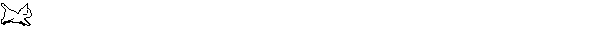

# Preamble

## Download Hadoop

In [2]:
import urllib.request
import os
import shutil
import tarfile
import logging
import subprocess
import time
import sys
############
# COSTANTS #
############

# URL for downloading Hadoop (archive site https://archive.apache.org/dist/)
HADOOP_URL = "https://archive.apache.org/dist/hadoop/core/hadoop-3.4.0/hadoop-3.4.0.tar.gz"

# logging level (should be one of: DEBUG, INFO, WARNING, ERROR, CRITICAL)
LOGGING_LEVEL = "INFO" #@param ["DEBUG", "INFO", "WARNING", "ERROR", "CRITICAL"]

# setup logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging_level = getattr(logging, LOGGING_LEVEL.upper(), 10)

logging.basicConfig(level=logging_level, \
                    format='%(asctime)s - %(levelname)s: %(message)s', \
                    datefmt='%d-%b-%y %I:%M:%S %p')

logger = logging.getLogger('my_logger')

JAVA_PATH = '/usr/lib/jvm/java-11-openjdk-amd64'

# true if running on Google Colab
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
 from google.colab import output

# setup logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging_level = getattr(logging, LOGGING_LEVEL.upper(), 10)

logging.basicConfig(level=logging_level, \
                    format='%(asctime)s - %(levelname)s: %(message)s', \
                    datefmt='%d-%b-%y %I:%M:%S %p')

logger = logging.getLogger('my_logger')

# set variable JAVA_HOME (install Java if necessary)
def is_java_installed():
    os.environ['JAVA_HOME'] = os.path.realpath(shutil.which("java")).split('/bin')[0]
    return os.environ['JAVA_HOME']

def install_java():
    # Uncomment and modify the desired version
    # java_version= 'openjdk-11-jre-headless'
    # java_version= 'default-jre'
    # java_version= 'openjdk-17-jre-headless'
    # java_version= 'openjdk-18-jre-headless'
    java_version= 'openjdk-19-jre-headless'

    print(f"Java not found. Installing {java_version} ... (this might take a while)")
    try:
        cmd = f"apt install -y {java_version}"
        subprocess_output = subprocess.run(cmd, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
        stdout_result = subprocess_output.stdout
        # Process the results as needed
        logger.info("Done installing Java {}".format(java_version))
        os.environ['JAVA_HOME'] = os.path.realpath(shutil.which("java")).split('/bin')[0]
        logger.info("JAVA_HOME is {}".format(os.environ['JAVA_HOME']))
    except subprocess.CalledProcessError as e:
        # Handle the error if the command returns a non-zero exit code
        logger.warn("Command failed with return code {}".format(e.returncode))
        logger.warn("stdout: {}".format(e.stdout))

# Install Java if not available
if is_java_installed():
    logger.info("Java is already installed: {}".format(os.environ['JAVA_HOME']))
else:
    logger.info("Installing Java")
    install_java()


# download Hadoop
file_name = os.path.basename(HADOOP_URL)
if os.path.isfile(file_name):
   logger.info("{} already exists, not downloading".format(file_name))
else:
  logger.info("Downloading {}".format(file_name))
  urllib.request.urlretrieve(HADOOP_URL, file_name)

# uncompress archive
dir_name = file_name[:-7]
if os.path.exists(dir_name):
  logger.info("{} is already uncompressed".format(file_name))
else:
  logger.info("Uncompressing {}".format(file_name))
  tar = tarfile.open(file_name)
  tar.extractall()
  tar.close()

# environment variables
os.environ['HADOOP_HOME'] = os.path.join(os.getcwd(), dir_name)
logger.info("HADOOP_HOME is {}".format(os.environ['HADOOP_HOME']))
os.environ['PATH'] = ':'.join([os.path.join(os.environ['HADOOP_HOME'], 'bin'), os.environ['PATH']])
logger.info("PATH is {}".format(os.environ['PATH']))


13-Jul-25 03:23:01 PM - INFO: Java is already installed: /usr/lib/jvm/temurin-11-jdk-amd64


13-Jul-25 03:23:01 PM - INFO: Downloading hadoop-3.4.0.tar.gz


13-Jul-25 03:23:38 PM - INFO: Uncompressing hadoop-3.4.0.tar.gz


13-Jul-25 03:23:49 PM - INFO: HADOOP_HOME is /home/runner/work/big_data/big_data/hadoop-3.4.0


13-Jul-25 03:23:49 PM - INFO: PATH is /home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.27-6/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin


### Check environment variables used by `mapred`

The following steps are not needed but they might be useful to get familiar the `mapred` command.

`mapred minicluster` is the command that we are going to use to start the MiniCluster once a few variables and libraries are taken care of.

In [3]:
!mapred -h

Usage: mapred [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    mapred [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

--config dir   Hadoop config directory
--debug        turn on shell script debug mode
--help         usage information

  SUBCOMMAND is one of:


    Admin Commands:

frameworkuploader   mapreduce framework upload
hsadmin             job history server admin interface

    Client Commands:

classpath           prints the class path needed for running mapreduce
                    subcommands
envvars             display computed Hadoop environment variables


job                 manipulate MapReduce jobs
minicluster         CLI MiniCluster
pipes               run a Pipes job
queue               get information regarding JobQueues
sampler             sampler
version             print the version

    Daemon Commands:

historyserver       run job history servers as a standalone daemon

SUBCOMMAND may print help when invoked w/o parameters or with -h.


In [4]:
!mapred envvars

JAVA_HOME='/usr/lib/jvm/temurin-11-jdk-amd64'
HADOOP_MAPRED_HOME='/home/runner/work/big_data/big_data/hadoop-3.4.0'
MAPRED_DIR='share/hadoop/mapreduce'
MAPRED_LIB_JARS_DIR='share/hadoop/mapreduce/lib'
HADOOP_CONF_DIR='/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop'
HADOOP_TOOLS_HOME='/home/runner/work/big_data/big_data/hadoop-3.4.0'
HADOOP_TOOLS_DIR='share/hadoop/tools'
HADOOP_TOOLS_LIB_JARS_DIR='share/hadoop/tools/lib'


## Set `HADOOP_TOOLS_LIB_JARS_DIR`

This variable needs to point to the folder containing Hadoop libraries. As you can see in the output of `mapred envvars`, by default this is set incorrectly to `share/hadoop/tools/lib`.

In [5]:
os.environ['HADOOP_TOOLS_LIB_JARS_DIR'] = os.path.join(os.environ['HADOOP_HOME'], 'share/hadoop/tools/lib/') #IMPORTANT

## Install the `mockito` library

To figure out which version of `mockito` is compatible with the current version of Hadoop, check this page for library dependency analysis: https://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-hdfs/dependency-analysis.html

We need Mockito 2.28.2.

After a new Hadoop installation, the mockito library is not yet there!

In [6]:
!find hadoop-3.4.0 -name "mockito*"

Download it from the Maven repository.

In [7]:
!wget --no-clobber https://repo1.maven.org/maven2/org/mockito/mockito-core/2.28.2/mockito-core-2.28.2.jar

--2025-07-13 15:23:49--  https://repo1.maven.org/maven2/org/mockito/mockito-core/2.28.2/mockito-core-2.28.2.jar
Resolving repo1.maven.org (repo1.maven.org)... 151.101.44.209, 2a04:4e42:b::209
Connecting to repo1.maven.org (repo1.maven.org)|151.101.44.209|:443... connected.


HTTP request sent, awaiting response... 200 OK
Length: 591179 (577K) [application/java-archive]
Saving to: ‘mockito-core-2.28.2.jar’

mockito-core-2.28.2   0%[                    ]       0  --.-KB/s               

mockito-core-2.28.2 100%[===================>] 577.32K  --.-KB/s    in 0.04s   

2025-07-13 15:23:49 (13.6 MB/s) - ‘mockito-core-2.28.2.jar’ saved [591179/591179]



Install the library in a location where it can be found.

In [8]:
shutil.copy('mockito-core-2.28.2.jar', os.path.join(os.environ['HADOOP_HOME'],'share/hadoop/mapreduce/'))

'/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/mockito-core-2.28.2.jar'

In [9]:
os.listdir(os.path.join(os.environ['HADOOP_HOME'],'share/hadoop/mapreduce/'))

['hadoop-mapreduce-client-jobclient-3.4.0-tests.jar',
 'hadoop-mapreduce-client-shuffle-3.4.0.jar',
 'jdiff',
 'mockito-core-2.28.2.jar',
 'hadoop-mapreduce-examples-3.4.0.jar',
 'hadoop-mapreduce-client-uploader-3.4.0.jar',
 'hadoop-mapreduce-client-app-3.4.0.jar',
 'hadoop-mapreduce-client-core-3.4.0.jar',
 'sources',
 'hadoop-mapreduce-client-hs-plugins-3.4.0.jar',
 'hadoop-mapreduce-client-nativetask-3.4.0.jar',
 'hadoop-mapreduce-client-common-3.4.0.jar',
 'hadoop-mapreduce-client-jobclient-3.4.0.jar',
 'hadoop-mapreduce-client-hs-3.4.0.jar']

## Create folders for the datanodes

These folders are needed for the correct functioning of the MiniCluster.

In [10]:
!mkdir -p ./target/test/data/dfs/{name-0-1,name-0-2}

In [11]:
!ls ./target/test/data/dfs/

{name-0-1,name-0-2}


# Start the MiniCluster


To see a full list of options run `mapred minicluster -help`.

In [12]:
!mapred minicluster -help

usage: ...
 -D <property=value>   Options to pass into configuration object
 -datanodes <arg>      How many datanodes to start (default 1)
 -format               Format the DFS (default false)
 -help                 Prints option help.
 -jhsport <arg>        JobHistoryServer port (default 0--we choose)
 -namenode <arg>       URL of the namenode (default is either the DFS
                       cluster or a temporary dir)
 -nnhttpport <arg>     NameNode HTTP port (default 0--we choose)
 -nnport <arg>         NameNode port (default 0--we choose)
 -nodemanagers <arg>   How many nodemanagers to start (default 1)
 -nodfs                Don't start a mini DFS cluster
 -nomr                 Don't start a mini MR cluster
 -rmport <arg>         ResourceManager port (default 0--we choose)
 -writeConfig <path>   Save configuration to this XML file.
 -writeDetails         Write basic information to this JSON file.


If you are not running this notebook for the first time or have edited the `core-site.xml` file you should now empty it to get the default initial configuration.

**Note:** the file `core-site.xml` needs to exist and contain the lines

```
<configuration>

</configuration>
```


In [13]:
# check if the file is there
!find $HADOOP_HOME -name "core-site.xml"

/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop/core-site.xml


In [14]:
# view the contents of the file
!cat $(find $HADOOP_HOME -name "core-site.xml")

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
</configuration>


In [15]:
with open(os.environ['HADOOP_HOME']+'/etc/hadoop/core-site.xml', 'w') as file:
  file.write("<configuration>\n</configuration>")

In [16]:
!cat $(find $HADOOP_HOME -name "core-site.xml")

<configuration>
</configuration>

## `mapred minicluster -format`

Finally, we are all set up to start the MiniCluster.

Make sure to include the `-format` option to initialize and format the filesystem.

Other than that, we are using the defaults for all the other options.


Note that this process runs forever thus blocking the notebook. In order to proceed with the rest of the notebook, just interrupt the running cell.

We'll see later how to run the MiniCluster as a subprocess without blocking the notebook's cells execution.

Uncomment the next cell to launch the MiniCluster!

In [17]:
#!mapred minicluster -format

If the MiniMRCluster started correctly, you should see a line like this at the bottom:

     2024-01-14 13:53:15,112 INFO mapreduce.MiniHadoopClusterManager: Started MiniMRCluster

# Stop the MiniCluster process

To continue to work with this notebook, you need to stop the MiniCluster by terminating the execution of the previous cell.

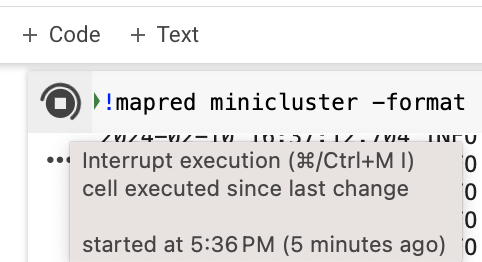

# Start the MiniCluster as a subprocess

It is convenient to start the MiniCluster as a subprocess in order prevent it from blocking the execution of other notebook cells.

The MiniCluster is a Java process with multiple listening ports.



## Use `lsof` to show listening ports

To check ports that have listening services use `lsof`.

The output should look like this:

```
COMMAND         PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
node              7 root   21u  IPv6  19666      0t0  TCP *:8080 (LISTEN)
kernel_manager_  20 root    3u  IPv4  18322      0t0  TCP 172.28.0.12:6000 (LISTEN)
colab-fileshim.  61 root    3u  IPv4  19763      0t0  TCP 127.0.0.1:3453 (LISTEN)
jupyter-noteboo  79 root    7u  IPv4  19989      0t0  TCP 172.28.0.12:9000 (LISTEN)
python3         428 root   21u  IPv4  25506      0t0  TCP 127.0.0.1:38217 (LISTEN)
python3         467 root    3u  IPv4  26425      0t0  TCP 127.0.0.1:43729 (LISTEN)
python3         467 root    5u  IPv4  26426      0t0  TCP 127.0.0.1:60229 (LISTEN)
```

In [18]:
!lsof -n -i -P +c0 -sTCP:LISTEN

COMMAND  PID   USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
python  4931 runner    9u  IPv4  59454      0t0  TCP 127.0.0.1:36809 (LISTEN)
python  4931 runner   11u  IPv4  59456      0t0  TCP 127.0.0.1:41211 (LISTEN)
python  4931 runner   13u  IPv4  59458      0t0  TCP 127.0.0.1:58185 (LISTEN)
python  4931 runner   22u  IPv4  59462      0t0  TCP 127.0.0.1:60907 (LISTEN)
python  4931 runner   27u  IPv4  59466      0t0  TCP 127.0.0.1:38835 (LISTEN)
python  4931 runner   35u  IPv4  62119      0t0  TCP 127.0.0.1:45497 (LISTEN)


Options used in `lsof`:

* `-i` specifies that you want to display only network files, that is open network connections
* `-n` and `-P` tell `lsof` to show IP addresses (`-n`) and ports (`-P`) in numeric form. This makes `lsof` faster as it saves the time for name lookups.
* the option `+c0` is used to show a longer substring of the name of the UNIX command associated with the process (https://linux.die.net/man/8/lsof)
* `-sTCP:LISTEN` filters for TCP connections in state `LISTEN`

See also [lsof and listening ports](https://unix.stackexchange.com/questions/26887/lsof-and-listening-ports) on Stackexchange.

## Start the subprocess

Start the MiniCluster as a subprocess using Python's [`subprocess` library](https://docs.python.org/3/library/subprocess.html).

The files `out.txt` and `err.txt` will contain respectively the standard output and the standard error emitted by the `mapred minicluster` command.

In [19]:
import subprocess
with open('out.txt', "w") as stdout_file, open('err.txt', "w") as stderr_file:
    process = subprocess.Popen(
        ["mapred", "minicluster", "-format"],
        stdout=stdout_file,
        stderr=stderr_file
    )

Wait for a couple of seconds because the services might not be available immediately.

In [20]:
if not IN_COLAB:
  time.sleep(30)
else:
  time.sleep(10)

Now check for listening ports again (you can also refresh the next cell with ctrl-enter).

In [21]:
!lsof -n -i -P +c0 -sTCP:LISTEN

COMMAND  PID   USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
python  4931 runner    9u  IPv4  59454      0t0  TCP 127.0.0.1:36809 (LISTEN)
python  4931 runner   11u  IPv4  59456      0t0  TCP 127.0.0.1:41211 (LISTEN)
python  4931 runner   13u  IPv4  59458      0t0  TCP 127.0.0.1:58185 (LISTEN)
python  4931 runner   22u  IPv4  59462      0t0  TCP 127.0.0.1:60907 (LISTEN)
python  4931 runner   27u  IPv4  59466      0t0  TCP 127.0.0.1:38835 (LISTEN)
python  4931 runner   35u  IPv4  62119      0t0  TCP 127.0.0.1:45497 (LISTEN)
java    5113 runner  341u  IPv4  63090      0t0  TCP 127.0.0.1:42125 (LISTEN)
java    5113 runner  354u  IPv4  63527      0t0  TCP 127.0.0.1:45651 (LISTEN)
java    5113 runner  364u  IPv4  63544      0t0  TCP 127.0.0.1:35383 (LISTEN)
java    5113 runner  367u  IPv4  63547      0t0  TCP 127.0.0.1:34179 (LISTEN)
java    5113 runner  420u  IPv4  63566      0t0  TCP 127.0.0.1:39491 (LISTEN)
java    5113 runner  421u  IPv4  63097      0t0  TCP 127.0.0.1:43255 (LISTEN)
java  

You should have gotten something like this (a total of $18$ listening ports associated with the MiniCluster process):

```
COMMAND           PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
node                6 root   21u  IPv6  17373      0t0  TCP *:8080 (LISTEN)
kernel_manager_    20 root    3u  IPv4  17180      0t0  TCP 172.28.0.12:6000 (LISTEN)
colab-fileshim.    58 root    3u  IPv4  19499      0t0  TCP 127.0.0.1:3453 (LISTEN)
jupyter-noteboo    75 root    7u  IPv4  19658      0t0  TCP 172.28.0.12:9000 (LISTEN)
python3          4081 root   21u  IPv4 108431      0t0  TCP 127.0.0.1:44519 (LISTEN)
python3          4108 root    3u  IPv4 109755      0t0  TCP 127.0.0.1:46699 (LISTEN)
python3          4108 root    5u  IPv4 109756      0t0  TCP 127.0.0.1:51813 (LISTEN)
java            17261 root  347u  IPv4 390097      0t0  TCP 127.0.0.1:38817 (LISTEN)
java            17261 root  357u  IPv4 391184      0t0  TCP 127.0.0.1:41631 (LISTEN)
java            17261 root  367u  IPv4 390801      0t0  TCP 127.0.0.1:34651 (LISTEN)
java            17261 root  370u  IPv4 390804      0t0  TCP 127.0.0.1:35015 (LISTEN)
java            17261 root  399u  IPv4 390814      0t0  TCP 127.0.0.1:46503 (LISTEN)
java            17261 root  400u  IPv4 390817      0t0  TCP 127.0.0.1:44665 (LISTEN)
java            17261 root  423u  IPv4 401418      0t0  TCP *:8031 (LISTEN)
java            17261 root  440u  IPv4 395796      0t0  TCP *:10033 (LISTEN)
java            17261 root  450u  IPv4 400174      0t0  TCP *:19888 (LISTEN)
java            17261 root  455u  IPv4 396244      0t0  TCP 127.0.0.1:43877 (LISTEN)
java            17261 root  465u  IPv4 400367      0t0  TCP *:8088 (LISTEN)
java            17261 root  470u  IPv4 400420      0t0  TCP *:8033 (LISTEN)
java            17261 root  490u  IPv4 401422      0t0  TCP *:8030 (LISTEN)
java            17261 root  500u  IPv4 400426      0t0  TCP 127.0.0.1:37335 (LISTEN)
java            17261 root  510u  IPv4 400470      0t0  TCP 127.0.0.1:42337 (LISTEN)
java            17261 root  520u  IPv4 401450      0t0  TCP 127.0.0.1:40401 (LISTEN)
java            17261 root  530u  IPv4 401454      0t0  TCP *:42359 (LISTEN)
java            17261 root  531u  IPv4 401457      0t0  TCP 127.0.0.1:38543 (LISTEN)
```

The `java` process is the one responsible for providing the MiniCluster services by listening on several ports.

There are two known ports for the Web interfaces (see [https://hadoop.apache.org/docs/.../ClusterSetup.html#Web_Interfaces](https://hadoop.apache.org/docs/r3.0.1/hadoop-project-dist/hadoop-common/ClusterSetup.html#Web_Interfaces)):
*  $8088$ the port to the ResourceManager
*  $19888$ the port to the MapReduce JobHistory Server



### Access the Web UI

Let us check the Web interface at port $8088$.

In [22]:
!wget http://localhost:8088

--2025-07-13 15:24:21--  http://localhost:8088/
Resolving localhost (localhost)... ::1, 127.0.0.1
Connecting to localhost (localhost)|::1|:8088... failed: Connection refused.
Connecting to localhost (localhost)|127.0.0.1|:8088... connected.
HTTP request sent, awaiting response... 

302 Found
Location: http://localhost:8088/node [following]
--2025-07-13 15:24:21--  http://localhost:8088/node
Reusing existing connection to localhost:8088.
HTTP request sent, awaiting response... 

200 OK
Length: 6597 (6.4K) [text/html]
Saving to: ‘index.html’

index.html          100%[===================>]   6.44K  --.-KB/s    in 0s      

2025-07-13 15:24:21 (559 MB/s) - ‘index.html’ saved [6597/6597]



We can serve the ResourceManager UI in the browser through Google Colab.

In [23]:
if IN_COLAB:
    # serve the Web UI on Colab
    print("Click on the link below to open the Resource Manager Web UI 🚀")
    output.serve_kernel_port_as_window(8088, path='/node')

The port $19888$ is redirected to the same page as port $8088$, so it won't be very useful. I'm not sure if this is due to a missing configuration parameter or if it's a bug.

In [24]:
!wget http://localhost:19888

--2025-07-13 15:24:22--  http://localhost:19888/
Resolving localhost (localhost)... ::1, 127.0.0.1
Connecting to localhost (localhost)|::1|:19888... failed: Connection refused.
Connecting to localhost (localhost)|127.0.0.1|:19888... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://localhost:19888/node [following]
--2025-07-13 15:24:22--  http://localhost:19888/node
Reusing existing connection to localhost:19888.
HTTP request sent, awaiting response... 200 OK
Length: 6597 (6.4K) [text/html]
Saving to: ‘index.html.1’

index.html.1        100%[===================>]   6.44K  --.-KB/s    in 0s      

2025-07-13 15:24:22 (630 MB/s) - ‘index.html.1’ saved [6597/6597]



In [25]:
if IN_COLAB:
    # serve the Web UI on Colab
    print("Click on the link below to open the MapReduce JobHistory Server Web UI 🚀")
    output.serve_kernel_port_as_window(19888, path='/node')

### Use ngrok to access the Web UI

In the free tier of Google Colab this functionality might not be available (see https://research.google.com/colaboratory/faq.html#limitations-and-restrictions). As an alternative, you can use [ngrok](https://ngrok.com/) after signing up for a free account.

Check the NGROK box below if you want to use ngrok.



In [26]:
# you should set this to True
NGROK = False #@param {type:"boolean"}

We are going to use the Python ngrok client `pyngrok` (see the [Colab example](https://pyngrok.readthedocs.io/en/latest/integrations.html#colab-http-example)).

In [27]:
if NGROK:
  !pip install pyngrok
  from pyngrok import ngrok, conf
  import getpass

  print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken")
  conf.get_default().auth_token = getpass.getpass()

After entering the ngrok authorization token, you can open a connection.

In [28]:
if NGROK:
  # Open a ngrok tunnel to the HTTP server
  public_url = ngrok.connect(19888).public_url

In [29]:
if NGROK:
  print(f'Click on {public_url} to open the MapReduce JobHistory Server Web UI')

You can safely ignore the warning since we are not disclosing any confidential information and proceed with clicking on the "Visit site" button.

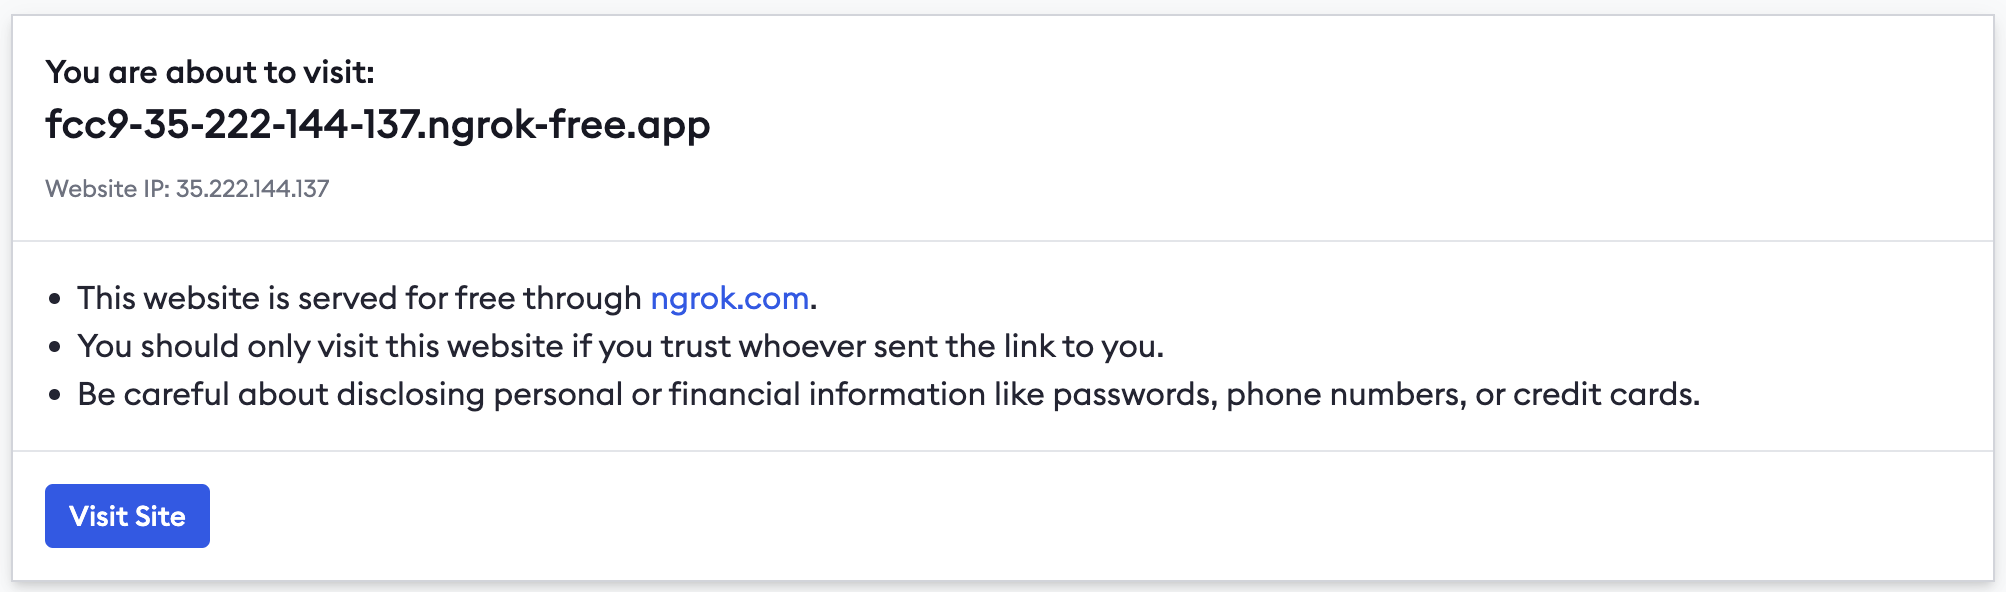

## Stop the MiniCluster subprocess

To stop the MiniCluster subprocess use `process.kill()` (remember: `process` is the variable name for the MiniCluster subprocess).

In [30]:
process.kill()

The Java process should now be gone.

In [31]:
!lsof -n -i -P +c0 -sTCP:LISTEN

COMMAND  PID   USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
python  4931 runner    9u  IPv4  59454      0t0  TCP 127.0.0.1:36809 (LISTEN)
python  4931 runner   11u  IPv4  59456      0t0  TCP 127.0.0.1:41211 (LISTEN)
python  4931 runner   13u  IPv4  59458      0t0  TCP 127.0.0.1:58185 (LISTEN)
python  4931 runner   22u  IPv4  59462      0t0  TCP 127.0.0.1:60907 (LISTEN)
python  4931 runner   27u  IPv4  59466      0t0  TCP 127.0.0.1:38835 (LISTEN)
python  4931 runner   35u  IPv4  62119      0t0  TCP 127.0.0.1:45497 (LISTEN)


In case there are still some `java` processes lingering around, kill them with

In [32]:
!pkill -f java

Verify that the Java processes are gone.

# Start the MiniCluster with your own ports

This time we will also set the ports for various services:

    mapred minicluster -format -jhsport 8900 -nnhttpport 8901 -nnport 8902 -rmport 8903

Ports:

port number | description
--- | ---
8900 | JobHistoryServer port
8901 | NameNode HTTP port
8902 | NameNode port
8903 | ResourceManager port


**Note:** we chose these port numbers (8900, 8901, 8902, 8903) arbitrarily, you can pick other numbers as long as they do not conflict with ports that are already is use.

In [33]:
import subprocess
with open('out.txt', "w") as stdout_file, open('err.txt', "w") as stderr_file:
    process = subprocess.Popen(
        ["mapred", "minicluster", "-format", "-jhsport", "8900", "-nnhttpport", "8901", "-nnport", "8902", "-rmport", "8903"],
        stdout=stdout_file,
        stderr=stderr_file
    )

In [34]:
if not IN_COLAB:
  time.sleep(30)
else:
  time.sleep(10)

List the Java ports. These should be all ports associated with the MIniCluster `java` process.

Note: `grep "^COMMAND\|java"` means "filter out the lines that begin with the string `COMMAND` or that contain the string `java`". This is to preserve the header line.

In [35]:
!lsof -n -i -P +c0 -sTCP:LISTEN | grep "^COMMAND\|java"

COMMAND  PID   USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java    5629 runner  341u  IPv4  73047      0t0  TCP 127.0.0.1:8901 (LISTEN)
java    5629 runner  354u  IPv4  70446      0t0  TCP 127.0.0.1:8902 (LISTEN)
java    5629 runner  364u  IPv4  72145      0t0  TCP 127.0.0.1:44757 (LISTEN)
java    5629 runner  367u  IPv4  72148      0t0  TCP 127.0.0.1:40945 (LISTEN)
java    5629 runner  420u  IPv4  71467      0t0  TCP 127.0.0.1:43519 (LISTEN)
java    5629 runner  421u  IPv4  72150      0t0  TCP 127.0.0.1:34647 (LISTEN)
java    5629 runner  444u  IPv4  75496      0t0  TCP *:8031 (LISTEN)
java    5629 runner  473u  IPv4  75484      0t0  TCP *:10033 (LISTEN)
java    5629 runner  483u  IPv4  81146      0t0  TCP *:8088 (LISTEN)
java    5629 runner  484u  IPv4  79213      0t0  TCP *:19888 (LISTEN)
java    5629 runner  499u  IPv4  81152      0t0  TCP 127.0.0.1:8900 (LISTEN)
java    5629 runner  509u  IPv4  75491      0t0  TCP *:8033 (LISTEN)
java    5629 runner  529u  IPv4  75501      0t0  TCP

You should now see

```
COMMAND           PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java            30246 root  347u  IPv4 671659      0t0  TCP 127.0.0.1:8901 (LISTEN)
java            30246 root  357u  IPv4 672029      0t0  TCP 127.0.0.1:8902 (LISTEN)
java            30246 root  367u  IPv4 674008      0t0  TCP 127.0.0.1:44721 (LISTEN)
java            30246 root  370u  IPv4 672082      0t0  TCP 127.0.0.1:36789 (LISTEN)
java            30246 root  399u  IPv4 674082      0t0  TCP 127.0.0.1:37975 (LISTEN)
java            30246 root  400u  IPv4 674085      0t0  TCP 127.0.0.1:37675 (LISTEN)
java            30246 root  423u  IPv4 681319      0t0  TCP *:8031 (LISTEN)
java            30246 root  440u  IPv4 680955      0t0  TCP *:10033 (LISTEN)
java            30246 root  450u  IPv4 681014      0t0  TCP *:19888 (LISTEN)
java            30246 root  455u  IPv4 681987      0t0  TCP 127.0.0.1:8900 (LISTEN)
java            30246 root  465u  IPv4 682035      0t0  TCP *:8088 (LISTEN)
java            30246 root  470u  IPv4 681313      0t0  TCP *:8033 (LISTEN)
java            30246 root  490u  IPv4 681325      0t0  TCP *:8030 (LISTEN)
java            30246 root  500u  IPv4 682046      0t0  TCP 127.0.0.1:8903 (LISTEN)
java            30246 root  510u  IPv4 681370      0t0  TCP 127.0.0.1:34521 (LISTEN)
java            30246 root  520u  IPv4 682057      0t0  TCP 127.0.0.1:36981 (LISTEN)
java            30246 root  530u  IPv4 681373      0t0  TCP *:46657 (LISTEN)
java            30246 root  531u  IPv4 682061      0t0  TCP 127.0.0.1:39897 (LISTEN)
```

Our ports $8900$, $8901$, $8902$, and $8903$ are included in the list.

The log messages are in the file `err.txt`. The last 10 lines should look like this:

```
2023-12-27 21:36:08,820 INFO server.MiniYARNCluster: All Node Managers connected in MiniYARNCluster
2023-12-27 21:36:08,820 INFO v2.MiniMRYarnCluster: MiniMRYARN ResourceManager address: localhost:8903
2023-12-27 21:36:08,821 INFO v2.MiniMRYarnCluster: MiniMRYARN ResourceManager web address: 0.0.0.0:8088
2023-12-27 21:36:08,821 INFO v2.MiniMRYarnCluster: MiniMRYARN HistoryServer address: localhost:8900
2023-12-27 21:36:08,822 INFO v2.MiniMRYarnCluster: MiniMRYARN HistoryServer web address: 26769af38ddc:19888
2023-12-27 21:36:08,823 INFO mapreduce.MiniHadoopClusterManager: Started MiniMRCluster
```

In [36]:
!tail err.txt

2025-07-13 15:24:29,317 INFO nodemanager.NodeStatusUpdaterImpl: Registered with ResourceManager as localhost:36023 with total resource of <memory:4096, vCores:8>
2025-07-13 15:24:29,322 INFO capacity.AbstractLeafQueue: LeafQueue: root.default update max app related, maxApplications=10000, maxApplicationsPerUser=10000, Abs Cap:1.0, Cap: 1.0, MaxCap : 1.0
2025-07-13 15:24:29,327 INFO server.MiniYARNCluster: All Node Managers connected in MiniYARNCluster
2025-07-13 15:24:29,327 INFO v2.MiniMRYarnCluster: MiniMRYARN ResourceManager address: localhost:8903
2025-07-13 15:24:29,328 INFO capacity.CapacityScheduler: Added node localhost:36023 clusterResource: <memory:4096, vCores:8>
2025-07-13 15:24:29,328 INFO capacity.AbstractLeafQueue: LeafQueue: root.default update max app related, maxApplications=10000, maxApplicationsPerUser=10000, Abs Cap:1.0, Cap: 1.0, MaxCap : 1.0
2025-07-13 15:24:29,329 INFO v2.MiniMRYarnCluster: MiniMRYARN ResourceManager web address: 0.0.0.0:8088
2025-07-13 15:24:29

Check the NameNode's HTTP port.

In [37]:
!wget http://localhost:8901

--2025-07-13 15:24:52--  http://localhost:8901/
Resolving localhost (localhost)... ::1, 127.0.0.1
Connecting to localhost (localhost)|::1|:8901... failed: Connection refused.
Connecting to localhost (localhost)|127.0.0.1|:8901... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://localhost:8901/index.html [following]
--2025-07-13 15:24:52--  http://localhost:8901/index.html
Reusing existing connection to localhost:8901.
HTTP request sent, awaiting response... 

200 OK
Length: 1079 (1.1K) [text/html]
Saving to: ‘index.html.2’

index.html.2        100%[===================>]   1.05K  --.-KB/s    in 0s      

2025-07-13 15:24:52 (169 MB/s) - ‘index.html.2’ saved [1079/1079]



## Start the NameNode Web UI

Serve the NameNode UI in the browser through Google Colab (path should be set to `/index.html` as in the output of `wget` otherwise the URL won't work).

In [38]:
if IN_COLAB and not NGROK:
    # serve the Web UI on Colab
    print("Click on the link below to open the NameNode Web UI 🚀")
    output.serve_kernel_port_as_window(8901, path='/index.html')
else:
  if NGROK:
    # disconnect previous tunnels (note: you can have max 3 tunnels open!)
    # see: https://pyngrok.readthedocs.io/en/latest/index.html#get-active-tunnels
    tunnels = ngrok.get_tunnels()
    for t in tunnels:
      ngrok.disconnect(t.public_url)
    # Open a ngrok tunnel to the HTTP server on port 8901
    public_url = ngrok.connect(8901).public_url
    print(f'Click on {public_url} to open the NameNode Web UI 🚀')

By clicking on the above link you should see the NameNode's Web UI in your browser:



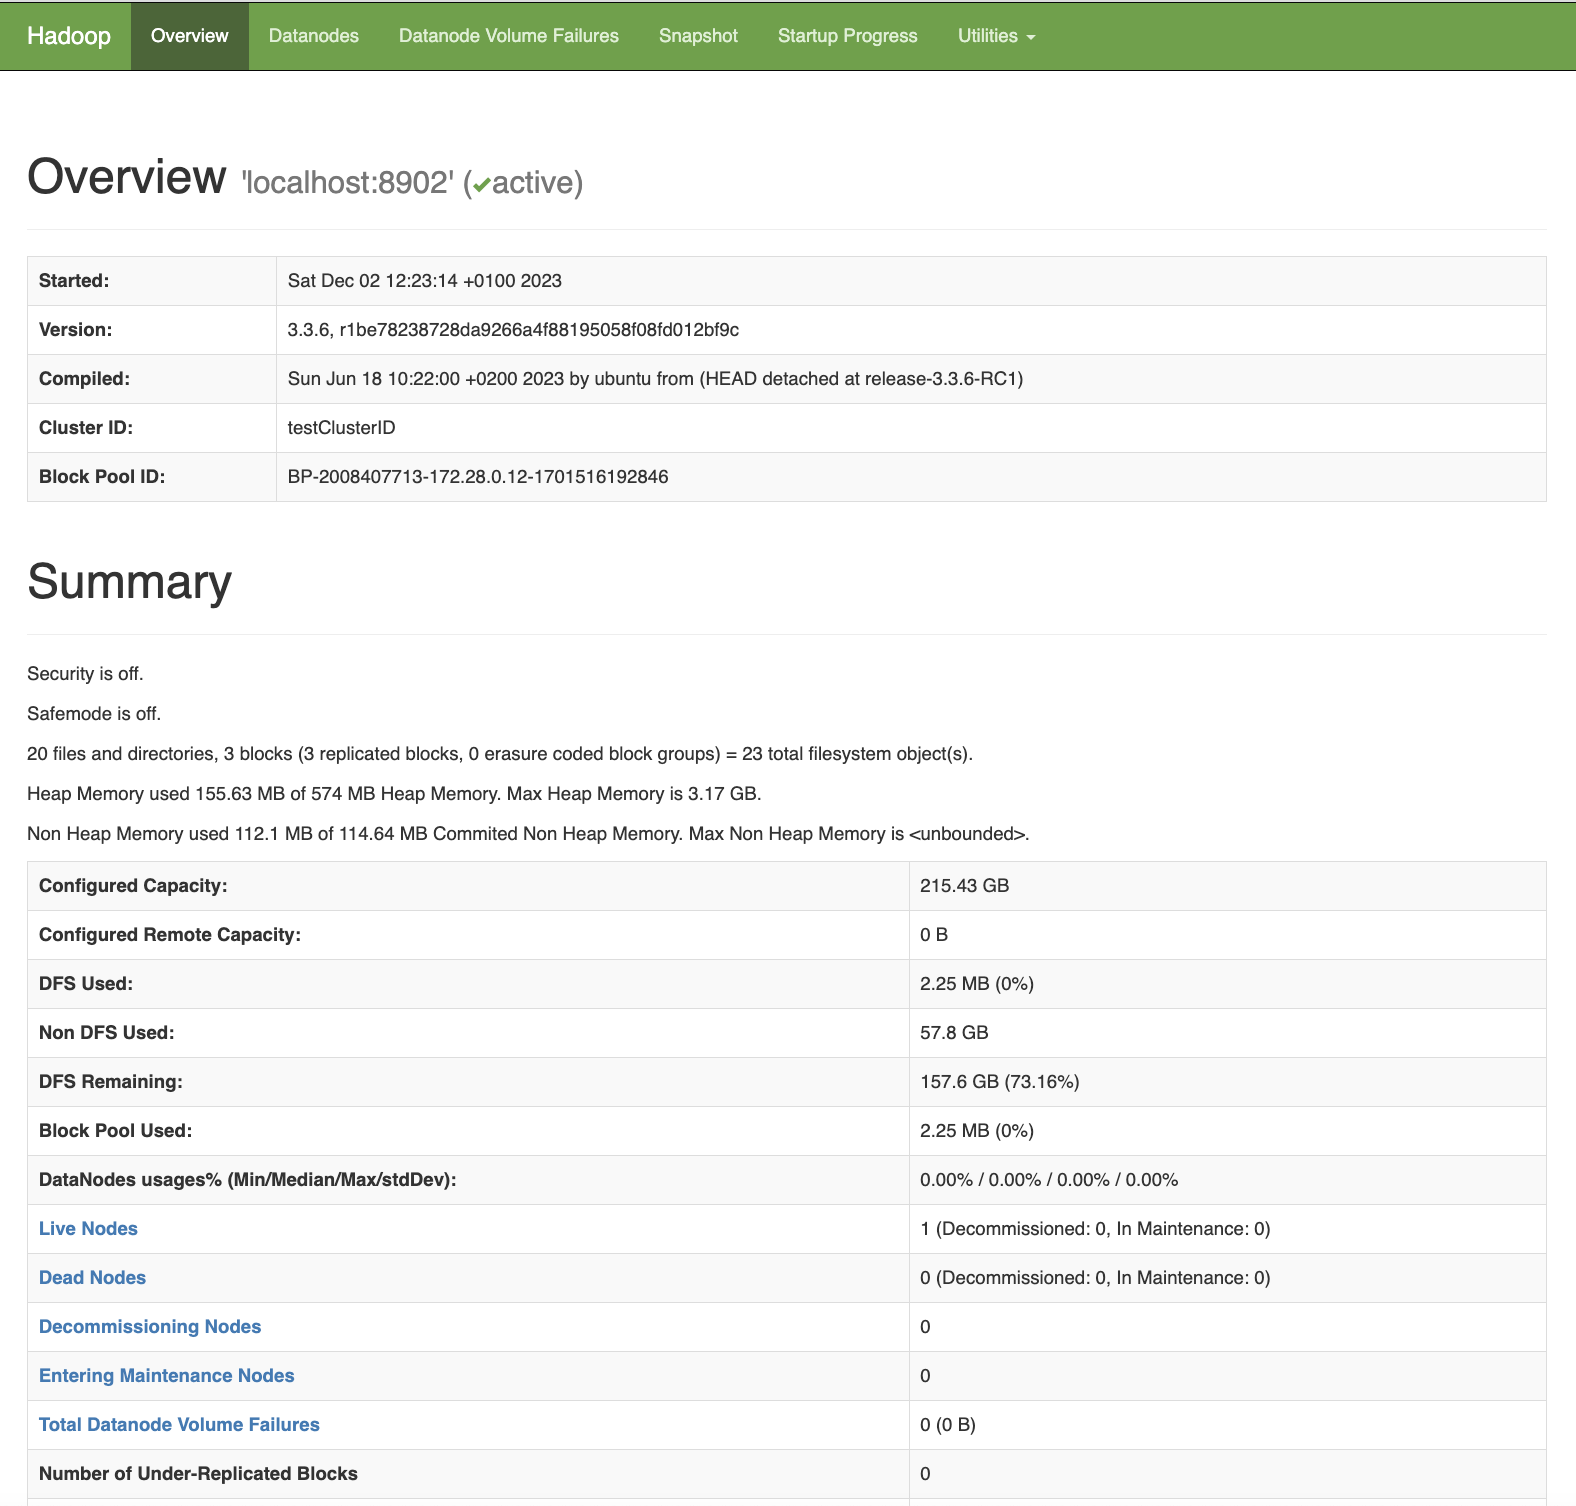

# Test the HDFS filesystem

## Create a directory

**Note:**  in order to use the MiniCluster's Hadoop filesystem you need to specify the full path prepending `hdfs://localhost:8902/` otherwise `hdfs` will write to the local filesystem.

In [39]:
%%bash
# create a folder my_dir
hdfs dfs -mkdir hdfs://localhost:8902/my_dir

List the contents of `my_dir` (should be empty).

In [40]:
!hdfs dfs -ls hdfs://localhost:8902/my_dir

Upload the local folder `sample_data` to `my_dir` on HDFS

In [41]:
!ls -lh sample_data

ls: cannot access 'sample_data': No such file or directory


Check the total size of the local folder `sample_data` using the command `du` ("du" stands for "disk usage" and the `-h` option stands for "human" as it will format file sizes in a “human-readable” fashion, e.g 55M instead of 55508) .

In [42]:
!du -h sample_data

du: cannot access 'sample_data': No such file or directory


Upload `sample_data` to HDFS.

In [43]:
!hdfs dfs -put sample_data hdfs://localhost:8902/my_dir/

put: `sample_data': No such file or directory


Check

In [44]:
!hdfs dfs -ls hdfs://localhost:8902/my_dir

Check the size of `my_dir` on HDFS using the [HDFS equivalent of `du`](https://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-common/FileSystemShell.html#du).

In [45]:
!hdfs dfs -du -h hdfs://localhost:8902/my_dir

Check the contents of the HDFS folder `my_dir`

In [46]:
!hdfs dfs -ls -R -h hdfs://localhost:8902/my_dir

You should now see in the Web interface that the "DFS used" has increased (you might need to refresh the NameNode UI Web page):

![dfs_used.png](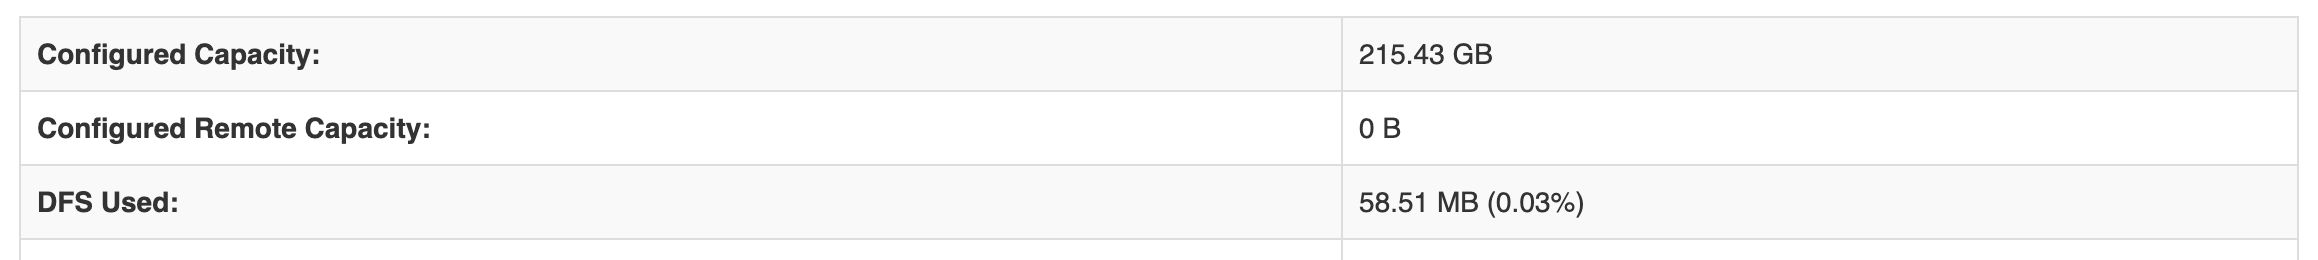
)

Remove the folder `my_dir`

In [47]:
!hdfs dfs -rm -r hdfs://localhost:8902/my_dir

Deleted hdfs://localhost:8902/my_dir


Now the DFS used should be back to ~$4$MB.


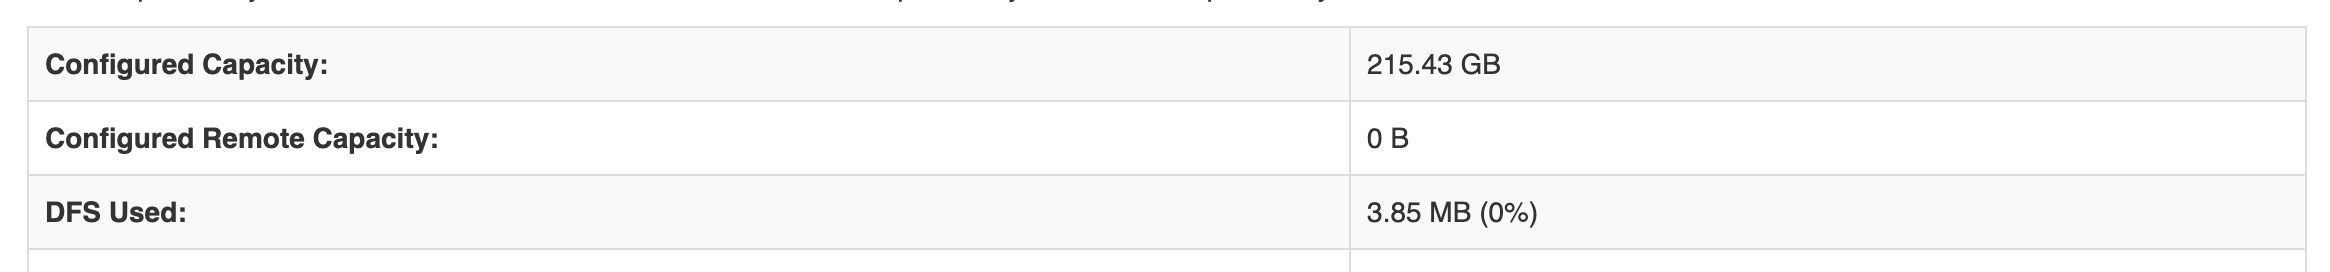


## The default filesystem

By default, `hdfs` will use the local filesystem so you need to prepend `hdfs://...` if you want to use the HDFS filesystem.

If you do not want to use the prefix `hdfs://localhost:8902/` in the filenames, you could set the property `fs.defaultFS` in `core-site.xml` or else use the option `-fs` like this:

    hdfs dfs -fs hdfs://localhost:8902/

In [48]:
!hdfs dfs -fs hdfs://localhost:8902/ -ls /

Found 2 items
drwxrwxrwx   - runner supergroup          0 2025-07-13 15:24 /home
drwxr-xr-x   - runner supergroup          0 2025-07-13 15:24 /user


This is the same as

In [49]:
!hdfs dfs -ls hdfs://localhost:8902/

Found 2 items
drwxrwxrwx   - runner supergroup          0 2025-07-13 15:24 hdfs://localhost:8902/home
drwxr-xr-x   - runner supergroup          0 2025-07-13 15:24 hdfs://localhost:8902/user


And also the same as

In [50]:
!hdfs dfs -D fs.defaultFS=hdfs://localhost:8902/ -ls /

Found 2 items
drwxrwxrwx   - runner supergroup          0 2025-07-13 15:24 /home
drwxr-xr-x   - runner supergroup          0 2025-07-13 15:24 /user


With the option `-D` we can set any variable on the fly (in this case we set `fs.defaultFS` to be the HDFS filesystem).

**Note:** the `-D` option should come before any other option.

If you configure the property `fs.defaultFS` in `core-site.xml`, you can also use `hdfs dfs -ls /`.

In [51]:
with open(os.environ['HADOOP_HOME']+'/etc/hadoop/core-site.xml', 'w') as file:
  file.write("""<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>hdfs://localhost:8902/</value>
  </property>
</configuration>""")

In [52]:
!cat $HADOOP_HOME/etc/hadoop/core-site.xml

<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>hdfs://localhost:8902/</value>
  </property>
</configuration>

In [53]:
!hdfs dfs -ls /

Found 2 items
drwxrwxrwx   - runner supergroup          0 2025-07-13 15:24 /home
drwxr-xr-x   - runner supergroup          0 2025-07-13 15:24 /user


Let us set the local filesystem as default (`file:///` means the local filesystem `file://` and the extra slash `/` indicates the root folder).

In [54]:
with open(os.environ['HADOOP_HOME']+'/etc/hadoop/core-site.xml', 'w') as file:
  file.write("""
<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>file:///</value>
  </property>
</configuration>""")

Now run `!hdfs dfs -ls /` as before. This time we are going to be listing the local filesystem and not the HDFS.

In [55]:
!hdfs dfs -ls /

Found 27 items


drwxr-xr-x   - root root      69632 2025-07-10 08:39 /bin
drwxr-xr-x   - root root       4096 2024-02-26 12:58 /bin.usr-is-merged
drwxr-xr-x   - root root       4096 2025-07-08 04:18 /boot
drwxr-xr-x   - root root       4096 2025-07-13 15:19 /data
drwxr-xr-x   - root root       4020 2025-07-13 15:15 /dev
drwxr-xr-x   - root root      12288 2025-07-13 15:15 /etc
drwxr-xr-x   - root root       4096 2025-07-11 13:27 /home
drwxr-xr-x   - root root       4096 2025-07-10 08:43 /imagegeneration
drwxr-xr-x   - root root       4096 2025-07-10 08:29 /lib
drwxr-xr-x   - root root       4096 2024-04-08 14:37 /lib.usr-is-merged
drwxr-xr-x   - root root       4096 2025-07-10 08:07 /lib32
drwxr-xr-x   - root root       4096 2025-07-08 04:13 /lib64
drwx------   - root root      16384 2025-07-08 04:16 /lost+found
drwxr-xr-x   - root root       4096 2025-07-08 04:13 /media
drwxr-xr-x   - root root       4096 2025-07-13 15:15 /mnt
drwxrwxrwx   - root root       4096 2025-07-13 15:15 /opt
dr-xr-xr-x   - r

I advise to get used to the fact that Hadoop interprets a file path as HDFS (`hdfs://`) vs. local (`file://`) depending on the setting of the variable `fs.defaultFS`, since this is often a source of confusion.

## Show status of HDFS with `hdfs dfsadmin`

The command `hdfs dfsadmin` allows to run administration tasks on the Hadoop filesystem.

In [56]:
!hdfs dfsadmin -h

h: Unknown command
Usage: hdfs dfsadmin
Note: Administrative commands can only be run as the HDFS superuser.
	[-report [-live] [-dead] [-decommissioning] [-enteringmaintenance] [-inmaintenance] [-slownodes]]
	[-safemode <enter | leave | get | wait | forceExit>]
	[-saveNamespace [-beforeShutdown]]
	[-rollEdits]
	[-restoreFailedStorage true|false|check]
	[-refreshNodes]
	[-setQuota <quota> <dirname>...<dirname>]
	[-clrQuota <dirname>...<dirname>]
	[-setSpaceQuota <quota> [-storageType <storagetype>] <dirname>...<dirname>]
	[-clrSpaceQuota [-storageType <storagetype>] <dirname>...<dirname>]
	[-finalizeUpgrade]
	[-rollingUpgrade [<query|prepare|finalize>]]
	[-upgrade <query | finalize>]
	[-refreshServiceAcl]
	[-refreshUserToGroupsMappings]
	[-refreshSuperUserGroupsConfiguration]
	[-refreshCallQueue]
	[-refresh <host:ipc_port> <key> [arg1..argn]
	[-reconfig <namenode|datanode> <host:ipc_port|livenodes> <start|status|properties>]
	[-printTopology]
	[-refreshNamenodes datanode_host:ipc_port]


The comand `hdfs dfsadmin -report` shows the current status of the Hadoop filesystem. In order to run it on our MiniCluster HDFS we need to pass the option

    -fs hdfs://localhost:8902/


    
Alternatively, we can configure the default filesystem (the URI of the namenode) in `core-site.xml` (see discussion in [The default filesystem)](#scrollTo=The_default_filesystem).

In [57]:
!hdfs dfsadmin -fs hdfs://localhost:8902/ -report

Configured Capacity: 153774309376 (143.21 GB)
Present Capacity: 44982800453 (41.89 GB)
DFS Remaining: 44980477952 (41.89 GB)
DFS Used: 2322501 (2.21 MB)
DFS Used%: 0.01%


Replicated Blocks:
	Under replicated blocks: 0
	Blocks with corrupt replicas: 0
	Missing blocks: 0
	Missing blocks (with replication factor 1): 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0
Erasure Coded Block Groups: 
	Low redundancy block groups: 0
	Block groups with corrupt internal blocks: 0
	Missing block groups: 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0

-------------------------------------------------
Live datanodes (1):

Name: 127.0.0.1:44757 (localhost)
Hostname: 127.0.0.1
Decommission Status : Normal
Configured Capacity: 153774309376 (143.21 GB)
DFS Used: 2322501 (2.21 MB)
Non DFS Used: 108757954491 (101.29 GB)
DFS Remaining: 44980477952 (41.89 GB)
DFS Used%: 0.00%
DFS Remaining%: 29.25%
Configured Cache Capacity: 0 (0 B)
Cache Used: 0 (0 B)
Cache Remaining: 0 (0 B)
Cache Used%: 100.00%
Cache Remaining%: 0.00%
Xceivers: 0
Last contact: Sun Jul 13 15:25:13 UTC 2025
Last Block Report: Sun

The information displayed by `hdfs dfsadmin` corresponds to what is presented in the [NameNode Web UI](#scrollTo=Start_the_NameNode_Web_UI).

# Test MapReduce

Find the MapReduce examples that come with the Hadoop distribution.

## Run the `pi` example

In [58]:
!find . -name "*examples*.jar"

./spark-3.5.6-bin-hadoop3/examples/jars/spark-examples_2.12-3.5.6.jar
./spark-3.5.6-bin-hadoop3/work/app-20250713152139-0001/0/spark-examples_2.12-3.5.6.jar
./spark-3.5.6-bin-hadoop3/work/app-20250713152112-0000/0/spark-examples_2.12-3.5.6.jar
./spark-3.5.6-bin-hadoop3/work/app-20250713152131-0000/0/spark-examples_2.12-3.5.6.jar
./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar
./hadoop-3.4.0/share/hadoop/mapreduce/sources/hadoop-mapreduce-examples-3.4.0-sources.jar
./hadoop-3.4.0/share/hadoop/mapreduce/sources/hadoop-mapreduce-examples-3.4.0-test-sources.jar


Check if the cluster is still running, if not you will need to restart it! (from the cell cell [Configure the MiniCluster's ports](#scrollTo=Configure_the_MiniCluster_s_ports)).

In [59]:
!lsof -n -i -P +c0 -sTCP:LISTEN -ac java

COMMAND  PID   USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java    5629 runner  341u  IPv4  73047      0t0  TCP 127.0.0.1:8901 (LISTEN)
java    5629 runner  354u  IPv4  70446      0t0  TCP 127.0.0.1:8902 (LISTEN)
java    5629 runner  364u  IPv4  72145      0t0  TCP 127.0.0.1:44757 (LISTEN)
java    5629 runner  367u  IPv4  72148      0t0  TCP 127.0.0.1:40945 (LISTEN)
java    5629 runner  420u  IPv4  71467      0t0  TCP 127.0.0.1:43519 (LISTEN)
java    5629 runner  421u  IPv4  72150      0t0  TCP 127.0.0.1:34647 (LISTEN)
java    5629 runner  444u  IPv4  75496      0t0  TCP *:8031 (LISTEN)
java    5629 runner  473u  IPv4  75484      0t0  TCP *:10033 (LISTEN)
java    5629 runner  483u  IPv4  81146      0t0  TCP *:8088 (LISTEN)
java    5629 runner  484u  IPv4  79213      0t0  TCP *:19888 (LISTEN)
java    5629 runner  499u  IPv4  81152      0t0  TCP 127.0.0.1:8900 (LISTEN)
java    5629 runner  509u  IPv4  75491      0t0  TCP *:8033 (LISTEN)
java    5629 runner  529u  IPv4  75501      0t0  TCP

Here's ChatGPT 3.5's poem inspired by
`lsof -n -i -P +c0 -sTCP:LISTEN`:

In [60]:
# @title
from IPython.core.display import HTML
HTML("""
<div style="background-color:rgb(16, 163, 127,.2);border:2px solid rgb(16, 163, 127,.3);padding:3px;">
<svg fill="none" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 320 320"  style="width:32px;height:32px;">
 <g fill="currentColor">
  <path d="m297.06 130.97c7.26-21.79 4.76-45.66-6.85-65.48-17.46-30.4-52.56-46.04-86.84-38.68-15.25-17.18-37.16-26.95-60.13-26.81-35.04-.08-66.13 22.48-76.91 55.82-22.51 4.61-41.94 18.7-53.31 38.67-17.59 30.32-13.58 68.54 9.92 94.54-7.26 21.79-4.76 45.66 6.85 65.48 17.46 30.4 52.56 46.04 86.84 38.68 15.24 17.18 37.16 26.95 60.13 26.8 35.06.09 66.16-22.49 76.94-55.86 22.51-4.61 41.94-18.7 53.31-38.67 17.57-30.32 13.55-68.51-9.94-94.51zm-120.28 168.11c-14.03.02-27.62-4.89-38.39-13.88.49-.26 1.34-.73 1.89-1.07l63.72-36.8c3.26-1.85 5.26-5.32 5.24-9.07v-89.83l26.93 15.55c.29.14.48.42.52.74v74.39c-.04 33.08-26.83 59.9-59.91 59.97zm-128.84-55.03c-7.03-12.14-9.56-26.37-7.15-40.18.47.28 1.3.79 1.89 1.13l63.72 36.8c3.23 1.89 7.23 1.89 10.47 0l77.79-44.92v31.1c.02.32-.13.63-.38.83l-64.41 37.19c-28.69 16.52-65.33 6.7-81.92-21.95zm-16.77-139.09c7-12.16 18.05-21.46 31.21-26.29 0 .55-.03 1.52-.03 2.2v73.61c-.02 3.74 1.98 7.21 5.23 9.06l77.79 44.91-26.93 15.55c-.27.18-.61.21-.91.08l-64.42-37.22c-28.63-16.58-38.45-53.21-21.95-81.89zm221.26 51.49-77.79-44.92 26.93-15.54c.27-.18.61-.21.91-.08l64.42 37.19c28.68 16.57 38.51 53.26 21.94 81.94-7.01 12.14-18.05 21.44-31.2 26.28v-75.81c.03-3.74-1.96-7.2-5.2-9.06zm26.8-40.34c-.47-.29-1.3-.79-1.89-1.13l-63.72-36.8c-3.23-1.89-7.23-1.89-10.47 0l-77.79 44.92v-31.1c-.02-.32.13-.63.38-.83l64.41-37.16c28.69-16.55 65.37-6.7 81.91 22 6.99 12.12 9.52 26.31 7.15 40.1zm-168.51 55.43-26.94-15.55c-.29-.14-.48-.42-.52-.74v-74.39c.02-33.12 26.89-59.96 60.01-59.94 14.01 0 27.57 4.92 38.34 13.88-.49.26-1.33.73-1.89 1.07l-63.72 36.8c-3.26 1.85-5.26 5.31-5.24 9.06l-.04 89.79zm14.63-31.54 34.65-20.01 34.65 20v40.01l-34.65 20-34.65-20z"></path>
  </svg>


<p>
In the realm of <span style="color: #00f;">networks</span>, where processes twine,<br>
A <code>command</code> unfolds, a <em>symphony</em> of lines.<br>
"<strong>Lsof</strong>," it whispers, with a mystic hum,<br>
A dance of flags, each one has its own drum.<br>
<p>
"<code>-n -i -P</code>," the conductor commands,<br>
Navigate swiftly, across distant lands.<br>
"<code>+c0</code>" echoes softly, a chorus of glee,<br>
Embrace all processes, as far as eyes can see.<br>
<p>
"<code>-sTCP:LISTEN</code>," a stanza profound,<br>
Seeking the echoes of ports, a network's sound.<br>
Processes in repose, in a state so keen,<br>
A tapestry of <span style="font-style: italic;">LISTEN</span>, a poetic scene.<br>
</div>
""")

Apart from this poetic digression, I consider `lsof` an exceptionally valuable command.

Use the following command to get the list of available examples in the jar file.

In [61]:
!yarn jar ./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar

An example program must be given as the first argument.
Valid program names are:
  aggregatewordcount: An Aggregate based map/reduce program that counts the words in the input files.
  aggregatewordhist: An Aggregate based map/reduce program that computes the histogram of the words in the input files.
  bbp: A map/reduce program that uses Bailey-Borwein-Plouffe to compute exact digits of Pi.
  dbcount: An example job that count the pageview counts from a database.
  distbbp: A map/reduce program that uses a BBP-type formula to compute exact bits of Pi.
  grep: A map/reduce program that counts the matches of a regex in the input.
  join: A job that effects a join over sorted, equally partitioned datasets
  multifilewc: A job that counts words from several files.
  pentomino: A map/reduce tile laying program to find solutions to pentomino problems.
  pi: A map/reduce program that estimates Pi using a quasi-Monte Carlo method.
  randomtextwriter: A map/reduce program that writes 10GB of r

Let us run the `pi` example (here we call it without arguments in order to get a usage message) through `yarn`.

In [62]:
!yarn jar ./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar pi

Usage: org.apache.hadoop.examples.QuasiMonteCarlo <nMaps> <nSamples>
Generic options supported are:
-conf <configuration file>        specify an application configuration file
-D <property=value>               define a value for a given property
-fs <file:///|hdfs://namenode:port> specify default filesystem URL to use, overrides 'fs.defaultFS' property from configurations.
-jt <local|resourcemanager:port>  specify a ResourceManager
-files <file1,...>                specify a comma-separated list of files to be copied to the map reduce cluster
-libjars <jar1,...>               specify a comma-separated list of jar files to be included in the classpath
-archives <archive1,...>          specify a comma-separated list of archives to be unarchived on the compute machines

The general command line syntax is:
command [genericOptions] [commandOptions]



The command takes `[genericOptions]` and `[commandOptions]`.

The command options are:

*   `nMaps`, the number of mappers
*   `nSamples`, the number of iterations per mapper


In [63]:
!yarn jar ./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar pi \
       5 1000

Number of Maps  = 5
Samples per Map = 1000


Wrote input for Map #0
Wrote input for Map #1
Wrote input for Map #2
Wrote input for Map #3
Wrote input for Map #4
Starting Job


2025-07-13 15:25:19,415 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2025-07-13 15:25:19,498 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2025-07-13 15:25:19,498 INFO impl.MetricsSystemImpl: JobTracker metrics system started


2025-07-13 15:25:19,581 INFO input.FileInputFormat: Total input files to process : 5
2025-07-13 15:25:19,590 INFO mapreduce.JobSubmitter: number of splits:5


2025-07-13 15:25:19,732 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local135885927_0001
2025-07-13 15:25:19,732 INFO mapreduce.JobSubmitter: Executing with tokens: []


2025-07-13 15:25:19,830 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
2025-07-13 15:25:19,832 INFO mapreduce.Job: Running job: job_local135885927_0001
2025-07-13 15:25:19,837 INFO mapred.LocalJobRunner: OutputCommitter set in config null
2025-07-13 15:25:19,842 INFO output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory
2025-07-13 15:25:19,843 INFO output.FileOutputCommitter: File Output Committer Algorithm version is 2
2025-07-13 15:25:19,843 INFO output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false
2025-07-13 15:25:19,844 INFO mapred.LocalJobRunner: OutputCommitter is org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter
2025-07-13 15:25:19,874 INFO mapred.LocalJobRunner: Waiting for map tasks
2025-07-13 15:25:19,875 INFO mapred.LocalJobRunner: Starting task: attempt_local135885927_0001_m_000000_0


2025-07-13 15:25:19,893 INFO output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory
2025-07-13 15:25:19,893 INFO output.FileOutputCommitter: File Output Committer Algorithm version is 2
2025-07-13 15:25:19,894 INFO output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false
2025-07-13 15:25:19,907 INFO mapred.Task:  Using ResourceCalculatorProcessTree : [ ]
2025-07-13 15:25:19,912 INFO mapred.MapTask: Processing split: file:/home/runner/work/big_data/big_data/QuasiMonteCarlo_1752420318928_638251317/in/part0:0+118


2025-07-13 15:25:19,935 INFO mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)
2025-07-13 15:25:19,935 INFO mapred.MapTask: mapreduce.task.io.sort.mb: 100
2025-07-13 15:25:19,935 INFO mapred.MapTask: soft limit at 83886080
2025-07-13 15:25:19,935 INFO mapred.MapTask: bufstart = 0; bufvoid = 104857600
2025-07-13 15:25:19,935 INFO mapred.MapTask: kvstart = 26214396; length = 6553600
2025-07-13 15:25:19,939 INFO mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer
2025-07-13 15:25:19,950 INFO mapred.LocalJobRunner: 
2025-07-13 15:25:19,950 INFO mapred.MapTask: Starting flush of map output
2025-07-13 15:25:19,950 INFO mapred.MapTask: Spilling map output
2025-07-13 15:25:19,950 INFO mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600
2025-07-13 15:25:19,950 INFO mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600
2025-07-13 15:25:19,955 INFO mapred.MapTask: Finished spill 0
2025-07-13 15:25:19,9

2025-07-13 15:25:19,984 INFO mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)
2025-07-13 15:25:19,984 INFO mapred.MapTask: mapreduce.task.io.sort.mb: 100
2025-07-13 15:25:19,984 INFO mapred.MapTask: soft limit at 83886080
2025-07-13 15:25:19,984 INFO mapred.MapTask: bufstart = 0; bufvoid = 104857600
2025-07-13 15:25:19,984 INFO mapred.MapTask: kvstart = 26214396; length = 6553600
2025-07-13 15:25:19,985 INFO mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer
2025-07-13 15:25:19,989 INFO mapred.LocalJobRunner: 
2025-07-13 15:25:19,990 INFO mapred.MapTask: Starting flush of map output
2025-07-13 15:25:19,990 INFO mapred.MapTask: Spilling map output
2025-07-13 15:25:19,990 INFO mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600
2025-07-13 15:25:19,990 INFO mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600
2025-07-13 15:25:19,990 INFO mapred.MapTask: Finished spill 0
2025-07-13 15:25:19,9

2025-07-13 15:25:20,034 INFO mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)
2025-07-13 15:25:20,034 INFO mapred.MapTask: mapreduce.task.io.sort.mb: 100
2025-07-13 15:25:20,034 INFO mapred.MapTask: soft limit at 83886080
2025-07-13 15:25:20,034 INFO mapred.MapTask: bufstart = 0; bufvoid = 104857600
2025-07-13 15:25:20,034 INFO mapred.MapTask: kvstart = 26214396; length = 6553600
2025-07-13 15:25:20,035 INFO mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer
2025-07-13 15:25:20,037 INFO mapred.LocalJobRunner: 
2025-07-13 15:25:20,037 INFO mapred.MapTask: Starting flush of map output
2025-07-13 15:25:20,037 INFO mapred.MapTask: Spilling map output
2025-07-13 15:25:20,037 INFO mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600
2025-07-13 15:25:20,037 INFO mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600
2025-07-13 15:25:20,038 INFO mapred.MapTask: Finished spill 0
2025-07-13 15:25:20,0

2025-07-13 15:25:20,084 INFO mapred.ReduceTask: Using ShuffleConsumerPlugin: org.apache.hadoop.mapreduce.task.reduce.Shuffle@35e32743
2025-07-13 15:25:20,085 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2025-07-13 15:25:20,096 INFO reduce.MergeManagerImpl: MergerManager: memoryLimit=2936012800, maxSingleShuffleLimit=734003200, mergeThreshold=1937768576, ioSortFactor=10, memToMemMergeOutputsThreshold=10
2025-07-13 15:25:20,098 INFO reduce.EventFetcher: attempt_local135885927_0001_r_000000_0 Thread started: EventFetcher for fetching Map Completion Events
2025-07-13 15:25:20,122 INFO reduce.LocalFetcher: localfetcher#1 about to shuffle output of map attempt_local135885927_0001_m_000002_0 decomp: 24 len: 28 to MEMORY
2025-07-13 15:25:20,125 INFO reduce.InMemoryMapOutput: Read 24 bytes from map-output for attempt_local135885927_0001_m_000002_0
2025-07-13 15:25:20,125 INFO reduce.MergeManagerImpl: closeInMemoryFile -> map-output of size: 24, inMemoryMapOutputs.


2025-07-13 15:25:20,135 INFO reduce.InMemoryMapOutput: Read 24 bytes from map-output for attempt_local135885927_0001_m_000001_0
2025-07-13 15:25:20,135 INFO reduce.MergeManagerImpl: closeInMemoryFile -> map-output of size: 24, inMemoryMapOutputs.size() -> 5, commitMemory -> 96, usedMemory ->120
2025-07-13 15:25:20,137 INFO reduce.EventFetcher: EventFetcher is interrupted.. Returning
2025-07-13 15:25:20,138 INFO mapred.LocalJobRunner: 5 / 5 copied.
2025-07-13 15:25:20,138 INFO reduce.MergeManagerImpl: finalMerge called with 5 in-memory map-outputs and 0 on-disk map-outputs
2025-07-13 15:25:20,143 INFO mapred.Merger: Merging 5 sorted segments
2025-07-13 15:25:20,143 INFO mapred.Merger: Down to the last merge-pass, with 5 segments left of total size: 105 bytes
2025-07-13 15:25:20,144 INFO reduce.MergeManagerImpl: Merged 5 segments, 120 bytes to disk to satisfy reduce memory limit
2025-07-13 15:25:20,144 INFO reduce.MergeManagerImpl: Merging 1 files, 116 bytes from disk
2025-07-13 15:25:2

2025-07-13 15:25:20,836 INFO mapreduce.Job: Job job_local135885927_0001 running in uber mode : false
2025-07-13 15:25:20,837 INFO mapreduce.Job:  map 100% reduce 100%
2025-07-13 15:25:20,837 INFO mapreduce.Job: Job job_local135885927_0001 completed successfully


2025-07-13 15:25:20,846 INFO mapreduce.Job: Counters: 30
	File System Counters
		FILE: Number of bytes read=1708070
		FILE: Number of bytes written=5987947
		FILE: Number of read operations=0
		FILE: Number of large read operations=0
		FILE: Number of write operations=0
	Map-Reduce Framework
		Map input records=5
		Map output records=10
		Map output bytes=90
		Map output materialized bytes=140
		Input split bytes=770
		Combine input records=0
		Combine output records=0
		Reduce input groups=2
		Reduce shuffle bytes=140
		Reduce input records=10
		Reduce output records=0
		Spilled Records=20
		Shuffled Maps =5
		Failed Shuffles=0
		Merged Map outputs=5
		GC time elapsed (ms)=21
		Total committed heap usage (bytes)=2046820352
	Shuffle Errors
		BAD_ID=0
		CONNECTION=0
		IO_ERROR=0
		WRONG_LENGTH=0
		WRONG_MAP=0
		WRONG_REDUCE=0
	File Input Format Counters 
		Bytes Read=650
	File Output Format Counters 
		Bytes Written=109
Job Finished in 1.503 seconds
Estimated value of Pi is 3.1416000000

The job completed successfully, however it did not run on the MiniCluster because we did not specify the MiniCluster's Yarn Resource Manager address.


In fact, `yarn application -list` returns no apps (neither running nor finished).


In [64]:
!yarn application -D yarn.resourcemanager.address=localhost:8903 -list -appStates ALL

2025-07-13 15:25:21,749 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903


Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):0
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL


## Local configuration files

In order to be able to submit the job to the MiniCluster with YARN we need to edit three files:


*   `mapred-site.xml`
*   `core-site.xml`
*   `yarn-site.xml`

(see  https://hadoop.apache.org/docs/current/hadoop-project-dist/hadoop-common/SingleCluster.html#YARN_on_a_Single_Node)


In [65]:
file_mapred_site = os.path.join(os.environ['HADOOP_HOME'],'etc/hadoop/mapred-site.xml')
file_core_site = os.path.join(os.environ['HADOOP_HOME'],'etc/hadoop/core-site.xml')
file_yarn_site = os.path.join(os.environ['HADOOP_HOME'],'etc/hadoop/yarn-site.xml')

In [66]:
%%bash
cat > $HADOOP_HOME/'etc/hadoop/mapred-site.xml' << 🐸
<configuration>
    <property>
        <name>mapreduce.framework.name</name>
        <value>yarn</value>
    </property>
    <property>
        <name>mapreduce.application.classpath</name>
        <value>${HADOOP_HOME}/share/hadoop/mapreduce/*:${HADOOP_HOME}/share/hadoop/mapreduce/lib/*</value>
    </property>
</configuration>
🐸

In [67]:
!cat $HADOOP_HOME/'etc/hadoop/mapred-site.xml'

<configuration>
    <property>
        <name>mapreduce.framework.name</name>
        <value>yarn</value>
    </property>
    <property>
        <name>mapreduce.application.classpath</name>
        <value>/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*</value>
    </property>
</configuration>


Set the default filesystem as the MiniCluster's filesystem in `core-site.xml`. This is necessary in order to allow YARN to save the applications logs to HDFS and this is why we create the directory `/tmp/logs` on HDFS.

In [68]:
with open(file_core_site, 'w') as file:
  file.write("""
<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>hdfs://localhost:8902/</value>
  </property>
</configuration>""")

Set `yarn.resourcemanager.address=localhost:8903` in `yarn-site.xml`.

In [69]:
with open(file_yarn_site, 'w') as file:
 file.write("""
<configuration>
<property>
    <name>yarn.resourcemanager.address</name>
    <value>localhost:8903</value>
</property>
<property>
    <name>yarn.log-aggregation-enable</name>
    <value>true</value>
</property>
</configuration>""")


It might be necessary at this point to re-start the cluster.

In [70]:
process.kill()
!pkill -f java # kill java processes

In [71]:
with open('out.txt', "w") as stdout_file, open('err.txt', "w") as stderr_file:
    process = subprocess.Popen(
        ["mapred", "minicluster", "-format", "-jhsport", "8900", "-nnhttpport", "8901", "-nnport", "8902", "-rmport", "8903"],
        stdout=stdout_file,
        stderr=stderr_file
    )

Verify that the MiniCluster is running.

In [72]:
for att in range(10):
    with open('err.txt') as myfile:
         if 'Started MiniMRCluster' in myfile.read():
             print('MiniCluster is up and running')
             break
         else:
             time.sleep(2)


MiniCluster is up and running


In [73]:
!lsof -n -i -P +c0 -sTCP:LISTEN -ac java

COMMAND  PID   USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java    7065 runner  341u  IPv4  91502      0t0  TCP 127.0.0.1:8901 (LISTEN)
java    7065 runner  354u  IPv4  88958      0t0  TCP 127.0.0.1:8902 (LISTEN)
java    7065 runner  364u  IPv4  90127      0t0  TCP 127.0.0.1:36441 (LISTEN)
java    7065 runner  367u  IPv4  89766      0t0  TCP 127.0.0.1:40863 (LISTEN)
java    7065 runner  420u  IPv4  89783      0t0  TCP 127.0.0.1:37383 (LISTEN)
java    7065 runner  421u  IPv4  88974      0t0  TCP 127.0.0.1:35377 (LISTEN)
java    7065 runner  447u  IPv4  99197      0t0  TCP *:8031 (LISTEN)
java    7065 runner  473u  IPv4  96384      0t0  TCP *:10033 (LISTEN)
java    7065 runner  483u  IPv4  91043      0t0  TCP *:19888 (LISTEN)
java    7065 runner  485u  IPv4  99188      0t0  TCP *:8088 (LISTEN)
java    7065 runner  499u  IPv4  99192      0t0  TCP 127.0.0.1:8900 (LISTEN)
java    7065 runner  509u  IPv4  96391      0t0  TCP *:8033 (LISTEN)
java    7065 runner  529u  IPv4  91049      0t0  TCP

Submit the app again. You should see at the very beginning of the output:

```
Connecting to ResourceManager at localhost/127.0.0.1:8903
```

This means that YARN has read its configuration file.

## Run the `pi` app on the MiniCluster with YARN

Let us run the job on the MiniCluster. 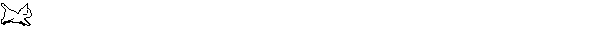



In [74]:
!yarn jar ./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar pi \
       5 1000

Number of Maps  = 5
Samples per Map = 1000


Wrote input for Map #0
Wrote input for Map #1


Wrote input for Map #2
Wrote input for Map #3


Wrote input for Map #4
Starting Job


2025-07-13 15:25:32,657 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903


2025-07-13 15:25:32,857 INFO mapreduce.JobResourceUploader: Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/runner/.staging/job_1752420328551_0001


2025-07-13 15:25:33,374 INFO input.FileInputFormat: Total input files to process : 5


2025-07-13 15:25:34,205 INFO mapreduce.JobSubmitter: number of splits:5


2025-07-13 15:25:34,769 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1752420328551_0001
2025-07-13 15:25:34,770 INFO mapreduce.JobSubmitter: Executing with tokens: []


2025-07-13 15:25:34,885 INFO conf.Configuration: resource-types.xml not found
2025-07-13 15:25:34,885 INFO resource.ResourceUtils: Unable to find 'resource-types.xml'.


2025-07-13 15:25:35,053 INFO impl.YarnClientImpl: Submitted application application_1752420328551_0001


2025-07-13 15:25:35,090 INFO mapreduce.Job: The url to track the job: http://fv-az813-228:8088/proxy/application_1752420328551_0001/
2025-07-13 15:25:35,091 INFO mapreduce.Job: Running job: job_1752420328551_0001


2025-07-13 15:25:41,203 INFO mapreduce.Job: Job job_1752420328551_0001 running in uber mode : false
2025-07-13 15:25:41,204 INFO mapreduce.Job:  map 0% reduce 0%


2025-07-13 15:25:46,282 INFO mapreduce.Job:  map 40% reduce 0%


2025-07-13 15:25:50,333 INFO mapreduce.Job:  map 80% reduce 0%


2025-07-13 15:25:53,359 INFO mapreduce.Job:  map 100% reduce 0%


2025-07-13 15:25:55,372 INFO mapreduce.Job:  map 100% reduce 100%
2025-07-13 15:25:55,379 INFO mapreduce.Job: Job job_1752420328551_0001 completed successfully


2025-07-13 15:25:55,439 INFO mapreduce.Job: Counters: 54
	File System Counters
		FILE: Number of bytes read=116
		FILE: Number of bytes written=1858041
		FILE: Number of read operations=0
		FILE: Number of large read operations=0
		FILE: Number of write operations=0
		HDFS: Number of bytes read=1325
		HDFS: Number of bytes written=215
		HDFS: Number of read operations=25
		HDFS: Number of large read operations=0
		HDFS: Number of write operations=3
		HDFS: Number of bytes read erasure-coded=0
	Job Counters 
		Launched map tasks=5
		Launched reduce tasks=1
		Data-local map tasks=5
		Total time spent by all maps in occupied slots (ms)=15297
		Total time spent by all reduces in occupied slots (ms)=2275
		Total time spent by all map tasks (ms)=15297
		Total time spent by all reduce tasks (ms)=2275
		Total vcore-milliseconds taken by all map tasks=15297
		Total vcore-milliseconds taken by all reduce tasks=2275
		Total megabyte-milliseconds taken by all map tasks=15664128
		Total megabyte-mi

Estimated value of Pi is 3.14160000000000000000


We can now see the finished app listed in the YARN resource manager (note that this time we do not need to specify the Resource Manager's address with the option `-D yarn.resourcemanager.address=localhost:8903`).

In [75]:
!yarn application -list -appStates ALL

2025-07-13 15:25:56,747 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903


Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):1
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL
application_1752420328551_0001	     QuasiMonteCarlo	           MAPREDUCE	    runner	root.default	          FINISHED	         SUCCEEDED	           100%	http://fv-az813-228.f3ggjusmajuejdvszc5ta12tmg.cx.internal.cloudapp.net:19888/jobhistory/job/job_1752420328551_0001


## Run the `pi` app in the background

Let us run the `pi` app in the background (as a subprocess) and with more mappers, so that it lasts longer and we are able to monitor its progress with the `yarn` command-line.

In [76]:
with open('job_out.txt', "w") as stdout_file, open('job_err.txt', "w") as stderr_file:
    process = subprocess.Popen(
        ["yarn", "jar", "./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar", "pi",
         "-D", "localhost:8903",
         "50", "1000000"],
        stdout=stdout_file,
        stderr=stderr_file
    )

In [77]:
time.sleep(10)

In [78]:
!yarn application -list -appStates ALL

2025-07-13 15:26:08,164 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903


Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):1
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL
application_1752420328551_0001	     QuasiMonteCarlo	           MAPREDUCE	    runner	root.default	          FINISHED	         SUCCEEDED	           100%	http://fv-az813-228.f3ggjusmajuejdvszc5ta12tmg.cx.internal.cloudapp.net:19888/jobhistory/job/job_1752420328551_0001


If you do not see the newly submitted application in the YARN queue yet, give it some time and re-run the `yarn application -list` command! 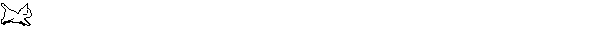



In [79]:
!yarn application -list -appStates ALL

2025-07-13 15:26:09,452 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903


Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):2
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL
application_1752420328551_0001	     QuasiMonteCarlo	           MAPREDUCE	    runner	root.default	          FINISHED	         SUCCEEDED	           100%	http://fv-az813-228.f3ggjusmajuejdvszc5ta12tmg.cx.internal.cloudapp.net:19888/jobhistory/job/job_1752420328551_0001
application_1752420328551_0002	     QuasiMonteCarlo	           MAPREDUCE	    runner	root.default	          ACCEPTED	         UNDEFINED	             0%	                                N/A


You should now see something like this:
```
Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):2
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL
application_1707941943926_0001	     QuasiMonteCarlo	           MAPREDUCE	      root	   default	          FINISHED	         SUCCEEDED	           100%	http://c532258dcee8:19888/jobhistory/job/job_1707941943926_0001
application_1707941943926_0002	     QuasiMonteCarlo	           MAPREDUCE	      root	   default	           RUNNING	         UNDEFINED	          5.18%	             http://localhost:43121
```

The application in status `RUNNING` is the most recently submitted.

# View the logs of an application

To view the logs of a finished application use:

```
yarn logs -applicationID <your app ID>
```

For the sake of this demo, we are going to pick the id if the first successfully finished app with the following shell command:

In [80]:
!yarn application -list -appStates FINISHED 2>/dev/null|grep SUCCEEDED|tail -1| cut -f1

application_1752420328551_0001


View the logs for the selected application id (warning: it's a large file!).

In [81]:
%%bash
app_id=$(yarn application -list -appStates FINISHED 2>/dev/null|grep SUCCEEDED|tail -1| cut -f1)
yarn logs -applicationId $app_id

2025-07-13 15:26:15,333 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903


Container: container_1752420328551_0001_01_000001 on localhost_38061


LogAggregationType: AGGREGATED


LogType:directory.info


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:2534


LogContents:


ls -l:


total 40


-rw-r--r-- 1 runner docker  100 Jul 13 15:25 container_tokens


-rwx------ 1 runner docker 1074 Jul 13 15:25 default_container_executor_session.sh


-rwx------ 1 runner docker 1129 Jul 13 15:25 default_container_executor.sh


lrwxrwxrwx 1 runner docker  208 Jul 13 15:25 job.jar -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/filecache/11/job.jar


drwxr-xr-x 2 runner docker 4096 Jul 13 15:25 jobSubmitDir


lrwxrwxrwx 1 runner docker  208 Jul 13 15:25 job.xml -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/13/job.xml


-rwx------ 1 runner docker 9519 Jul 13 15:25 launch_container.sh


drwx--x--- 2 runner docker 4096 Jul 13 15:25 tmp


find -L . -maxdepth 5 -ls:


   310772      4 drwx--x---   4 runner   docker       4096 Jul 13 15:25 .


   310777      4 drwx--x---   2 runner   docker       4096 Jul 13 15:25 ./tmp


   310789      4 drwxr-xr-x   2 runner   docker       4096 Jul 13 15:25 ./jobSubmitDir


   310742      4 -r-x------   1 runner   docker         82 Jul 13 15:25 ./jobSubmitDir/job.splitmetainfo


   310752      4 -r-x------   1 runner   docker        742 Jul 13 15:25 ./jobSubmitDir/job.split


   310783      4 -rw-r--r--   1 runner   docker         20 Jul 13 15:25 ./.default_container_executor_session.sh.crc


   310785      4 -rw-r--r--   1 runner   docker         20 Jul 13 15:25 ./.default_container_executor.sh.crc


   310780     12 -rwx------   1 runner   docker       9519 Jul 13 15:25 ./launch_container.sh


   310781      4 -rw-r--r--   1 runner   docker         84 Jul 13 15:25 ./.launch_container.sh.crc


   310782      4 -rwx------   1 runner   docker       1074 Jul 13 15:25 ./default_container_executor_session.sh


   310778      4 -rw-r--r--   1 runner   docker        100 Jul 13 15:25 ./container_tokens


   310779      4 -rw-r--r--   1 runner   docker         12 Jul 13 15:25 ./.container_tokens.crc


   310784      4 -rwx------   1 runner   docker       1129 Jul 13 15:25 ./default_container_executor.sh


   310749      4 drwx------   2 runner   docker       4096 Jul 13 15:25 ./job.jar


   310750    276 -r-x------   1 runner   docker     281609 Jul 13 15:25 ./job.jar/job.jar


   310755    260 -r-x------   1 runner   docker     264424 Jul 13 15:25 ./job.xml


broken symlinks(find -L . -maxdepth 5 -type l -ls):


End of LogType:directory.info


*******************************************************************************


Container: container_1752420328551_0001_01_000001 on localhost_38061


LogAggregationType: AGGREGATED


LogType:launch_container.sh


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:9519


LogContents:


#!/bin/bash


set -o pipefail -e


export PRELAUNCH_OUT="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000001/prelaunch.out"


exec >"${PRELAUNCH_OUT}"


export PRELAUNCH_ERR="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000001/prelaunch.err"


exec 2>"${PRELAUNCH_ERR}"


echo "Setting up env variables"


export JAVA_HOME=${JAVA_HOME:-"/usr/lib/jvm/temurin-11-jdk-amd64"}


export HADOOP_COMMON_HOME=${HADOOP_COMMON_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HDFS_HOME=${HADOOP_HDFS_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_CONF_DIR=${HADOOP_CONF_DIR:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop"}


export HADOOP_YARN_HOME=${HADOOP_YARN_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HOME=${HADOOP_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export PATH=${PATH:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.27-6/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin"}


export LANG=${LANG:-"en_US.UTF-8"}


export HADOOP_TOKEN_FILE_LOCATION="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000001/container_tokens"


export CONTAINER_ID="container_1752420328551_0001_01_000001"


export NM_PORT="38061"


export NM_HOST="localhost"


export NM_HTTP_PORT="37999"


export LOCAL_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001"


export LOCAL_USER_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/"


export LOG_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_3/application_1752420328551_0001/container_1752420328551_0001_01_000001"


export USER="runner"


export LOGNAME="runner"


export HOME="/home/"


export PWD="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000001"


export LOCALIZATION_COUNTERS="548961,0,4,0,254"


export JVM_PID="$$"


export NM_AUX_SERVICE_mapreduce_shuffle="AACTXQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA="


export APPLICATION_WEB_PROXY_BASE="/proxy/application_1752420328551_0001"


export SHELL="/bin/bash"


export CLASSPATH="$PWD:$HADOOP_CONF_DIR:$HADOOP_COMMON_HOME/share/hadoop/common/*:$HADOOP_COMMON_HOME/share/hadoop/common/lib/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/lib/*:$HADOOP_YARN_HOME/share/hadoop/yarn/*:$HADOOP_YARN_HOME/share/hadoop/yarn/lib/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*:job.jar/*:job.jar/classes/:job.jar/lib/*:$PWD/*"


export APP_SUBMIT_TIME_ENV="1752420334938"


export LD_LIBRARY_PATH="$PWD:$HADOOP_COMMON_HOME/lib/native"


export MALLOC_ARENA_MAX="4"


echo "Setting up job resources"


mkdir -p jobSubmitDir


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1752420328551_0001/filecache/12/job.split" "jobSubmitDir/job.split"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/13/job.xml" "job.xml"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/filecache/11/job.jar" "job.jar"


mkdir -p jobSubmitDir


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/10/job.splitmetainfo" "jobSubmitDir/job.splitmetainfo"


echo "Copying debugging information"


# Creating copy of launch script


cp "launch_container.sh" "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000001/launch_container.sh"


chmod 640 "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000001/launch_container.sh"


# Determining directory contents


echo "ls -l:" 1>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000001/directory.info"


ls -l 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000001/directory.info"


echo "find -L . -maxdepth 5 -ls:" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000001/directory.info"


find -L . -maxdepth 5 -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000001/directory.info"


echo "broken symlinks(find -L . -maxdepth 5 -type l -ls):" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000001/directory.info"


find -L . -maxdepth 5 -type l -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000001/directory.info"


echo "Launching container"


exec /bin/bash -c "$JAVA_HOME/bin/java -Djava.io.tmpdir=$PWD/tmp -Dlog4j.configuration=container-log4j.properties -Dyarn.app.container.log.dir=/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000001 -Dyarn.app.container.log.filesize=0 -Dhadoop.root.logger=INFO,CLA -Dhadoop.root.logfile=syslog  -Xmx1024m  org.apache.hadoop.mapreduce.v2.app.MRAppMaster 1>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000001/stdout 2>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000001/stderr "


End of LogType:launch_container.sh


************************************************************************************


Container: container_1752420328551_0001_01_000001 on localhost_38061


LogAggregationType: AGGREGATED


LogType:prelaunch.err


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:prelaunch.err


******************************************************************************


Container: container_1752420328551_0001_01_000001 on localhost_38061


LogAggregationType: AGGREGATED


LogType:prelaunch.out


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:100


LogContents:


Setting up env variables


Setting up job resources


Copying debugging information


Launching container


End of LogType:prelaunch.out


******************************************************************************


Container: container_1752420328551_0001_01_000001 on localhost_38061


LogAggregationType: AGGREGATED


LogType:stderr


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:2371


LogContents:


Jul 13, 2025 3:25:38 PM com.sun.jersey.guice.spi.container.GuiceComponentProviderFactory register


INFO: Registering org.apache.hadoop.mapreduce.v2.app.webapp.JAXBContextResolver as a provider class


Jul 13, 2025 3:25:38 PM com.sun.jersey.guice.spi.container.GuiceComponentProviderFactory register


INFO: Registering org.apache.hadoop.yarn.webapp.GenericExceptionHandler as a provider class


Jul 13, 2025 3:25:38 PM com.sun.jersey.guice.spi.container.GuiceComponentProviderFactory register


INFO: Registering org.apache.hadoop.mapreduce.v2.app.webapp.AMWebServices as a root resource class


Jul 13, 2025 3:25:38 PM com.sun.jersey.server.impl.application.WebApplicationImpl _initiate


INFO: Initiating Jersey application, version 'Jersey: 1.19.4 05/24/2017 03:20 PM'


Jul 13, 2025 3:25:38 PM com.sun.jersey.guice.spi.container.GuiceComponentProviderFactory getComponentProvider


INFO: Binding org.apache.hadoop.mapreduce.v2.app.webapp.JAXBContextResolver to GuiceManagedComponentProvider with the scope "Singleton"


Jul 13, 2025 3:25:39 PM com.sun.jersey.guice.spi.container.GuiceComponentProviderFactory getComponentProvider


INFO: Binding org.apache.hadoop.yarn.webapp.GenericExceptionHandler to GuiceManagedComponentProvider with the scope "Singleton"


Jul 13, 2025 3:25:39 PM com.sun.jersey.guice.spi.container.GuiceComponentProviderFactory getComponentProvider


INFO: Binding org.apache.hadoop.mapreduce.v2.app.webapp.AMWebServices to GuiceManagedComponentProvider with the scope "PerRequest"


log4j:WARN No appenders could be found for logger (org.apache.hadoop.mapreduce.v2.app.MRAppMaster).


log4j:WARN Please initialize the log4j system properly.


log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.


End of LogType:stderr


***********************************************************************


Container: container_1752420328551_0001_01_000001 on localhost_38061


LogAggregationType: AGGREGATED


LogType:stdout


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:stdout


***********************************************************************


Container: container_1752420328551_0001_01_000001 on localhost_38061


LogAggregationType: AGGREGATED


LogType:syslog


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:98259


LogContents:


2025-07-13 15:25:37,034 INFO [main] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Created MRAppMaster for application appattempt_1752420328551_0001_000001


2025-07-13 15:25:37,128 INFO [main] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: 


/************************************************************


[system properties]


os.name: Linux


os.version: 6.11.0-1018-azure


java.home: /usr/lib/jvm/temurin-11-jdk-amd64


java.runtime.version: 11.0.27+6


java.vendor: Eclipse Adoptium


java.version: 11.0.27


java.vm.name: OpenJDK 64-Bit Server VM


java.class.path: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000001:/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-registry-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0-tests.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-kms-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-nfs-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/jetty-security-9.4.53.v20231009.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/kerb-common-2.0.3.jar:/home/runner/work/big_dat

java.io.tmpdir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000001/tmp


user.dir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000001


user.name: runner


************************************************************/


2025-07-13 15:25:37,176 INFO [main] org.apache.hadoop.security.SecurityUtil: Updating Configuration


2025-07-13 15:25:37,303 INFO [main] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Executing with tokens: [Kind: YARN_AM_RM_TOKEN, Service: , Ident: (appAttemptId { application_id { id: 1 cluster_timestamp: 1752420328551 } attemptId: 1 } keyId: 643620893)]


2025-07-13 15:25:37,331 INFO [main] org.apache.hadoop.conf.Configuration: resource-types.xml not found


2025-07-13 15:25:37,332 INFO [main] org.apache.hadoop.yarn.util.resource.ResourceUtils: Unable to find 'resource-types.xml'.


2025-07-13 15:25:37,339 INFO [main] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Using mapred newApiCommitter.


2025-07-13 15:25:37,340 INFO [main] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: OutputCommitter set in config null


2025-07-13 15:25:37,361 INFO [main] org.apache.hadoop.mapreduce.lib.output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory


2025-07-13 15:25:37,362 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: File Output Committer Algorithm version is 2


2025-07-13 15:25:37,362 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2025-07-13 15:25:37,681 INFO [main] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: OutputCommitter is org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter


2025-07-13 15:25:37,782 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.jobhistory.EventType for class org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler


2025-07-13 15:25:37,782 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.job.event.JobEventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$JobEventDispatcher


2025-07-13 15:25:37,783 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.job.event.TaskEventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$TaskEventDispatcher


2025-07-13 15:25:37,783 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.job.event.TaskAttemptEventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$TaskAttemptEventDispatcher


2025-07-13 15:25:37,783 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.commit.CommitterEventType for class org.apache.hadoop.mapreduce.v2.app.commit.CommitterEventHandler


2025-07-13 15:25:37,784 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.speculate.Speculator$EventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$SpeculatorEventDispatcher


2025-07-13 15:25:37,784 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.rm.ContainerAllocator$EventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$ContainerAllocatorRouter


2025-07-13 15:25:37,785 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncher$EventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$ContainerLauncherRouter


2025-07-13 15:25:37,806 INFO [main] org.apache.hadoop.mapreduce.v2.jobhistory.JobHistoryUtils: Default file system [hdfs://localhost:8902]


2025-07-13 15:25:37,818 INFO [main] org.apache.hadoop.mapreduce.v2.jobhistory.JobHistoryUtils: Default file system [hdfs://localhost:8902]


2025-07-13 15:25:37,831 INFO [main] org.apache.hadoop.mapreduce.v2.jobhistory.JobHistoryUtils: Default file system [hdfs://localhost:8902]


2025-07-13 15:25:37,837 INFO [main] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Creating intermediate history logDir: [hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate] + based on conf. Should ideally be created by the JobHistoryServer: yarn.app.mapreduce.am.create-intermediate-jh-base-dir


2025-07-13 15:25:37,844 INFO [main] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Perms after creating 493, Expected: 1023


2025-07-13 15:25:37,844 INFO [main] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Explicitly setting permissions to : 1023, rwxrwxrwt


2025-07-13 15:25:37,854 INFO [main] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Perms after creating 488, Expected: 504


2025-07-13 15:25:37,854 INFO [main] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Explicitly setting permissions to : 504, rwxrwx---


2025-07-13 15:25:37,855 INFO [main] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Emitting job history data to the timeline server is not enabled


2025-07-13 15:25:37,880 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.job.event.JobFinishEvent$Type for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$JobFinishEventHandler


2025-07-13 15:25:38,053 INFO [main] org.apache.hadoop.metrics2.impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2025-07-13 15:25:38,135 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).


2025-07-13 15:25:38,135 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MRAppMaster metrics system started


2025-07-13 15:25:38,140 INFO [main] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Adding job token for job_1752420328551_0001 to jobTokenSecretManager


2025-07-13 15:25:38,236 INFO [main] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Not uberizing job_1752420328551_0001 because: not enabled;


2025-07-13 15:25:38,246 INFO [main] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Input size for job job_1752420328551_0001 = 590. Number of splits = 5


2025-07-13 15:25:38,247 INFO [main] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Number of reduces for job job_1752420328551_0001 = 1


2025-07-13 15:25:38,247 INFO [main] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: job_1752420328551_0001Job Transitioned from NEW to INITED


2025-07-13 15:25:38,248 INFO [main] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: MRAppMaster launching normal, non-uberized, multi-container job job_1752420328551_0001.


2025-07-13 15:25:38,263 INFO [main] org.apache.hadoop.ipc.CallQueueManager: Using callQueue: class java.util.concurrent.LinkedBlockingQueue, queueCapacity: 100, scheduler: class org.apache.hadoop.ipc.DefaultRpcScheduler, ipcBackoff: false, ipcFailOver: false.


2025-07-13 15:25:38,266 INFO [main] org.apache.hadoop.ipc.Server: Listener at 0.0.0.0:44277


2025-07-13 15:25:38,267 INFO [Socket Reader #1 for port 0] org.apache.hadoop.ipc.Server: Starting Socket Reader #1 for port 0


2025-07-13 15:25:38,290 INFO [main] org.apache.hadoop.yarn.factories.impl.pb.RpcServerFactoryPBImpl: Adding protocol org.apache.hadoop.mapreduce.v2.api.MRClientProtocolPB to the server


2025-07-13 15:25:38,291 INFO [IPC Server Responder] org.apache.hadoop.ipc.Server: IPC Server Responder: starting


2025-07-13 15:25:38,291 INFO [IPC Server listener on 0] org.apache.hadoop.ipc.Server: IPC Server listener on 0: starting


2025-07-13 15:25:38,292 INFO [main] org.apache.hadoop.mapreduce.v2.app.client.MRClientService: Instantiated MRClientService at localhost/127.0.0.1:44277


2025-07-13 15:25:38,310 INFO [main] org.eclipse.jetty.util.log: Logging initialized @1973ms to org.eclipse.jetty.util.log.Slf4jLog


2025-07-13 15:25:38,364 WARN [main] org.apache.hadoop.security.authentication.server.AuthenticationFilter: Unable to initialize FileSignerSecretProvider, falling back to use random secrets. Reason: Could not read signature secret file: /home/runner/hadoop-http-auth-signature-secret


2025-07-13 15:25:38,384 INFO [main] org.apache.hadoop.http.HttpServer2: Added global filter 'safety' (class=org.apache.hadoop.http.HttpServer2$QuotingInputFilter)


2025-07-13 15:25:38,411 INFO [main] org.apache.hadoop.http.HttpServer2: Added filter AM_PROXY_FILTER (class=org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter) to context mapreduce


2025-07-13 15:25:38,411 INFO [main] org.apache.hadoop.http.HttpServer2: Added filter AM_PROXY_FILTER (class=org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter) to context static


2025-07-13 15:25:38,413 INFO [main] org.apache.hadoop.http.HttpServer2: ASYNC_PROFILER_HOME environment variable and async.profiler.home system property not specified. Disabling /prof endpoint.


2025-07-13 15:25:38,722 INFO [main] org.apache.hadoop.yarn.webapp.WebApps: Registered webapp guice modules


2025-07-13 15:25:38,723 INFO [main] org.apache.hadoop.http.HttpServer2: Jetty bound to port 35581


2025-07-13 15:25:38,723 INFO [main] org.eclipse.jetty.server.Server: jetty-9.4.53.v20231009; built: 2023-10-09T12:29:09.265Z; git: 27bde00a0b95a1d5bbee0eae7984f891d2d0f8c9; jvm 11.0.27+6


2025-07-13 15:25:38,740 INFO [main] org.eclipse.jetty.server.session: DefaultSessionIdManager workerName=node0


2025-07-13 15:25:38,740 INFO [main] org.eclipse.jetty.server.session: No SessionScavenger set, using defaults


2025-07-13 15:25:38,741 INFO [main] org.eclipse.jetty.server.session: node0 Scavenging every 600000ms


2025-07-13 15:25:38,750 INFO [main] org.eclipse.jetty.server.handler.ContextHandler: Started o.e.j.s.ServletContextHandler@7944b8b4{static,/static,jar:file:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/yarn/hadoop-yarn-common-3.4.0.jar!/webapps/static,AVAILABLE}


2025-07-13 15:25:39,400 INFO [main] org.eclipse.jetty.server.handler.ContextHandler: Started o.e.j.w.WebAppContext@31082efa{mapreduce,/,file:///home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000001/tmp/jetty-0_0_0_0-35581-hadoop-yarn-common-3_4_0_jar-_-any-4929869674002827987/webapp/,AVAILABLE}{jar:file:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/yarn/hadoop-yarn-common-3.4.0.jar!/webapps/mapreduce}


2025-07-13 15:25:39,406 INFO [main] org.eclipse.jetty.server.AbstractConnector: Started ServerConnector@706ceca6{HTTP/1.1, (http/1.1)}{0.0.0.0:35581}


2025-07-13 15:25:39,406 INFO [main] org.eclipse.jetty.server.Server: Started @3070ms


2025-07-13 15:25:39,409 INFO [main] org.apache.hadoop.yarn.webapp.WebApps: Web app mapreduce started at 35581


2025-07-13 15:25:39,413 INFO [main] org.apache.hadoop.ipc.CallQueueManager: Using callQueue: class java.util.concurrent.LinkedBlockingQueue, queueCapacity: 3000, scheduler: class org.apache.hadoop.ipc.DefaultRpcScheduler, ipcBackoff: false, ipcFailOver: false.


2025-07-13 15:25:39,413 INFO [main] org.apache.hadoop.ipc.Server: Listener at 0.0.0.0:40541


2025-07-13 15:25:39,413 INFO [Socket Reader #1 for port 0] org.apache.hadoop.ipc.Server: Starting Socket Reader #1 for port 0


2025-07-13 15:25:39,417 INFO [IPC Server Responder] org.apache.hadoop.ipc.Server: IPC Server Responder: starting


2025-07-13 15:25:39,417 INFO [IPC Server listener on 0] org.apache.hadoop.ipc.Server: IPC Server listener on 0: starting


2025-07-13 15:25:39,435 INFO [main] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: nodeBlacklistingEnabled:true


2025-07-13 15:25:39,435 INFO [main] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: maxTaskFailuresPerNode is 3


2025-07-13 15:25:39,435 INFO [main] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: blacklistDisablePercent is 33


2025-07-13 15:25:39,437 INFO [main] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: 0% of the mappers will be scheduled using OPPORTUNISTIC containers


2025-07-13 15:25:39,458 INFO [main] org.apache.hadoop.yarn.client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at /0.0.0.0:8030


2025-07-13 15:25:39,519 INFO [main] org.apache.hadoop.mapreduce.v2.app.rm.RMCommunicator: maxContainerCapability: <memory:4096, vCores:4>


2025-07-13 15:25:39,519 INFO [main] org.apache.hadoop.mapreduce.v2.app.rm.RMCommunicator: queue: root.default


2025-07-13 15:25:39,522 INFO [main] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Upper limit on the thread pool size is 500


2025-07-13 15:25:39,522 INFO [main] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: The thread pool initial size is 10


2025-07-13 15:25:39,530 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: job_1752420328551_0001Job Transitioned from INITED to SETUP


2025-07-13 15:25:39,531 INFO [CommitterEvent Processor #0] org.apache.hadoop.mapreduce.v2.app.commit.CommitterEventHandler: Processing the event EventType: JOB_SETUP


2025-07-13 15:25:39,536 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: job_1752420328551_0001Job Transitioned from SETUP to RUNNING


2025-07-13 15:25:39,550 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Resource capability of task type MAP is set to <memory:1024, vCores:1>


2025-07-13 15:25:39,558 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000000 Task Transitioned from NEW to SCHEDULED


2025-07-13 15:25:39,558 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000001 Task Transitioned from NEW to SCHEDULED


2025-07-13 15:25:39,558 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000002 Task Transitioned from NEW to SCHEDULED


2025-07-13 15:25:39,559 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000003 Task Transitioned from NEW to SCHEDULED


2025-07-13 15:25:39,559 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000004 Task Transitioned from NEW to SCHEDULED


2025-07-13 15:25:39,560 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Resource capability of task type REDUCE is set to <memory:1024, vCores:1>


2025-07-13 15:25:39,560 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_r_000000 Task Transitioned from NEW to SCHEDULED


2025-07-13 15:25:39,561 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000000_0 TaskAttempt Transitioned from NEW to UNASSIGNED


2025-07-13 15:25:39,561 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000001_0 TaskAttempt Transitioned from NEW to UNASSIGNED


2025-07-13 15:25:39,561 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000002_0 TaskAttempt Transitioned from NEW to UNASSIGNED


2025-07-13 15:25:39,561 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000003_0 TaskAttempt Transitioned from NEW to UNASSIGNED


2025-07-13 15:25:39,561 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000004_0 TaskAttempt Transitioned from NEW to UNASSIGNED


2025-07-13 15:25:39,561 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_r_000000_0 TaskAttempt Transitioned from NEW to UNASSIGNED


2025-07-13 15:25:39,564 INFO [Thread-57] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: mapResourceRequest:<memory:1024, vCores:1>


2025-07-13 15:25:39,579 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Event Writer setup for JobId: job_1752420328551_0001, File: hdfs://localhost:8902/tmp/hadoop-yarn/staging/runner/.staging/job_1752420328551_0001/job_1752420328551_0001_1.jhist


2025-07-13 15:25:39,588 INFO [Thread-57] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: reduceResourceRequest:<memory:1024, vCores:1>


2025-07-13 15:25:40,522 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Before Scheduling: PendingReds:1 ScheduledMaps:5 ScheduledReds:0 AssignedMaps:0 AssignedReds:0 CompletedMaps:0 CompletedReds:0 ContAlloc:0 ContRel:0 HostLocal:0 RackLocal:0


2025-07-13 15:25:40,553 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: applicationId=application_1752420328551_0001: ask=3 release=0 newContainers=0 finishedContainers=0 resourceLimit=<memory:2048, vCores:7> knownNMs=1


2025-07-13 15:25:40,554 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:2048, vCores:7>


2025-07-13 15:25:40,554 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Reduce slow start threshold not met. completedMapsForReduceSlowstart 1


2025-07-13 15:25:41,566 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Got allocated containers 2


2025-07-13 15:25:41,568 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Assigned container container_1752420328551_0001_01_000002 to attempt_1752420328551_0001_m_000000_0


2025-07-13 15:25:41,568 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Assigned container container_1752420328551_0001_01_000003 to attempt_1752420328551_0001_m_000001_0


2025-07-13 15:25:41,568 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2025-07-13 15:25:41,568 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Reduce slow start threshold not met. completedMapsForReduceSlowstart 1


2025-07-13 15:25:41,569 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: After Scheduling: PendingReds:1 ScheduledMaps:3 ScheduledReds:0 AssignedMaps:2 AssignedReds:0 CompletedMaps:0 CompletedReds:0 ContAlloc:2 ContRel:0 HostLocal:2 RackLocal:0


2025-07-13 15:25:41,604 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: The job-jar file on the remote FS is hdfs://localhost:8902/tmp/hadoop-yarn/staging/runner/.staging/job_1752420328551_0001/job.jar


2025-07-13 15:25:41,607 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: The job-conf file on the remote FS is /tmp/hadoop-yarn/staging/runner/.staging/job_1752420328551_0001/job.xml


2025-07-13 15:25:41,608 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Adding #0 tokens and #1 secret keys for NM use for launching container


2025-07-13 15:25:41,608 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Size of containertokens_dob is 1


2025-07-13 15:25:41,608 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Putting shuffle token in serviceData


2025-07-13 15:25:41,657 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapred.JobConf: Task java-opts do not specify heap size. Setting task attempt jvm max heap size to -Xmx820m


2025-07-13 15:25:41,659 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000000_0 TaskAttempt Transitioned from UNASSIGNED to ASSIGNED


2025-07-13 15:25:41,663 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapred.JobConf: Task java-opts do not specify heap size. Setting task attempt jvm max heap size to -Xmx820m


2025-07-13 15:25:41,663 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000001_0 TaskAttempt Transitioned from UNASSIGNED to ASSIGNED


2025-07-13 15:25:41,664 INFO [ContainerLauncher #0] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_REMOTE_LAUNCH for container container_1752420328551_0001_01_000002 taskAttempt attempt_1752420328551_0001_m_000000_0


2025-07-13 15:25:41,665 INFO [ContainerLauncher #1] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_REMOTE_LAUNCH for container container_1752420328551_0001_01_000003 taskAttempt attempt_1752420328551_0001_m_000001_0


2025-07-13 15:25:41,666 INFO [ContainerLauncher #1] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Launching attempt_1752420328551_0001_m_000001_0


2025-07-13 15:25:41,666 INFO [ContainerLauncher #0] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Launching attempt_1752420328551_0001_m_000000_0


2025-07-13 15:25:41,729 INFO [ContainerLauncher #0] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Shuffle port returned by ContainerManager for attempt_1752420328551_0001_m_000000_0 : 37725


2025-07-13 15:25:41,730 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: TaskAttempt: [attempt_1752420328551_0001_m_000000_0] using containerId: [container_1752420328551_0001_01_000002 on NM: [localhost:38061]


2025-07-13 15:25:41,735 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000000_0 TaskAttempt Transitioned from ASSIGNED to RUNNING


2025-07-13 15:25:41,735 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000000 Task Transitioned from SCHEDULED to RUNNING


2025-07-13 15:25:41,740 INFO [ContainerLauncher #1] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Shuffle port returned by ContainerManager for attempt_1752420328551_0001_m_000001_0 : 37725


2025-07-13 15:25:41,740 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: TaskAttempt: [attempt_1752420328551_0001_m_000001_0] using containerId: [container_1752420328551_0001_01_000003 on NM: [localhost:38061]


2025-07-13 15:25:41,740 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000001_0 TaskAttempt Transitioned from ASSIGNED to RUNNING


2025-07-13 15:25:41,740 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000001 Task Transitioned from SCHEDULED to RUNNING


2025-07-13 15:25:42,585 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: applicationId=application_1752420328551_0001: ask=3 release=0 newContainers=0 finishedContainers=0 resourceLimit=<memory:0, vCores:5> knownNMs=1


2025-07-13 15:25:42,585 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2025-07-13 15:25:42,585 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Reduce slow start threshold not met. completedMapsForReduceSlowstart 1


2025-07-13 15:25:43,594 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2025-07-13 15:25:43,594 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Reduce slow start threshold not met. completedMapsForReduceSlowstart 1


2025-07-13 15:25:43,606 INFO [Socket Reader #1 for port 0] SecurityLogger.org.apache.hadoop.ipc.Server: Auth successful for job_1752420328551_0001 (auth:SIMPLE) from localhost:59386 / 127.0.0.1:59386


2025-07-13 15:25:43,632 INFO [Socket Reader #1 for port 0] SecurityLogger.org.apache.hadoop.ipc.Server: Auth successful for job_1752420328551_0001 (auth:SIMPLE) from localhost:59402 / 127.0.0.1:59402


2025-07-13 15:25:43,636 INFO [IPC Server handler 8 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID : jvm_1752420328551_0001_m_000002 asked for a task


2025-07-13 15:25:43,636 INFO [IPC Server handler 8 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID: jvm_1752420328551_0001_m_000002 given task: attempt_1752420328551_0001_m_000000_0


2025-07-13 15:25:43,645 INFO [IPC Server handler 3 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID : jvm_1752420328551_0001_m_000003 asked for a task


2025-07-13 15:25:43,645 INFO [IPC Server handler 3 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID: jvm_1752420328551_0001_m_000003 given task: attempt_1752420328551_0001_m_000001_0


2025-07-13 15:25:44,611 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2025-07-13 15:25:44,611 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Reduce slow start threshold not met. completedMapsForReduceSlowstart 1


2025-07-13 15:25:44,995 INFO [IPC Server handler 14 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1752420328551_0001_m_000000_0 is : 0.0


2025-07-13 15:25:45,027 INFO [IPC Server handler 2 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1752420328551_0001_m_000001_0 is : 0.0


2025-07-13 15:25:45,081 INFO [IPC Server handler 22 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1752420328551_0001_m_000000_0 is : 1.0


2025-07-13 15:25:45,090 INFO [IPC Server handler 20 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Done acknowledgment from attempt_1752420328551_0001_m_000000_0


2025-07-13 15:25:45,093 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000000_0 TaskAttempt Transitioned from RUNNING to SUCCESS_FINISHING_CONTAINER


2025-07-13 15:25:45,116 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: Task succeeded with attempt attempt_1752420328551_0001_m_000000_0


2025-07-13 15:25:45,119 INFO [IPC Server handler 19 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1752420328551_0001_m_000001_0 is : 1.0


2025-07-13 15:25:45,120 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000000 Task Transitioned from RUNNING to SUCCEEDED


2025-07-13 15:25:45,123 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Num completed Tasks: 1


2025-07-13 15:25:45,126 INFO [IPC Server handler 4 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Done acknowledgment from attempt_1752420328551_0001_m_000001_0


2025-07-13 15:25:45,128 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000001_0 TaskAttempt Transitioned from RUNNING to SUCCESS_FINISHING_CONTAINER


2025-07-13 15:25:45,128 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: Task succeeded with attempt attempt_1752420328551_0001_m_000001_0


2025-07-13 15:25:45,128 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000001 Task Transitioned from RUNNING to SUCCEEDED


2025-07-13 15:25:45,128 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Num completed Tasks: 2


2025-07-13 15:25:45,611 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Before Scheduling: PendingReds:1 ScheduledMaps:3 ScheduledReds:0 AssignedMaps:2 AssignedReds:0 CompletedMaps:2 CompletedReds:0 ContAlloc:2 ContRel:0 HostLocal:2 RackLocal:0


2025-07-13 15:25:45,622 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Received completed container container_1752420328551_0001_01_000002


2025-07-13 15:25:45,622 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Received completed container container_1752420328551_0001_01_000003


2025-07-13 15:25:45,622 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Got allocated containers 2


2025-07-13 15:25:45,622 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Diagnostics report from attempt_1752420328551_0001_m_000000_0: 


2025-07-13 15:25:45,622 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000000_0 TaskAttempt Transitioned from SUCCESS_FINISHING_CONTAINER to SUCCEEDED


2025-07-13 15:25:45,622 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Diagnostics report from attempt_1752420328551_0001_m_000001_0: 


2025-07-13 15:25:45,622 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000001_0 TaskAttempt Transitioned from SUCCESS_FINISHING_CONTAINER to SUCCEEDED


2025-07-13 15:25:45,622 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Assigned container container_1752420328551_0001_01_000004 to attempt_1752420328551_0001_m_000002_0


2025-07-13 15:25:45,623 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Assigned container container_1752420328551_0001_01_000005 to attempt_1752420328551_0001_m_000003_0


2025-07-13 15:25:45,623 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2025-07-13 15:25:45,623 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Reduce slow start threshold reached. Scheduling reduces.


2025-07-13 15:25:45,623 INFO [ContainerLauncher #2] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_COMPLETED for container container_1752420328551_0001_01_000002 taskAttempt attempt_1752420328551_0001_m_000000_0


2025-07-13 15:25:45,624 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: completedMapPercent 0.4 totalResourceLimit:<memory:2048, vCores:7> finalMapResourceLimit:<memory:1229, vCores:5> finalReduceResourceLimit:<memory:819, vCores:2> netScheduledMapResource:<memory:3072, vCores:3> netScheduledReduceResource:<memory:0, vCores:0>


2025-07-13 15:25:45,624 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: After Scheduling: PendingReds:1 ScheduledMaps:1 ScheduledReds:0 AssignedMaps:2 AssignedReds:0 CompletedMaps:2 CompletedReds:0 ContAlloc:4 ContRel:0 HostLocal:4 RackLocal:0


2025-07-13 15:25:45,625 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapred.JobConf: Task java-opts do not specify heap size. Setting task attempt jvm max heap size to -Xmx820m


2025-07-13 15:25:45,625 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000002_0 TaskAttempt Transitioned from UNASSIGNED to ASSIGNED


2025-07-13 15:25:45,626 INFO [ContainerLauncher #3] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_COMPLETED for container container_1752420328551_0001_01_000003 taskAttempt attempt_1752420328551_0001_m_000001_0


2025-07-13 15:25:45,627 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapred.JobConf: Task java-opts do not specify heap size. Setting task attempt jvm max heap size to -Xmx820m


2025-07-13 15:25:45,627 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000003_0 TaskAttempt Transitioned from UNASSIGNED to ASSIGNED


2025-07-13 15:25:45,628 INFO [ContainerLauncher #4] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_REMOTE_LAUNCH for container container_1752420328551_0001_01_000004 taskAttempt attempt_1752420328551_0001_m_000002_0


2025-07-13 15:25:45,628 INFO [ContainerLauncher #4] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Launching attempt_1752420328551_0001_m_000002_0


2025-07-13 15:25:45,628 INFO [ContainerLauncher #5] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_REMOTE_LAUNCH for container container_1752420328551_0001_01_000005 taskAttempt attempt_1752420328551_0001_m_000003_0


2025-07-13 15:25:45,628 INFO [ContainerLauncher #5] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Launching attempt_1752420328551_0001_m_000003_0


2025-07-13 15:25:45,650 INFO [ContainerLauncher #5] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Shuffle port returned by ContainerManager for attempt_1752420328551_0001_m_000003_0 : 37725


2025-07-13 15:25:45,651 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: TaskAttempt: [attempt_1752420328551_0001_m_000003_0] using containerId: [container_1752420328551_0001_01_000005 on NM: [localhost:38061]


2025-07-13 15:25:45,651 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000003_0 TaskAttempt Transitioned from ASSIGNED to RUNNING


2025-07-13 15:25:45,652 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000003 Task Transitioned from SCHEDULED to RUNNING


2025-07-13 15:25:45,661 INFO [ContainerLauncher #4] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Shuffle port returned by ContainerManager for attempt_1752420328551_0001_m_000002_0 : 37725


2025-07-13 15:25:45,661 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: TaskAttempt: [attempt_1752420328551_0001_m_000002_0] using containerId: [container_1752420328551_0001_01_000004 on NM: [localhost:38061]


2025-07-13 15:25:45,662 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000002_0 TaskAttempt Transitioned from ASSIGNED to RUNNING


2025-07-13 15:25:45,662 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000002 Task Transitioned from SCHEDULED to RUNNING


2025-07-13 15:25:46,647 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: applicationId=application_1752420328551_0001: ask=3 release=0 newContainers=0 finishedContainers=0 resourceLimit=<memory:0, vCores:5> knownNMs=1


2025-07-13 15:25:46,647 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2025-07-13 15:25:46,647 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: completedMapPercent 0.4 totalResourceLimit:<memory:2048, vCores:7> finalMapResourceLimit:<memory:1229, vCores:5> finalReduceResourceLimit:<memory:819, vCores:2> netScheduledMapResource:<memory:3072, vCores:3> netScheduledReduceResource:<memory:0, vCores:0>


2025-07-13 15:25:47,485 INFO [Socket Reader #1 for port 0] SecurityLogger.org.apache.hadoop.ipc.Server: Auth successful for job_1752420328551_0001 (auth:SIMPLE) from localhost:59406 / 127.0.0.1:59406


2025-07-13 15:25:47,503 INFO [IPC Server handler 8 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID : jvm_1752420328551_0001_m_000004 asked for a task


2025-07-13 15:25:47,503 INFO [IPC Server handler 8 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID: jvm_1752420328551_0001_m_000004 given task: attempt_1752420328551_0001_m_000002_0


2025-07-13 15:25:47,552 INFO [Socket Reader #1 for port 0] SecurityLogger.org.apache.hadoop.ipc.Server: Auth successful for job_1752420328551_0001 (auth:SIMPLE) from localhost:59422 / 127.0.0.1:59422


2025-07-13 15:25:47,567 INFO [IPC Server handler 3 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID : jvm_1752420328551_0001_m_000005 asked for a task


2025-07-13 15:25:47,567 INFO [IPC Server handler 3 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID: jvm_1752420328551_0001_m_000005 given task: attempt_1752420328551_0001_m_000003_0


2025-07-13 15:25:47,651 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2025-07-13 15:25:47,651 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: completedMapPercent 0.4 totalResourceLimit:<memory:2048, vCores:7> finalMapResourceLimit:<memory:1229, vCores:5> finalReduceResourceLimit:<memory:819, vCores:2> netScheduledMapResource:<memory:3072, vCores:3> netScheduledReduceResource:<memory:0, vCores:0>


2025-07-13 15:25:48,655 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2025-07-13 15:25:48,655 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: completedMapPercent 0.4 totalResourceLimit:<memory:2048, vCores:7> finalMapResourceLimit:<memory:1229, vCores:5> finalReduceResourceLimit:<memory:819, vCores:2> netScheduledMapResource:<memory:3072, vCores:3> netScheduledReduceResource:<memory:0, vCores:0>


2025-07-13 15:25:48,803 INFO [IPC Server handler 14 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1752420328551_0001_m_000002_0 is : 0.0


2025-07-13 15:25:48,869 INFO [IPC Server handler 2 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1752420328551_0001_m_000003_0 is : 0.0


2025-07-13 15:25:48,894 INFO [IPC Server handler 22 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1752420328551_0001_m_000002_0 is : 1.0


2025-07-13 15:25:48,901 INFO [IPC Server handler 20 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Done acknowledgment from attempt_1752420328551_0001_m_000002_0


2025-07-13 15:25:48,902 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000002_0 TaskAttempt Transitioned from RUNNING to SUCCESS_FINISHING_CONTAINER


2025-07-13 15:25:48,904 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: Task succeeded with attempt attempt_1752420328551_0001_m_000002_0


2025-07-13 15:25:48,904 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000002 Task Transitioned from RUNNING to SUCCEEDED


2025-07-13 15:25:48,904 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Num completed Tasks: 3


2025-07-13 15:25:48,957 INFO [IPC Server handler 19 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1752420328551_0001_m_000003_0 is : 1.0


2025-07-13 15:25:48,960 INFO [IPC Server handler 4 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Done acknowledgment from attempt_1752420328551_0001_m_000003_0


2025-07-13 15:25:48,961 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000003_0 TaskAttempt Transitioned from RUNNING to SUCCESS_FINISHING_CONTAINER


2025-07-13 15:25:48,961 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: Task succeeded with attempt attempt_1752420328551_0001_m_000003_0


2025-07-13 15:25:48,961 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000003 Task Transitioned from RUNNING to SUCCEEDED


2025-07-13 15:25:48,962 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Num completed Tasks: 4


2025-07-13 15:25:49,655 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Before Scheduling: PendingReds:1 ScheduledMaps:1 ScheduledReds:0 AssignedMaps:2 AssignedReds:0 CompletedMaps:4 CompletedReds:0 ContAlloc:4 ContRel:0 HostLocal:4 RackLocal:0


2025-07-13 15:25:49,660 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Received completed container container_1752420328551_0001_01_000004


2025-07-13 15:25:49,660 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Received completed container container_1752420328551_0001_01_000005


2025-07-13 15:25:49,661 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Got allocated containers 1


2025-07-13 15:25:49,661 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Diagnostics report from attempt_1752420328551_0001_m_000002_0: 


2025-07-13 15:25:49,661 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000002_0 TaskAttempt Transitioned from SUCCESS_FINISHING_CONTAINER to SUCCEEDED


2025-07-13 15:25:49,661 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Diagnostics report from attempt_1752420328551_0001_m_000003_0: 


2025-07-13 15:25:49,661 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000003_0 TaskAttempt Transitioned from SUCCESS_FINISHING_CONTAINER to SUCCEEDED


2025-07-13 15:25:49,661 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Assigned container container_1752420328551_0001_01_000006 to attempt_1752420328551_0001_m_000004_0


2025-07-13 15:25:49,661 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:1024, vCores:6>


2025-07-13 15:25:49,661 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: All maps assigned. Ramping up all remaining reduces:1


2025-07-13 15:25:49,661 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: After Scheduling: PendingReds:0 ScheduledMaps:0 ScheduledReds:1 AssignedMaps:1 AssignedReds:0 CompletedMaps:4 CompletedReds:0 ContAlloc:5 ContRel:0 HostLocal:5 RackLocal:0


2025-07-13 15:25:49,662 INFO [ContainerLauncher #6] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_COMPLETED for container container_1752420328551_0001_01_000004 taskAttempt attempt_1752420328551_0001_m_000002_0


2025-07-13 15:25:49,662 INFO [ContainerLauncher #7] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_COMPLETED for container container_1752420328551_0001_01_000005 taskAttempt attempt_1752420328551_0001_m_000003_0


2025-07-13 15:25:49,663 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapred.JobConf: Task java-opts do not specify heap size. Setting task attempt jvm max heap size to -Xmx820m


2025-07-13 15:25:49,663 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000004_0 TaskAttempt Transitioned from UNASSIGNED to ASSIGNED


2025-07-13 15:25:49,663 INFO [ContainerLauncher #8] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_REMOTE_LAUNCH for container container_1752420328551_0001_01_000006 taskAttempt attempt_1752420328551_0001_m_000004_0


2025-07-13 15:25:49,663 INFO [ContainerLauncher #8] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Launching attempt_1752420328551_0001_m_000004_0


2025-07-13 15:25:49,673 INFO [ContainerLauncher #8] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Shuffle port returned by ContainerManager for attempt_1752420328551_0001_m_000004_0 : 37725


2025-07-13 15:25:49,674 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: TaskAttempt: [attempt_1752420328551_0001_m_000004_0] using containerId: [container_1752420328551_0001_01_000006 on NM: [localhost:38061]


2025-07-13 15:25:49,674 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000004_0 TaskAttempt Transitioned from ASSIGNED to RUNNING


2025-07-13 15:25:49,674 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000004 Task Transitioned from SCHEDULED to RUNNING


2025-07-13 15:25:50,666 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: applicationId=application_1752420328551_0001: ask=4 release=0 newContainers=0 finishedContainers=0 resourceLimit=<memory:1024, vCores:6> knownNMs=1


2025-07-13 15:25:50,750 INFO [Socket Reader #1 for port 0] SecurityLogger.org.apache.hadoop.ipc.Server: Auth successful for job_1752420328551_0001 (auth:SIMPLE) from localhost:58330 / 127.0.0.1:58330


2025-07-13 15:25:50,759 INFO [IPC Server handler 14 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID : jvm_1752420328551_0001_m_000006 asked for a task


2025-07-13 15:25:50,759 INFO [IPC Server handler 14 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID: jvm_1752420328551_0001_m_000006 given task: attempt_1752420328551_0001_m_000004_0


2025-07-13 15:25:51,611 INFO [IPC Server handler 14 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1752420328551_0001_m_000004_0 is : 0.0


2025-07-13 15:25:51,667 INFO [IPC Server handler 2 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1752420328551_0001_m_000004_0 is : 1.0


2025-07-13 15:25:51,671 INFO [IPC Server handler 22 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Done acknowledgment from attempt_1752420328551_0001_m_000004_0


2025-07-13 15:25:51,672 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000004_0 TaskAttempt Transitioned from RUNNING to SUCCESS_FINISHING_CONTAINER


2025-07-13 15:25:51,672 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: Task succeeded with attempt attempt_1752420328551_0001_m_000004_0


2025-07-13 15:25:51,673 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_m_000004 Task Transitioned from RUNNING to SUCCEEDED


2025-07-13 15:25:51,673 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Got allocated containers 1


2025-07-13 15:25:51,673 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Num completed Tasks: 5


2025-07-13 15:25:51,673 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Assigned to reduce


2025-07-13 15:25:51,673 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Assigned container container_1752420328551_0001_01_000007 to attempt_1752420328551_0001_r_000000_0


2025-07-13 15:25:51,673 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: After Scheduling: PendingReds:0 ScheduledMaps:0 ScheduledReds:0 AssignedMaps:1 AssignedReds:1 CompletedMaps:5 CompletedReds:0 ContAlloc:6 ContRel:0 HostLocal:5 RackLocal:0


2025-07-13 15:25:51,686 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapred.JobConf: Task java-opts do not specify heap size. Setting task attempt jvm max heap size to -Xmx820m


2025-07-13 15:25:51,688 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_r_000000_0 TaskAttempt Transitioned from UNASSIGNED to ASSIGNED


2025-07-13 15:25:51,689 INFO [ContainerLauncher #9] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_REMOTE_LAUNCH for container container_1752420328551_0001_01_000007 taskAttempt attempt_1752420328551_0001_r_000000_0


2025-07-13 15:25:51,689 INFO [ContainerLauncher #9] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Launching attempt_1752420328551_0001_r_000000_0


2025-07-13 15:25:51,713 INFO [ContainerLauncher #9] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Shuffle port returned by ContainerManager for attempt_1752420328551_0001_r_000000_0 : 37725


2025-07-13 15:25:51,715 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: TaskAttempt: [attempt_1752420328551_0001_r_000000_0] using containerId: [container_1752420328551_0001_01_000007 on NM: [localhost:38061]


2025-07-13 15:25:51,715 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_r_000000_0 TaskAttempt Transitioned from ASSIGNED to RUNNING


2025-07-13 15:25:51,715 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_r_000000 Task Transitioned from SCHEDULED to RUNNING


2025-07-13 15:25:52,678 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: applicationId=application_1752420328551_0001: ask=1 release=0 newContainers=0 finishedContainers=1 resourceLimit=<memory:1024, vCores:6> knownNMs=1


2025-07-13 15:25:52,678 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Received completed container container_1752420328551_0001_01_000006


2025-07-13 15:25:52,678 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: After Scheduling: PendingReds:0 ScheduledMaps:0 ScheduledReds:0 AssignedMaps:0 AssignedReds:1 CompletedMaps:5 CompletedReds:0 ContAlloc:6 ContRel:0 HostLocal:5 RackLocal:0


2025-07-13 15:25:52,682 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Diagnostics report from attempt_1752420328551_0001_m_000004_0: 


2025-07-13 15:25:52,682 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_m_000004_0 TaskAttempt Transitioned from SUCCESS_FINISHING_CONTAINER to SUCCEEDED


2025-07-13 15:25:52,683 INFO [ContainerLauncher #0] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_COMPLETED for container container_1752420328551_0001_01_000006 taskAttempt attempt_1752420328551_0001_m_000004_0


2025-07-13 15:25:52,861 INFO [Socket Reader #1 for port 0] SecurityLogger.org.apache.hadoop.ipc.Server: Auth successful for job_1752420328551_0001 (auth:SIMPLE) from localhost:58338 / 127.0.0.1:58338


2025-07-13 15:25:52,870 INFO [IPC Server handler 20 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID : jvm_1752420328551_0001_r_000007 asked for a task


2025-07-13 15:25:52,870 INFO [IPC Server handler 20 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID: jvm_1752420328551_0001_r_000007 given task: attempt_1752420328551_0001_r_000000_0


2025-07-13 15:25:53,581 INFO [IPC Server handler 14 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: MapCompletionEvents request from attempt_1752420328551_0001_r_000000_0. startIndex 0 maxEvents 10000


2025-07-13 15:25:53,699 INFO [IPC Server handler 20 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1752420328551_0001_r_000000_0 is : 0.0


2025-07-13 15:25:53,948 INFO [IPC Server handler 19 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Commit-pending state update from attempt_1752420328551_0001_r_000000_0


2025-07-13 15:25:53,948 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_r_000000_0 TaskAttempt Transitioned from RUNNING to COMMIT_PENDING


2025-07-13 15:25:53,949 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: attempt_1752420328551_0001_r_000000_0 given a go for committing the task output.


2025-07-13 15:25:53,950 INFO [IPC Server handler 6 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Commit go/no-go request from attempt_1752420328551_0001_r_000000_0


2025-07-13 15:25:53,950 INFO [IPC Server handler 6 on default port 40541] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: Result of canCommit for attempt_1752420328551_0001_r_000000_0:true


2025-07-13 15:25:53,985 INFO [IPC Server handler 10 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1752420328551_0001_r_000000_0 is : 1.0


2025-07-13 15:25:53,989 INFO [IPC Server handler 9 on default port 40541] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Done acknowledgment from attempt_1752420328551_0001_r_000000_0


2025-07-13 15:25:53,990 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_r_000000_0 TaskAttempt Transitioned from COMMIT_PENDING to SUCCESS_FINISHING_CONTAINER


2025-07-13 15:25:53,991 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: Task succeeded with attempt attempt_1752420328551_0001_r_000000_0


2025-07-13 15:25:53,991 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1752420328551_0001_r_000000 Task Transitioned from RUNNING to SUCCEEDED


2025-07-13 15:25:53,991 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Num completed Tasks: 6


2025-07-13 15:25:53,993 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: job_1752420328551_0001Job Transitioned from RUNNING to COMMITTING


2025-07-13 15:25:53,993 INFO [CommitterEvent Processor #1] org.apache.hadoop.mapreduce.v2.app.commit.CommitterEventHandler: Processing the event EventType: JOB_COMMIT


2025-07-13 15:25:54,042 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Calling handler for JobFinishedEvent 


2025-07-13 15:25:54,042 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: job_1752420328551_0001Job Transitioned from COMMITTING to SUCCEEDED


2025-07-13 15:25:54,043 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Job finished cleanly, recording last MRAppMaster retry


2025-07-13 15:25:54,043 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Notify RMCommunicator isAMLastRetry: true


2025-07-13 15:25:54,043 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.rm.RMCommunicator: RMCommunicator notified that shouldUnregistered is: true


2025-07-13 15:25:54,043 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Notify JHEH isAMLastRetry: true


2025-07-13 15:25:54,043 INFO [Thread-76] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: JobHistoryEventHandler notified that forceJobCompletion is true


2025-07-13 15:25:54,043 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Calling stop for all the services


2025-07-13 15:25:54,044 INFO [Thread-76] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Stopping JobHistoryEventHandler. Size of the outstanding queue size is 0


2025-07-13 15:25:54,069 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Copying hdfs://localhost:8902/tmp/hadoop-yarn/staging/runner/.staging/job_1752420328551_0001/job_1752420328551_0001_1.jhist to hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1752420328551_0001-1752420334938-runner-QuasiMonteCarlo-1752420354038-5-1-SUCCEEDED-root.default-1752420339525.jhist_tmp


2025-07-13 15:25:54,094 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Copied from: hdfs://localhost:8902/tmp/hadoop-yarn/staging/runner/.staging/job_1752420328551_0001/job_1752420328551_0001_1.jhist to done location: hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1752420328551_0001-1752420334938-runner-QuasiMonteCarlo-1752420354038-5-1-SUCCEEDED-root.default-1752420339525.jhist_tmp


2025-07-13 15:25:54,094 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Set historyUrl to http://fv-az813-228.f3ggjusmajuejdvszc5ta12tmg.cx.internal.cloudapp.net:19888/jobhistory/job/job_1752420328551_0001


2025-07-13 15:25:54,095 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Copying hdfs://localhost:8902/tmp/hadoop-yarn/staging/runner/.staging/job_1752420328551_0001/job_1752420328551_0001_1_conf.xml to hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1752420328551_0001_conf.xml_tmp


2025-07-13 15:25:54,113 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Copied from: hdfs://localhost:8902/tmp/hadoop-yarn/staging/runner/.staging/job_1752420328551_0001/job_1752420328551_0001_1_conf.xml to done location: hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1752420328551_0001_conf.xml_tmp


2025-07-13 15:25:54,118 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Moved tmp to done: hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1752420328551_0001.summary_tmp to hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1752420328551_0001.summary


2025-07-13 15:25:54,119 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Moved tmp to done: hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1752420328551_0001_conf.xml_tmp to hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1752420328551_0001_conf.xml


2025-07-13 15:25:54,120 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Moved tmp to done: hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1752420328551_0001-1752420334938-runner-QuasiMonteCarlo-1752420354038-5-1-SUCCEEDED-root.default-1752420339525.jhist_tmp to hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1752420328551_0001-1752420334938-runner-QuasiMonteCarlo-1752420354038-5-1-SUCCEEDED-root.default-1752420339525.jhist


2025-07-13 15:25:54,121 INFO [Thread-76] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Stopped JobHistoryEventHandler. super.stop()


2025-07-13 15:25:54,121 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: KILLING attempt_1752420328551_0001_r_000000_0


2025-07-13 15:25:54,137 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1752420328551_0001_r_000000_0 TaskAttempt Transitioned from SUCCESS_FINISHING_CONTAINER to SUCCEEDED


2025-07-13 15:25:54,139 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.rm.RMCommunicator: Setting job diagnostics to 


2025-07-13 15:25:54,139 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.rm.RMCommunicator: History url is http://fv-az813-228.f3ggjusmajuejdvszc5ta12tmg.cx.internal.cloudapp.net:19888/jobhistory/job/job_1752420328551_0001


2025-07-13 15:25:54,151 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.rm.RMCommunicator: Waiting for application to be successfully unregistered.


2025-07-13 15:25:55,153 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Final Stats: PendingReds:0 ScheduledMaps:0 ScheduledReds:0 AssignedMaps:0 AssignedReds:1 CompletedMaps:5 CompletedReds:0 ContAlloc:6 ContRel:0 HostLocal:5 RackLocal:0


2025-07-13 15:25:55,153 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Deleting staging directory hdfs://localhost:8902/ /tmp/hadoop-yarn/staging/runner/.staging/job_1752420328551_0001


2025-07-13 15:25:55,155 INFO [Thread-76] org.apache.hadoop.ipc.Server: Stopping server on 40541


2025-07-13 15:25:55,156 INFO [IPC Server listener on 0] org.apache.hadoop.ipc.Server: Stopping IPC Server listener on 0


2025-07-13 15:25:55,157 INFO [IPC Server Responder] org.apache.hadoop.ipc.Server: Stopping IPC Server Responder


2025-07-13 15:25:55,159 INFO [TaskHeartbeatHandler PingChecker] org.apache.hadoop.mapreduce.v2.app.TaskHeartbeatHandler: TaskHeartbeatHandler thread interrupted


2025-07-13 15:25:55,159 INFO [Ping Checker for TaskAttemptFinishingMonitor] org.apache.hadoop.yarn.util.AbstractLivelinessMonitor: TaskAttemptFinishingMonitor thread interrupted


2025-07-13 15:26:00,160 INFO [Thread-76] org.apache.hadoop.ipc.Server: Stopping server on 44277


2025-07-13 15:26:00,161 INFO [IPC Server listener on 0] org.apache.hadoop.ipc.Server: Stopping IPC Server listener on 0


2025-07-13 15:26:00,161 INFO [IPC Server Responder] org.apache.hadoop.ipc.Server: Stopping IPC Server Responder


2025-07-13 15:26:00,163 INFO [Thread-76] org.eclipse.jetty.server.handler.ContextHandler: Stopped o.e.j.w.WebAppContext@31082efa{mapreduce,/,null,STOPPED}{jar:file:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/yarn/hadoop-yarn-common-3.4.0.jar!/webapps/mapreduce}


2025-07-13 15:26:00,165 INFO [Thread-76] org.eclipse.jetty.server.AbstractConnector: Stopped ServerConnector@706ceca6{HTTP/1.1, (http/1.1)}{0.0.0.0:0}


2025-07-13 15:26:00,166 INFO [Thread-76] org.eclipse.jetty.server.session: node0 Stopped scavenging


2025-07-13 15:26:00,166 INFO [Thread-76] org.eclipse.jetty.server.handler.ContextHandler: Stopped o.e.j.s.ServletContextHandler@7944b8b4{static,/static,jar:file:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/yarn/hadoop-yarn-common-3.4.0.jar!/webapps/static,STOPPED}


End of LogType:syslog


***********************************************************************


Container: container_1752420328551_0001_01_000006 on localhost_38061


LogAggregationType: AGGREGATED


LogType:directory.info


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:2187


LogContents:


ls -l:


total 36


-rw-r--r-- 1 runner docker  129 Jul 13 15:25 container_tokens


-rwx------ 1 runner docker 1074 Jul 13 15:25 default_container_executor_session.sh


-rwx------ 1 runner docker 1129 Jul 13 15:25 default_container_executor.sh


lrwxrwxrwx 1 runner docker  208 Jul 13 15:25 job.jar -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/filecache/11/job.jar


lrwxrwxrwx 1 runner docker  208 Jul 13 15:25 job.xml -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/13/job.xml


-rwx------ 1 runner docker 9490 Jul 13 15:25 launch_container.sh


drwx--x--- 2 runner docker 4096 Jul 13 15:25 tmp


find -L . -maxdepth 5 -ls:


   310812      4 drwx--x---   3 runner   docker       4096 Jul 13 15:25 .


   310824      4 drwx--x---   2 runner   docker       4096 Jul 13 15:25 ./tmp


   310833      4 -rw-r--r--   1 runner   docker         20 Jul 13 15:25 ./.default_container_executor_session.sh.crc


   310836      4 -rw-r--r--   1 runner   docker         20 Jul 13 15:25 ./.default_container_executor.sh.crc


   310830     12 -rwx------   1 runner   docker       9490 Jul 13 15:25 ./launch_container.sh


   310831      4 -rw-r--r--   1 runner   docker         84 Jul 13 15:25 ./.launch_container.sh.crc


   310832      4 -rwx------   1 runner   docker       1074 Jul 13 15:25 ./default_container_executor_session.sh


   310826      4 -rw-r--r--   1 runner   docker        129 Jul 13 15:25 ./container_tokens


   310829      4 -rw-r--r--   1 runner   docker         12 Jul 13 15:25 ./.container_tokens.crc


   310834      4 -rwx------   1 runner   docker       1129 Jul 13 15:25 ./default_container_executor.sh


   310749      4 drwx------   2 runner   docker       4096 Jul 13 15:25 ./job.jar


   310750    276 -r-x------   1 runner   docker     281609 Jul 13 15:25 ./job.jar/job.jar


   310755    260 -r-x------   1 runner   docker     264424 Jul 13 15:25 ./job.xml


broken symlinks(find -L . -maxdepth 5 -type l -ls):


End of LogType:directory.info


*******************************************************************************


Container: container_1752420328551_0001_01_000006 on localhost_38061


LogAggregationType: AGGREGATED


LogType:launch_container.sh


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:9490


LogContents:


#!/bin/bash


set -o pipefail -e


export PRELAUNCH_OUT="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006/prelaunch.out"


exec >"${PRELAUNCH_OUT}"


export PRELAUNCH_ERR="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006/prelaunch.err"


exec 2>"${PRELAUNCH_ERR}"


echo "Setting up env variables"


export JAVA_HOME=${JAVA_HOME:-"/usr/lib/jvm/temurin-11-jdk-amd64"}


export HADOOP_COMMON_HOME=${HADOOP_COMMON_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HDFS_HOME=${HADOOP_HDFS_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_CONF_DIR=${HADOOP_CONF_DIR:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop"}


export HADOOP_YARN_HOME=${HADOOP_YARN_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HOME=${HADOOP_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export PATH=${PATH:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.27-6/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin"}


export LANG=${LANG:-"en_US.UTF-8"}


export HADOOP_TOKEN_FILE_LOCATION="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000006/container_tokens"


export CONTAINER_ID="container_1752420328551_0001_01_000006"


export NM_PORT="38061"


export NM_HOST="localhost"


export NM_HTTP_PORT="37999"


export LOCAL_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001"


export LOCAL_USER_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/"


export LOG_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000006,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000006,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_3/application_1752420328551_0001/container_1752420328551_0001_01_000006"


export USER="runner"


export LOGNAME="runner"


export HOME="/home/"


export PWD="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000006"


export LOCALIZATION_COUNTERS="0,548109,0,2,2"


export JVM_PID="$$"


export NM_AUX_SERVICE_mapreduce_shuffle="AACTXQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA="


export STDOUT_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006/stdout"


export SHELL="/bin/bash"


export HADOOP_ROOT_LOGGER="INFO,console"


export CLASSPATH="$PWD:$HADOOP_CONF_DIR:$HADOOP_COMMON_HOME/share/hadoop/common/*:$HADOOP_COMMON_HOME/share/hadoop/common/lib/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/lib/*:$HADOOP_YARN_HOME/share/hadoop/yarn/*:$HADOOP_YARN_HOME/share/hadoop/yarn/lib/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*:job.jar/*:job.jar/classes/:job.jar/lib/*:$PWD/*"


export LD_LIBRARY_PATH="$PWD:$HADOOP_COMMON_HOME/lib/native"


export STDERR_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006/stderr"


export HADOOP_CLIENT_OPTS=""


export MALLOC_ARENA_MAX="4"


echo "Setting up job resources"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/13/job.xml" "job.xml"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/filecache/11/job.jar" "job.jar"


echo "Copying debugging information"


# Creating copy of launch script


cp "launch_container.sh" "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006/launch_container.sh"


chmod 640 "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006/launch_container.sh"


# Determining directory contents


echo "ls -l:" 1>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006/directory.info"


ls -l 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006/directory.info"


echo "find -L . -maxdepth 5 -ls:" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006/directory.info"


find -L . -maxdepth 5 -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006/directory.info"


echo "broken symlinks(find -L . -maxdepth 5 -type l -ls):" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006/directory.info"


find -L . -maxdepth 5 -type l -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006/directory.info"


echo "Launching container"


exec /bin/bash -c "$JAVA_HOME/bin/java -Djava.net.preferIPv4Stack=true -Dhadoop.metrics.log.level=WARN   -Xmx820m  -Djava.io.tmpdir=$PWD/tmp -Dlog4j.configuration=container-log4j.properties -Dyarn.app.container.log.dir=/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006 -Dyarn.app.container.log.filesize=0 -Dhadoop.root.logger=INFO,CLA -Dhadoop.root.logfile=syslog org.apache.hadoop.mapred.YarnChild 127.0.0.1 40541 attempt_1752420328551_0001_m_000004_0 6 1>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000006/stdout 2>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_00

End of LogType:launch_container.sh


************************************************************************************


Container: container_1752420328551_0001_01_000006 on localhost_38061


LogAggregationType: AGGREGATED


LogType:prelaunch.err


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:prelaunch.err


******************************************************************************


Container: container_1752420328551_0001_01_000006 on localhost_38061


LogAggregationType: AGGREGATED


LogType:prelaunch.out


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:100


LogContents:


Setting up env variables


Setting up job resources


Copying debugging information


Launching container


End of LogType:prelaunch.out


******************************************************************************


Container: container_1752420328551_0001_01_000006 on localhost_38061


LogAggregationType: AGGREGATED


LogType:stderr


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:stderr


***********************************************************************


Container: container_1752420328551_0001_01_000006 on localhost_38061


LogAggregationType: AGGREGATED


LogType:stdout


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:stdout


***********************************************************************


Container: container_1752420328551_0001_01_000006 on localhost_38061


LogAggregationType: AGGREGATED


LogType:syslog


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:40621


LogContents:


2025-07-13 15:25:50,420 INFO [main] org.apache.hadoop.security.SecurityUtil: Updating Configuration


2025-07-13 15:25:50,500 INFO [main] org.apache.hadoop.metrics2.impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2025-07-13 15:25:50,581 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).


2025-07-13 15:25:50,581 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system started


2025-07-13 15:25:50,630 INFO [main] org.apache.hadoop.mapred.YarnChild: Executing with tokens: [Kind: mapreduce.job, Service: job_1752420328551_0001, Ident: (org.apache.hadoop.mapreduce.security.token.JobTokenIdentifier@20a14b55)]


2025-07-13 15:25:50,653 INFO [main] org.apache.hadoop.mapred.YarnChild: Sleeping for 0ms before retrying again. Got null now.


2025-07-13 15:25:50,810 INFO [main] org.apache.hadoop.mapred.YarnChild: mapreduce.cluster.local.dir for child: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001


2025-07-13 15:25:51,123 INFO [main] org.apache.hadoop.mapred.YarnChild: 


/************************************************************


[system properties]


os.name: Linux


os.version: 6.11.0-1018-azure


java.home: /usr/lib/jvm/temurin-11-jdk-amd64


java.runtime.version: 11.0.27+6


java.vendor: Eclipse Adoptium


java.version: 11.0.27


java.vm.name: OpenJDK 64-Bit Server VM


java.class.path: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000006:/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-registry-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0-tests.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-kms-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-nfs-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/jetty-security-9.4.53.v20231009.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/kerb-common-2.0.3.jar:/home/runner/work/big_dat

java.io.tmpdir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000006/tmp


user.dir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000006


user.name: runner


************************************************************/


2025-07-13 15:25:51,124 INFO [main] org.apache.hadoop.conf.Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id


2025-07-13 15:25:51,394 INFO [main] org.apache.hadoop.mapreduce.lib.output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory


2025-07-13 15:25:51,395 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: File Output Committer Algorithm version is 2


2025-07-13 15:25:51,395 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2025-07-13 15:25:51,408 INFO [main] org.apache.hadoop.mapred.Task:  Using ResourceCalculatorProcessTree : [ ]


2025-07-13 15:25:51,541 INFO [main] org.apache.hadoop.mapred.MapTask: Processing split: hdfs://localhost:8902/user/runner/QuasiMonteCarlo_1752420331327_485289090/in/part4:0+118


2025-07-13 15:25:51,569 INFO [main] org.apache.hadoop.mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)


2025-07-13 15:25:51,569 INFO [main] org.apache.hadoop.mapred.MapTask: mapreduce.task.io.sort.mb: 100


2025-07-13 15:25:51,569 INFO [main] org.apache.hadoop.mapred.MapTask: soft limit at 83886080


2025-07-13 15:25:51,569 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufvoid = 104857600


2025-07-13 15:25:51,569 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396; length = 6553600


2025-07-13 15:25:51,572 INFO [main] org.apache.hadoop.mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer


2025-07-13 15:25:51,613 INFO [main] org.apache.hadoop.mapred.MapTask: Starting flush of map output


2025-07-13 15:25:51,613 INFO [main] org.apache.hadoop.mapred.MapTask: Spilling map output


2025-07-13 15:25:51,613 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600


2025-07-13 15:25:51,613 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600


2025-07-13 15:25:51,618 INFO [main] org.apache.hadoop.mapred.MapTask: Finished spill 0


2025-07-13 15:25:51,648 INFO [main] org.apache.hadoop.mapred.Task: Task:attempt_1752420328551_0001_m_000004_0 is done. And is in the process of committing


2025-07-13 15:25:51,671 INFO [main] org.apache.hadoop.mapred.Task: Task 'attempt_1752420328551_0001_m_000004_0' done.


2025-07-13 15:25:51,681 INFO [main] org.apache.hadoop.mapred.Task: Final Counters for attempt_1752420328551_0001_m_000004_0: Counters: 28


	File System Counters


		FILE: Number of bytes read=0


		FILE: Number of bytes written=309668


		FILE: Number of read operations=0


		FILE: Number of large read operations=0


		FILE: Number of write operations=0


		HDFS: Number of bytes read=265


		HDFS: Number of bytes written=0


		HDFS: Number of read operations=4


		HDFS: Number of large read operations=0


		HDFS: Number of write operations=0


		HDFS: Number of bytes read erasure-coded=0


	Map-Reduce Framework


		Map input records=1


		Map output records=2


		Map output bytes=18


		Map output materialized bytes=28


		Input split bytes=147


		Combine input records=0


		Spilled Records=2


		Failed Shuffles=0


		Merged Map outputs=0


		GC time elapsed (ms)=11


		CPU time spent (ms)=470


		Physical memory (bytes) snapshot=330514432


		Virtual memory (bytes) snapshot=2755092480


		Total committed heap usage (bytes)=262144000


		Peak Map Physical memory (bytes)=330514432


		Peak Map Virtual memory (bytes)=2755092480


	File Input Format Counters 


		Bytes Read=118


2025-07-13 15:25:51,682 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Stopping MapTask metrics system...


2025-07-13 15:25:51,683 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system stopped.


2025-07-13 15:25:51,683 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system shutdown complete.


End of LogType:syslog


***********************************************************************


Container: container_1752420328551_0001_01_000007 on localhost_38061


LogAggregationType: AGGREGATED


LogType:directory.info


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:2187


LogContents:


ls -l:


total 36


-rw-r--r-- 1 runner docker  129 Jul 13 15:25 container_tokens


-rwx------ 1 runner docker 1074 Jul 13 15:25 default_container_executor_session.sh


-rwx------ 1 runner docker 1129 Jul 13 15:25 default_container_executor.sh


lrwxrwxrwx 1 runner docker  208 Jul 13 15:25 job.jar -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/filecache/11/job.jar


lrwxrwxrwx 1 runner docker  208 Jul 13 15:25 job.xml -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/13/job.xml


-rwx------ 1 runner docker 9681 Jul 13 15:25 launch_container.sh


drwx--x--- 2 runner docker 4096 Jul 13 15:25 tmp


find -L . -maxdepth 5 -ls:


   310906      4 drwx--x---   3 runner   docker       4096 Jul 13 15:25 .


   310919      4 drwx--x---   2 runner   docker       4096 Jul 13 15:25 ./tmp


   310925      4 -rw-r--r--   1 runner   docker         20 Jul 13 15:25 ./.default_container_executor_session.sh.crc


   310927      4 -rw-r--r--   1 runner   docker         20 Jul 13 15:25 ./.default_container_executor.sh.crc


   310922     12 -rwx------   1 runner   docker       9681 Jul 13 15:25 ./launch_container.sh


   310923      4 -rw-r--r--   1 runner   docker         84 Jul 13 15:25 ./.launch_container.sh.crc


   310924      4 -rwx------   1 runner   docker       1074 Jul 13 15:25 ./default_container_executor_session.sh


   310920      4 -rw-r--r--   1 runner   docker        129 Jul 13 15:25 ./container_tokens


   310921      4 -rw-r--r--   1 runner   docker         12 Jul 13 15:25 ./.container_tokens.crc


   310926      4 -rwx------   1 runner   docker       1129 Jul 13 15:25 ./default_container_executor.sh


   310749      4 drwx------   2 runner   docker       4096 Jul 13 15:25 ./job.jar


   310750    276 -r-x------   1 runner   docker     281609 Jul 13 15:25 ./job.jar/job.jar


   310755    260 -r-x------   1 runner   docker     264424 Jul 13 15:25 ./job.xml


broken symlinks(find -L . -maxdepth 5 -type l -ls):


End of LogType:directory.info


*******************************************************************************


Container: container_1752420328551_0001_01_000007 on localhost_38061


LogAggregationType: AGGREGATED


LogType:launch_container.sh


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:9681


LogContents:


#!/bin/bash


set -o pipefail -e


export PRELAUNCH_OUT="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007/prelaunch.out"


exec >"${PRELAUNCH_OUT}"


export PRELAUNCH_ERR="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007/prelaunch.err"


exec 2>"${PRELAUNCH_ERR}"


echo "Setting up env variables"


export JAVA_HOME=${JAVA_HOME:-"/usr/lib/jvm/temurin-11-jdk-amd64"}


export HADOOP_COMMON_HOME=${HADOOP_COMMON_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HDFS_HOME=${HADOOP_HDFS_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_CONF_DIR=${HADOOP_CONF_DIR:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop"}


export HADOOP_YARN_HOME=${HADOOP_YARN_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HOME=${HADOOP_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export PATH=${PATH:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.27-6/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin"}


export LANG=${LANG:-"en_US.UTF-8"}


export HADOOP_TOKEN_FILE_LOCATION="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000007/container_tokens"


export CONTAINER_ID="container_1752420328551_0001_01_000007"


export NM_PORT="38061"


export NM_HOST="localhost"


export NM_HTTP_PORT="37999"


export LOCAL_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001"


export LOCAL_USER_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/"


export LOG_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000007,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000007,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_3/application_1752420328551_0001/container_1752420328551_0001_01_000007"


export USER="runner"


export LOGNAME="runner"


export HOME="/home/"


export PWD="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000007"


export LOCALIZATION_COUNTERS="0,548109,0,2,4"


export JVM_PID="$$"


export NM_AUX_SERVICE_mapreduce_shuffle="AACTXQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA="


export STDOUT_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007/stdout"


export SHELL="/bin/bash"


export HADOOP_ROOT_LOGGER="INFO,console"


export CLASSPATH="$PWD:$HADOOP_CONF_DIR:$HADOOP_COMMON_HOME/share/hadoop/common/*:$HADOOP_COMMON_HOME/share/hadoop/common/lib/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/lib/*:$HADOOP_YARN_HOME/share/hadoop/yarn/*:$HADOOP_YARN_HOME/share/hadoop/yarn/lib/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*:job.jar/*:job.jar/classes/:job.jar/lib/*:$PWD/*"


export LD_LIBRARY_PATH="$PWD:$HADOOP_COMMON_HOME/lib/native"


export STDERR_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007/stderr"


export HADOOP_CLIENT_OPTS=""


export MALLOC_ARENA_MAX="4"


echo "Setting up job resources"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/13/job.xml" "job.xml"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/filecache/11/job.jar" "job.jar"


echo "Copying debugging information"


# Creating copy of launch script


cp "launch_container.sh" "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007/launch_container.sh"


chmod 640 "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007/launch_container.sh"


# Determining directory contents


echo "ls -l:" 1>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007/directory.info"


ls -l 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007/directory.info"


echo "find -L . -maxdepth 5 -ls:" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007/directory.info"


find -L . -maxdepth 5 -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007/directory.info"


echo "broken symlinks(find -L . -maxdepth 5 -type l -ls):" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007/directory.info"


find -L . -maxdepth 5 -type l -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007/directory.info"


echo "Launching container"


exec /bin/bash -c "$JAVA_HOME/bin/java -Djava.net.preferIPv4Stack=true -Dhadoop.metrics.log.level=WARN   -Xmx820m  -Djava.io.tmpdir=$PWD/tmp -Dlog4j.configuration=container-log4j.properties -Dyarn.app.container.log.dir=/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007 -Dyarn.app.container.log.filesize=0 -Dhadoop.root.logger=INFO,CLA -Dhadoop.root.logfile=syslog -Dyarn.app.mapreduce.shuffle.logger=INFO,shuffleCLA -Dyarn.app.mapreduce.shuffle.logfile=syslog.shuffle -Dyarn.app.mapreduce.shuffle.log.filesize=0 -Dyarn.app.mapreduce.shuffle.log.backups=0 org.apache.hadoop.mapred.YarnChild 127.0.0.1 40541 attempt_1752420328551_0001_r_000000_0 7 1>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000007/stdo

End of LogType:launch_container.sh


************************************************************************************


Container: container_1752420328551_0001_01_000007 on localhost_38061


LogAggregationType: AGGREGATED


LogType:prelaunch.err


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:prelaunch.err


******************************************************************************


Container: container_1752420328551_0001_01_000007 on localhost_38061


LogAggregationType: AGGREGATED


LogType:prelaunch.out


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:100


LogContents:


Setting up env variables


Setting up job resources


Copying debugging information


Launching container


End of LogType:prelaunch.out


******************************************************************************


Container: container_1752420328551_0001_01_000007 on localhost_38061


LogAggregationType: AGGREGATED


LogType:stderr


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:stderr


***********************************************************************


Container: container_1752420328551_0001_01_000007 on localhost_38061


LogAggregationType: AGGREGATED


LogType:stdout


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:stdout


***********************************************************************


Container: container_1752420328551_0001_01_000007 on localhost_38061


LogAggregationType: AGGREGATED


LogType:syslog


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:40214


LogContents:


2025-07-13 15:25:52,530 INFO [main] org.apache.hadoop.security.SecurityUtil: Updating Configuration


2025-07-13 15:25:52,605 INFO [main] org.apache.hadoop.metrics2.impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2025-07-13 15:25:52,688 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).


2025-07-13 15:25:52,689 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: ReduceTask metrics system started


2025-07-13 15:25:52,741 INFO [main] org.apache.hadoop.mapred.YarnChild: Executing with tokens: [Kind: mapreduce.job, Service: job_1752420328551_0001, Ident: (org.apache.hadoop.mapreduce.security.token.JobTokenIdentifier@20a14b55)]


2025-07-13 15:25:52,767 INFO [main] org.apache.hadoop.mapred.YarnChild: Sleeping for 0ms before retrying again. Got null now.


2025-07-13 15:25:52,929 INFO [main] org.apache.hadoop.mapred.YarnChild: mapreduce.cluster.local.dir for child: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001


2025-07-13 15:25:53,246 INFO [main] org.apache.hadoop.mapred.YarnChild: 


/************************************************************


[system properties]


os.name: Linux


os.version: 6.11.0-1018-azure


java.home: /usr/lib/jvm/temurin-11-jdk-amd64


java.runtime.version: 11.0.27+6


java.vendor: Eclipse Adoptium


java.version: 11.0.27


java.vm.name: OpenJDK 64-Bit Server VM


java.class.path: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000007:/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-registry-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0-tests.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-kms-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-nfs-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/jetty-security-9.4.53.v20231009.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/kerb-common-2.0.3.jar:/home/runner/work/big_dat

java.io.tmpdir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000007/tmp


user.dir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000007


user.name: runner


************************************************************/


2025-07-13 15:25:53,247 INFO [main] org.apache.hadoop.conf.Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id


2025-07-13 15:25:53,525 INFO [main] org.apache.hadoop.mapreduce.lib.output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory


2025-07-13 15:25:53,525 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: File Output Committer Algorithm version is 2


2025-07-13 15:25:53,525 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2025-07-13 15:25:53,538 INFO [main] org.apache.hadoop.mapred.Task:  Using ResourceCalculatorProcessTree : [ ]


2025-07-13 15:25:53,565 INFO [main] org.apache.hadoop.mapred.ReduceTask: Using ShuffleConsumerPlugin: org.apache.hadoop.mapreduce.task.reduce.Shuffle@2a066689


2025-07-13 15:25:53,567 WARN [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: ReduceTask metrics system already initialized!


2025-07-13 15:25:53,816 INFO [main] org.apache.hadoop.conf.Configuration.deprecation: mapred.skip.on is deprecated. Instead, use mapreduce.job.skiprecords


2025-07-13 15:25:53,940 INFO [main] org.apache.hadoop.mapred.Task: Task:attempt_1752420328551_0001_r_000000_0 is done. And is in the process of committing


2025-07-13 15:25:53,951 INFO [main] org.apache.hadoop.mapred.Task: Task attempt_1752420328551_0001_r_000000_0 is allowed to commit now


2025-07-13 15:25:53,970 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: Saved output of task 'attempt_1752420328551_0001_r_000000_0' to hdfs://localhost:8902/user/runner/QuasiMonteCarlo_1752420331327_485289090/out


2025-07-13 15:25:53,990 INFO [main] org.apache.hadoop.mapred.Task: Task 'attempt_1752420328551_0001_r_000000_0' done.


2025-07-13 15:25:53,998 INFO [main] org.apache.hadoop.mapred.Task: Final Counters for attempt_1752420328551_0001_r_000000_0: Counters: 35


	File System Counters


		FILE: Number of bytes read=116


		FILE: Number of bytes written=309701


		FILE: Number of read operations=0


		FILE: Number of large read operations=0


		FILE: Number of write operations=0


		HDFS: Number of bytes read=0


		HDFS: Number of bytes written=215


		HDFS: Number of read operations=5


		HDFS: Number of large read operations=0


		HDFS: Number of write operations=3


		HDFS: Number of bytes read erasure-coded=0


	Map-Reduce Framework


		Combine input records=0


		Combine output records=0


		Reduce input groups=2


		Reduce shuffle bytes=140


		Reduce input records=10


		Reduce output records=0


		Spilled Records=10


		Shuffled Maps =5


		Failed Shuffles=0


		Merged Map outputs=5


		GC time elapsed (ms)=17


		CPU time spent (ms)=790


		Physical memory (bytes) snapshot=233693184


		Virtual memory (bytes) snapshot=2761527296


		Total committed heap usage (bytes)=262144000


		Peak Reduce Physical memory (bytes)=233693184


		Peak Reduce Virtual memory (bytes)=2761527296


	Shuffle Errors


		BAD_ID=0


		CONNECTION=0


		IO_ERROR=0


		WRONG_LENGTH=0


		WRONG_MAP=0


		WRONG_REDUCE=0


	File Output Format Counters 


		Bytes Written=97


2025-07-13 15:25:53,999 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Stopping ReduceTask metrics system...


2025-07-13 15:25:53,999 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: ReduceTask metrics system stopped.


2025-07-13 15:25:54,000 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: ReduceTask metrics system shutdown complete.


End of LogType:syslog


***********************************************************************


Container: container_1752420328551_0001_01_000007 on localhost_38061


LogAggregationType: AGGREGATED


LogType:syslog.shuffle


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:4984


LogContents:


2025-07-13 15:25:53,577 INFO [main] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: MergerManager: memoryLimit=601882624, maxSingleShuffleLimit=150470656, mergeThreshold=397242560, ioSortFactor=10, memToMemMergeOutputsThreshold=10


2025-07-13 15:25:53,579 INFO [EventFetcher for fetching Map Completion Events] org.apache.hadoop.mapreduce.task.reduce.EventFetcher: attempt_1752420328551_0001_r_000000_0 Thread started: EventFetcher for fetching Map Completion Events


2025-07-13 15:25:53,587 INFO [EventFetcher for fetching Map Completion Events] org.apache.hadoop.mapreduce.task.reduce.EventFetcher: attempt_1752420328551_0001_r_000000_0: Got 5 new map-outputs


2025-07-13 15:25:53,690 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.Fetcher: fetcher#3 about to shuffle output of map attempt_1752420328551_0001_m_000000_0 decomp: 24 len: 28 to MEMORY


2025-07-13 15:25:53,692 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.InMemoryMapOutput: Read 24 bytes from map-output for attempt_1752420328551_0001_m_000000_0


2025-07-13 15:25:53,693 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: closeInMemoryFile -> map-output of size: 24, inMemoryMapOutputs.size() -> 1, commitMemory -> 0, usedMemory ->24


2025-07-13 15:25:53,695 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.Fetcher: fetcher#3 about to shuffle output of map attempt_1752420328551_0001_m_000001_0 decomp: 24 len: 28 to MEMORY


2025-07-13 15:25:53,695 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.InMemoryMapOutput: Read 24 bytes from map-output for attempt_1752420328551_0001_m_000001_0


2025-07-13 15:25:53,695 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: closeInMemoryFile -> map-output of size: 24, inMemoryMapOutputs.size() -> 2, commitMemory -> 24, usedMemory ->48


2025-07-13 15:25:53,695 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.Fetcher: fetcher#3 about to shuffle output of map attempt_1752420328551_0001_m_000002_0 decomp: 24 len: 28 to MEMORY


2025-07-13 15:25:53,695 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.InMemoryMapOutput: Read 24 bytes from map-output for attempt_1752420328551_0001_m_000002_0


2025-07-13 15:25:53,695 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: closeInMemoryFile -> map-output of size: 24, inMemoryMapOutputs.size() -> 3, commitMemory -> 48, usedMemory ->72


2025-07-13 15:25:53,695 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.Fetcher: fetcher#3 about to shuffle output of map attempt_1752420328551_0001_m_000003_0 decomp: 24 len: 28 to MEMORY


2025-07-13 15:25:53,695 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.InMemoryMapOutput: Read 24 bytes from map-output for attempt_1752420328551_0001_m_000003_0


2025-07-13 15:25:53,695 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: closeInMemoryFile -> map-output of size: 24, inMemoryMapOutputs.size() -> 4, commitMemory -> 72, usedMemory ->96


2025-07-13 15:25:53,696 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.Fetcher: fetcher#3 about to shuffle output of map attempt_1752420328551_0001_m_000004_0 decomp: 24 len: 28 to MEMORY


2025-07-13 15:25:53,696 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.InMemoryMapOutput: Read 24 bytes from map-output for attempt_1752420328551_0001_m_000004_0


2025-07-13 15:25:53,696 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: closeInMemoryFile -> map-output of size: 24, inMemoryMapOutputs.size() -> 5, commitMemory -> 96, usedMemory ->120


2025-07-13 15:25:53,696 INFO [fetcher#3] org.apache.hadoop.mapreduce.task.reduce.ShuffleSchedulerImpl: localhost:37725 freed by fetcher#3 in 109ms


2025-07-13 15:25:53,696 INFO [EventFetcher for fetching Map Completion Events] org.apache.hadoop.mapreduce.task.reduce.EventFetcher: EventFetcher is interrupted.. Returning


2025-07-13 15:25:53,701 INFO [main] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: finalMerge called with 5 in-memory map-outputs and 0 on-disk map-outputs


2025-07-13 15:25:53,707 INFO [main] org.apache.hadoop.mapred.Merger: Merging 5 sorted segments


2025-07-13 15:25:53,707 INFO [main] org.apache.hadoop.mapred.Merger: Down to the last merge-pass, with 5 segments left of total size: 105 bytes


2025-07-13 15:25:53,712 INFO [main] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: Merged 5 segments, 120 bytes to disk to satisfy reduce memory limit


2025-07-13 15:25:53,713 INFO [main] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: Merging 1 files, 116 bytes from disk


2025-07-13 15:25:53,713 INFO [main] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: Merging 0 segments, 0 bytes from memory into reduce


2025-07-13 15:25:53,714 INFO [main] org.apache.hadoop.mapred.Merger: Merging 1 sorted segments


2025-07-13 15:25:53,716 INFO [main] org.apache.hadoop.mapred.Merger: Down to the last merge-pass, with 1 segments left of total size: 109 bytes


End of LogType:syslog.shuffle


*******************************************************************************


Container: container_1752420328551_0001_01_000003 on localhost_38061


LogAggregationType: AGGREGATED


LogType:directory.info


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:2187


LogContents:


ls -l:


total 36


-rw-r--r-- 1 runner docker  129 Jul 13 15:25 container_tokens


-rwx------ 1 runner docker 1074 Jul 13 15:25 default_container_executor_session.sh


-rwx------ 1 runner docker 1129 Jul 13 15:25 default_container_executor.sh


lrwxrwxrwx 1 runner docker  208 Jul 13 15:25 job.jar -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/filecache/11/job.jar


lrwxrwxrwx 1 runner docker  208 Jul 13 15:25 job.xml -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/13/job.xml


-rwx------ 1 runner docker 9490 Jul 13 15:25 launch_container.sh


drwx--x--- 2 runner docker 4096 Jul 13 15:25 tmp


find -L . -maxdepth 5 -ls:


   310837      4 drwx--x---   3 runner   docker       4096 Jul 13 15:25 .


   310843      4 drwx--x---   2 runner   docker       4096 Jul 13 15:25 ./tmp


   310852      4 -rw-r--r--   1 runner   docker         20 Jul 13 15:25 ./.default_container_executor_session.sh.crc


   310854      4 -rw-r--r--   1 runner   docker         20 Jul 13 15:25 ./.default_container_executor.sh.crc


   310847     12 -rwx------   1 runner   docker       9490 Jul 13 15:25 ./launch_container.sh


   310848      4 -rw-r--r--   1 runner   docker         84 Jul 13 15:25 ./.launch_container.sh.crc


   310849      4 -rwx------   1 runner   docker       1074 Jul 13 15:25 ./default_container_executor_session.sh


   310845      4 -rw-r--r--   1 runner   docker        129 Jul 13 15:25 ./container_tokens


   310846      4 -rw-r--r--   1 runner   docker         12 Jul 13 15:25 ./.container_tokens.crc


   310853      4 -rwx------   1 runner   docker       1129 Jul 13 15:25 ./default_container_executor.sh


   310749      4 drwx------   2 runner   docker       4096 Jul 13 15:25 ./job.jar


   310750    276 -r-x------   1 runner   docker     281609 Jul 13 15:25 ./job.jar/job.jar


   310755    260 -r-x------   1 runner   docker     264424 Jul 13 15:25 ./job.xml


broken symlinks(find -L . -maxdepth 5 -type l -ls):


End of LogType:directory.info


*******************************************************************************


Container: container_1752420328551_0001_01_000003 on localhost_38061


LogAggregationType: AGGREGATED


LogType:launch_container.sh


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:9490


LogContents:


#!/bin/bash


set -o pipefail -e


export PRELAUNCH_OUT="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003/prelaunch.out"


exec >"${PRELAUNCH_OUT}"


export PRELAUNCH_ERR="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003/prelaunch.err"


exec 2>"${PRELAUNCH_ERR}"


echo "Setting up env variables"


export JAVA_HOME=${JAVA_HOME:-"/usr/lib/jvm/temurin-11-jdk-amd64"}


export HADOOP_COMMON_HOME=${HADOOP_COMMON_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HDFS_HOME=${HADOOP_HDFS_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_CONF_DIR=${HADOOP_CONF_DIR:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop"}


export HADOOP_YARN_HOME=${HADOOP_YARN_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HOME=${HADOOP_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export PATH=${PATH:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.27-6/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin"}


export LANG=${LANG:-"en_US.UTF-8"}


export HADOOP_TOKEN_FILE_LOCATION="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000003/container_tokens"


export CONTAINER_ID="container_1752420328551_0001_01_000003"


export NM_PORT="38061"


export NM_HOST="localhost"


export NM_HTTP_PORT="37999"


export LOCAL_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001"


export LOCAL_USER_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/"


export LOG_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000003,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000003,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_3/application_1752420328551_0001/container_1752420328551_0001_01_000003"


export USER="runner"


export LOGNAME="runner"


export HOME="/home/"


export PWD="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000003"


export LOCALIZATION_COUNTERS="0,548109,0,2,6"


export JVM_PID="$$"


export NM_AUX_SERVICE_mapreduce_shuffle="AACTXQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA="


export STDOUT_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003/stdout"


export SHELL="/bin/bash"


export HADOOP_ROOT_LOGGER="INFO,console"


export CLASSPATH="$PWD:$HADOOP_CONF_DIR:$HADOOP_COMMON_HOME/share/hadoop/common/*:$HADOOP_COMMON_HOME/share/hadoop/common/lib/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/lib/*:$HADOOP_YARN_HOME/share/hadoop/yarn/*:$HADOOP_YARN_HOME/share/hadoop/yarn/lib/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*:job.jar/*:job.jar/classes/:job.jar/lib/*:$PWD/*"


export LD_LIBRARY_PATH="$PWD:$HADOOP_COMMON_HOME/lib/native"


export STDERR_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003/stderr"


export HADOOP_CLIENT_OPTS=""


export MALLOC_ARENA_MAX="4"


echo "Setting up job resources"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/13/job.xml" "job.xml"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/filecache/11/job.jar" "job.jar"


echo "Copying debugging information"


# Creating copy of launch script


cp "launch_container.sh" "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003/launch_container.sh"


chmod 640 "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003/launch_container.sh"


# Determining directory contents


echo "ls -l:" 1>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003/directory.info"


ls -l 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003/directory.info"


echo "find -L . -maxdepth 5 -ls:" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003/directory.info"


find -L . -maxdepth 5 -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003/directory.info"


echo "broken symlinks(find -L . -maxdepth 5 -type l -ls):" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003/directory.info"


find -L . -maxdepth 5 -type l -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003/directory.info"


echo "Launching container"


exec /bin/bash -c "$JAVA_HOME/bin/java -Djava.net.preferIPv4Stack=true -Dhadoop.metrics.log.level=WARN   -Xmx820m  -Djava.io.tmpdir=$PWD/tmp -Dlog4j.configuration=container-log4j.properties -Dyarn.app.container.log.dir=/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003 -Dyarn.app.container.log.filesize=0 -Dhadoop.root.logger=INFO,CLA -Dhadoop.root.logfile=syslog org.apache.hadoop.mapred.YarnChild 127.0.0.1 40541 attempt_1752420328551_0001_m_000001_0 3 1>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000003/stdout 2>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_00

End of LogType:launch_container.sh


************************************************************************************


Container: container_1752420328551_0001_01_000003 on localhost_38061


LogAggregationType: AGGREGATED


LogType:prelaunch.err


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:prelaunch.err


******************************************************************************


Container: container_1752420328551_0001_01_000003 on localhost_38061


LogAggregationType: AGGREGATED


LogType:prelaunch.out


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:100


LogContents:


Setting up env variables


Setting up job resources


Copying debugging information


Launching container


End of LogType:prelaunch.out


******************************************************************************


Container: container_1752420328551_0001_01_000003 on localhost_38061


LogAggregationType: AGGREGATED


LogType:stderr


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:stderr


***********************************************************************


Container: container_1752420328551_0001_01_000003 on localhost_38061


LogAggregationType: AGGREGATED


LogType:stdout


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:stdout


***********************************************************************


Container: container_1752420328551_0001_01_000003 on localhost_38061


LogAggregationType: AGGREGATED


LogType:syslog


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:40621


LogContents:


2025-07-13 15:25:43,062 INFO [main] org.apache.hadoop.security.SecurityUtil: Updating Configuration


2025-07-13 15:25:43,192 INFO [main] org.apache.hadoop.metrics2.impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2025-07-13 15:25:43,347 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).


2025-07-13 15:25:43,347 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system started


2025-07-13 15:25:43,418 INFO [main] org.apache.hadoop.mapred.YarnChild: Executing with tokens: [Kind: mapreduce.job, Service: job_1752420328551_0001, Ident: (org.apache.hadoop.mapreduce.security.token.JobTokenIdentifier@20a14b55)]


2025-07-13 15:25:43,453 INFO [main] org.apache.hadoop.mapred.YarnChild: Sleeping for 0ms before retrying again. Got null now.


2025-07-13 15:25:43,735 INFO [main] org.apache.hadoop.mapred.YarnChild: mapreduce.cluster.local.dir for child: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001


2025-07-13 15:25:44,336 INFO [main] org.apache.hadoop.mapred.YarnChild: 


/************************************************************


[system properties]


os.name: Linux


os.version: 6.11.0-1018-azure


java.home: /usr/lib/jvm/temurin-11-jdk-amd64


java.runtime.version: 11.0.27+6


java.vendor: Eclipse Adoptium


java.version: 11.0.27


java.vm.name: OpenJDK 64-Bit Server VM


java.class.path: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000003:/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-registry-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0-tests.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-kms-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-nfs-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/jetty-security-9.4.53.v20231009.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/kerb-common-2.0.3.jar:/home/runner/work/big_dat

java.io.tmpdir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000003/tmp


user.dir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000003


user.name: runner


************************************************************/


2025-07-13 15:25:44,337 INFO [main] org.apache.hadoop.conf.Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id


2025-07-13 15:25:44,757 INFO [main] org.apache.hadoop.mapreduce.lib.output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory


2025-07-13 15:25:44,758 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: File Output Committer Algorithm version is 2


2025-07-13 15:25:44,758 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2025-07-13 15:25:44,776 INFO [main] org.apache.hadoop.mapred.Task:  Using ResourceCalculatorProcessTree : [ ]


2025-07-13 15:25:44,940 INFO [main] org.apache.hadoop.mapred.MapTask: Processing split: hdfs://localhost:8902/user/runner/QuasiMonteCarlo_1752420331327_485289090/in/part1:0+118


2025-07-13 15:25:44,984 INFO [main] org.apache.hadoop.mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)


2025-07-13 15:25:44,984 INFO [main] org.apache.hadoop.mapred.MapTask: mapreduce.task.io.sort.mb: 100


2025-07-13 15:25:44,984 INFO [main] org.apache.hadoop.mapred.MapTask: soft limit at 83886080


2025-07-13 15:25:44,984 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufvoid = 104857600


2025-07-13 15:25:44,984 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396; length = 6553600


2025-07-13 15:25:44,988 INFO [main] org.apache.hadoop.mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer


2025-07-13 15:25:45,029 INFO [main] org.apache.hadoop.mapred.MapTask: Starting flush of map output


2025-07-13 15:25:45,029 INFO [main] org.apache.hadoop.mapred.MapTask: Spilling map output


2025-07-13 15:25:45,029 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600


2025-07-13 15:25:45,029 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600


2025-07-13 15:25:45,035 INFO [main] org.apache.hadoop.mapred.MapTask: Finished spill 0


2025-07-13 15:25:45,067 INFO [main] org.apache.hadoop.mapred.Task: Task:attempt_1752420328551_0001_m_000001_0 is done. And is in the process of committing


2025-07-13 15:25:45,126 INFO [main] org.apache.hadoop.mapred.Task: Task 'attempt_1752420328551_0001_m_000001_0' done.


2025-07-13 15:25:45,134 INFO [main] org.apache.hadoop.mapred.Task: Final Counters for attempt_1752420328551_0001_m_000001_0: Counters: 28


	File System Counters


		FILE: Number of bytes read=0


		FILE: Number of bytes written=309668


		FILE: Number of read operations=0


		FILE: Number of large read operations=0


		FILE: Number of write operations=0


		HDFS: Number of bytes read=265


		HDFS: Number of bytes written=0


		HDFS: Number of read operations=4


		HDFS: Number of large read operations=0


		HDFS: Number of write operations=0


		HDFS: Number of bytes read erasure-coded=0


	Map-Reduce Framework


		Map input records=1


		Map output records=2


		Map output bytes=18


		Map output materialized bytes=28


		Input split bytes=147


		Combine input records=0


		Spilled Records=2


		Failed Shuffles=0


		Merged Map outputs=0


		GC time elapsed (ms)=23


		CPU time spent (ms)=450


		Physical memory (bytes) snapshot=338149376


		Virtual memory (bytes) snapshot=2759340032


		Total committed heap usage (bytes)=262144000


		Peak Map Physical memory (bytes)=338149376


		Peak Map Virtual memory (bytes)=2759340032


	File Input Format Counters 


		Bytes Read=118


2025-07-13 15:25:45,136 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Stopping MapTask metrics system...


2025-07-13 15:25:45,136 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system stopped.


2025-07-13 15:25:45,137 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system shutdown complete.


End of LogType:syslog


***********************************************************************


Container: container_1752420328551_0001_01_000002 on localhost_38061


LogAggregationType: AGGREGATED


LogType:directory.info


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:2187


LogContents:


ls -l:


total 36


-rw-r--r-- 1 runner docker  129 Jul 13 15:25 container_tokens


-rwx------ 1 runner docker 1074 Jul 13 15:25 default_container_executor_session.sh


-rwx------ 1 runner docker 1129 Jul 13 15:25 default_container_executor.sh


lrwxrwxrwx 1 runner docker  208 Jul 13 15:25 job.jar -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/filecache/11/job.jar


lrwxrwxrwx 1 runner docker  208 Jul 13 15:25 job.xml -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/13/job.xml


-rwx------ 1 runner docker 9491 Jul 13 15:25 launch_container.sh


drwx--x--- 2 runner docker 4096 Jul 13 15:25 tmp


find -L . -maxdepth 5 -ls:


   310811      4 drwx--x---   3 runner   docker       4096 Jul 13 15:25 .


   310818      4 drwx--x---   2 runner   docker       4096 Jul 13 15:25 ./tmp


   310824      4 -rw-r--r--   1 runner   docker         20 Jul 13 15:25 ./.default_container_executor_session.sh.crc


   310826      4 -rw-r--r--   1 runner   docker         20 Jul 13 15:25 ./.default_container_executor.sh.crc


   310821     12 -rwx------   1 runner   docker       9491 Jul 13 15:25 ./launch_container.sh


   310822      4 -rw-r--r--   1 runner   docker         84 Jul 13 15:25 ./.launch_container.sh.crc


   310823      4 -rwx------   1 runner   docker       1074 Jul 13 15:25 ./default_container_executor_session.sh


   310819      4 -rw-r--r--   1 runner   docker        129 Jul 13 15:25 ./container_tokens


   310820      4 -rw-r--r--   1 runner   docker         12 Jul 13 15:25 ./.container_tokens.crc


   310825      4 -rwx------   1 runner   docker       1129 Jul 13 15:25 ./default_container_executor.sh


   310749      4 drwx------   2 runner   docker       4096 Jul 13 15:25 ./job.jar


   310750    276 -r-x------   1 runner   docker     281609 Jul 13 15:25 ./job.jar/job.jar


   310755    260 -r-x------   1 runner   docker     264424 Jul 13 15:25 ./job.xml


broken symlinks(find -L . -maxdepth 5 -type l -ls):


End of LogType:directory.info


*******************************************************************************


Container: container_1752420328551_0001_01_000002 on localhost_38061


LogAggregationType: AGGREGATED


LogType:launch_container.sh


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:9491


LogContents:


#!/bin/bash


set -o pipefail -e


export PRELAUNCH_OUT="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002/prelaunch.out"


exec >"${PRELAUNCH_OUT}"


export PRELAUNCH_ERR="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002/prelaunch.err"


exec 2>"${PRELAUNCH_ERR}"


echo "Setting up env variables"


export JAVA_HOME=${JAVA_HOME:-"/usr/lib/jvm/temurin-11-jdk-amd64"}


export HADOOP_COMMON_HOME=${HADOOP_COMMON_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HDFS_HOME=${HADOOP_HDFS_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_CONF_DIR=${HADOOP_CONF_DIR:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop"}


export HADOOP_YARN_HOME=${HADOOP_YARN_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HOME=${HADOOP_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export PATH=${PATH:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.27-6/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin"}


export LANG=${LANG:-"en_US.UTF-8"}


export HADOOP_TOKEN_FILE_LOCATION="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000002/container_tokens"


export CONTAINER_ID="container_1752420328551_0001_01_000002"


export NM_PORT="38061"


export NM_HOST="localhost"


export NM_HTTP_PORT="37999"


export LOCAL_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001"


export LOCAL_USER_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/"


export LOG_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000002,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000002,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_3/application_1752420328551_0001/container_1752420328551_0001_01_000002"


export USER="runner"


export LOGNAME="runner"


export HOME="/home/"


export PWD="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000002"


export LOCALIZATION_COUNTERS="0,548109,0,2,23"


export JVM_PID="$$"


export NM_AUX_SERVICE_mapreduce_shuffle="AACTXQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA="


export STDOUT_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002/stdout"


export SHELL="/bin/bash"


export HADOOP_ROOT_LOGGER="INFO,console"


export CLASSPATH="$PWD:$HADOOP_CONF_DIR:$HADOOP_COMMON_HOME/share/hadoop/common/*:$HADOOP_COMMON_HOME/share/hadoop/common/lib/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/lib/*:$HADOOP_YARN_HOME/share/hadoop/yarn/*:$HADOOP_YARN_HOME/share/hadoop/yarn/lib/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*:job.jar/*:job.jar/classes/:job.jar/lib/*:$PWD/*"


export LD_LIBRARY_PATH="$PWD:$HADOOP_COMMON_HOME/lib/native"


export STDERR_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002/stderr"


export HADOOP_CLIENT_OPTS=""


export MALLOC_ARENA_MAX="4"


echo "Setting up job resources"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/13/job.xml" "job.xml"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/filecache/11/job.jar" "job.jar"


echo "Copying debugging information"


# Creating copy of launch script


cp "launch_container.sh" "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002/launch_container.sh"


chmod 640 "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002/launch_container.sh"


# Determining directory contents


echo "ls -l:" 1>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002/directory.info"


ls -l 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002/directory.info"


echo "find -L . -maxdepth 5 -ls:" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002/directory.info"


find -L . -maxdepth 5 -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002/directory.info"


echo "broken symlinks(find -L . -maxdepth 5 -type l -ls):" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002/directory.info"


find -L . -maxdepth 5 -type l -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002/directory.info"


echo "Launching container"


exec /bin/bash -c "$JAVA_HOME/bin/java -Djava.net.preferIPv4Stack=true -Dhadoop.metrics.log.level=WARN   -Xmx820m  -Djava.io.tmpdir=$PWD/tmp -Dlog4j.configuration=container-log4j.properties -Dyarn.app.container.log.dir=/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002 -Dyarn.app.container.log.filesize=0 -Dhadoop.root.logger=INFO,CLA -Dhadoop.root.logfile=syslog org.apache.hadoop.mapred.YarnChild 127.0.0.1 40541 attempt_1752420328551_0001_m_000000_0 2 1>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000002/stdout 2>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_00

End of LogType:launch_container.sh


************************************************************************************


Container: container_1752420328551_0001_01_000002 on localhost_38061


LogAggregationType: AGGREGATED


LogType:prelaunch.err


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:prelaunch.err


******************************************************************************


Container: container_1752420328551_0001_01_000002 on localhost_38061


LogAggregationType: AGGREGATED


LogType:prelaunch.out


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:100


LogContents:


Setting up env variables


Setting up job resources


Copying debugging information


Launching container


End of LogType:prelaunch.out


******************************************************************************


Container: container_1752420328551_0001_01_000002 on localhost_38061


LogAggregationType: AGGREGATED


LogType:stderr


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:stderr


***********************************************************************


Container: container_1752420328551_0001_01_000002 on localhost_38061


LogAggregationType: AGGREGATED


LogType:stdout


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:stdout


***********************************************************************


Container: container_1752420328551_0001_01_000002 on localhost_38061


LogAggregationType: AGGREGATED


LogType:syslog


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:40621


LogContents:


2025-07-13 15:25:43,031 INFO [main] org.apache.hadoop.security.SecurityUtil: Updating Configuration


2025-07-13 15:25:43,171 INFO [main] org.apache.hadoop.metrics2.impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2025-07-13 15:25:43,337 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).


2025-07-13 15:25:43,337 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system started


2025-07-13 15:25:43,413 INFO [main] org.apache.hadoop.mapred.YarnChild: Executing with tokens: [Kind: mapreduce.job, Service: job_1752420328551_0001, Ident: (org.apache.hadoop.mapreduce.security.token.JobTokenIdentifier@20a14b55)]


2025-07-13 15:25:43,449 INFO [main] org.apache.hadoop.mapred.YarnChild: Sleeping for 0ms before retrying again. Got null now.


2025-07-13 15:25:43,711 INFO [main] org.apache.hadoop.mapred.YarnChild: mapreduce.cluster.local.dir for child: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001


2025-07-13 15:25:44,247 INFO [main] org.apache.hadoop.mapred.YarnChild: 


/************************************************************


[system properties]


os.name: Linux


os.version: 6.11.0-1018-azure


java.home: /usr/lib/jvm/temurin-11-jdk-amd64


java.runtime.version: 11.0.27+6


java.vendor: Eclipse Adoptium


java.version: 11.0.27


java.vm.name: OpenJDK 64-Bit Server VM


java.class.path: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000002:/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-registry-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0-tests.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-kms-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-nfs-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/jetty-security-9.4.53.v20231009.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/kerb-common-2.0.3.jar:/home/runner/work/big_dat

java.io.tmpdir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000002/tmp


user.dir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000002


user.name: runner


************************************************************/


2025-07-13 15:25:44,248 INFO [main] org.apache.hadoop.conf.Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id


2025-07-13 15:25:44,733 INFO [main] org.apache.hadoop.mapreduce.lib.output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory


2025-07-13 15:25:44,734 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: File Output Committer Algorithm version is 2


2025-07-13 15:25:44,734 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2025-07-13 15:25:44,753 INFO [main] org.apache.hadoop.mapred.Task:  Using ResourceCalculatorProcessTree : [ ]


2025-07-13 15:25:44,913 INFO [main] org.apache.hadoop.mapred.MapTask: Processing split: hdfs://localhost:8902/user/runner/QuasiMonteCarlo_1752420331327_485289090/in/part0:0+118


2025-07-13 15:25:44,950 INFO [main] org.apache.hadoop.mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)


2025-07-13 15:25:44,950 INFO [main] org.apache.hadoop.mapred.MapTask: mapreduce.task.io.sort.mb: 100


2025-07-13 15:25:44,950 INFO [main] org.apache.hadoop.mapred.MapTask: soft limit at 83886080


2025-07-13 15:25:44,950 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufvoid = 104857600


2025-07-13 15:25:44,950 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396; length = 6553600


2025-07-13 15:25:44,955 INFO [main] org.apache.hadoop.mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer


2025-07-13 15:25:45,000 INFO [main] org.apache.hadoop.mapred.MapTask: Starting flush of map output


2025-07-13 15:25:45,000 INFO [main] org.apache.hadoop.mapred.MapTask: Spilling map output


2025-07-13 15:25:45,000 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600


2025-07-13 15:25:45,000 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600


2025-07-13 15:25:45,006 INFO [main] org.apache.hadoop.mapred.MapTask: Finished spill 0


2025-07-13 15:25:45,035 INFO [main] org.apache.hadoop.mapred.Task: Task:attempt_1752420328551_0001_m_000000_0 is done. And is in the process of committing


2025-07-13 15:25:45,092 INFO [main] org.apache.hadoop.mapred.Task: Task 'attempt_1752420328551_0001_m_000000_0' done.


2025-07-13 15:25:45,110 INFO [main] org.apache.hadoop.mapred.Task: Final Counters for attempt_1752420328551_0001_m_000000_0: Counters: 28


	File System Counters


		FILE: Number of bytes read=0


		FILE: Number of bytes written=309668


		FILE: Number of read operations=0


		FILE: Number of large read operations=0


		FILE: Number of write operations=0


		HDFS: Number of bytes read=265


		HDFS: Number of bytes written=0


		HDFS: Number of read operations=4


		HDFS: Number of large read operations=0


		HDFS: Number of write operations=0


		HDFS: Number of bytes read erasure-coded=0


	Map-Reduce Framework


		Map input records=1


		Map output records=2


		Map output bytes=18


		Map output materialized bytes=28


		Input split bytes=147


		Combine input records=0


		Spilled Records=2


		Failed Shuffles=0


		Merged Map outputs=0


		GC time elapsed (ms)=30


		CPU time spent (ms)=450


		Physical memory (bytes) snapshot=333537280


		Virtual memory (bytes) snapshot=2751442944


		Total committed heap usage (bytes)=262144000


		Peak Map Physical memory (bytes)=333537280


		Peak Map Virtual memory (bytes)=2751442944


	File Input Format Counters 


		Bytes Read=118


2025-07-13 15:25:45,111 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Stopping MapTask metrics system...


2025-07-13 15:25:45,111 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system stopped.


2025-07-13 15:25:45,111 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system shutdown complete.


End of LogType:syslog


***********************************************************************


Container: container_1752420328551_0001_01_000004 on localhost_38061


LogAggregationType: AGGREGATED


LogType:directory.info


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:2187


LogContents:


ls -l:


total 36


-rw-r--r-- 1 runner docker  129 Jul 13 15:25 container_tokens


-rwx------ 1 runner docker 1074 Jul 13 15:25 default_container_executor_session.sh


-rwx------ 1 runner docker 1129 Jul 13 15:25 default_container_executor.sh


lrwxrwxrwx 1 runner docker  208 Jul 13 15:25 job.jar -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/filecache/11/job.jar


lrwxrwxrwx 1 runner docker  208 Jul 13 15:25 job.xml -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/13/job.xml


-rwx------ 1 runner docker 9490 Jul 13 15:25 launch_container.sh


drwx--x--- 2 runner docker 4096 Jul 13 15:25 tmp


find -L . -maxdepth 5 -ls:


   310831      4 drwx--x---   3 runner   docker       4096 Jul 13 15:25 .


   310844      4 drwx--x---   2 runner   docker       4096 Jul 13 15:25 ./tmp


   310862      4 -rw-r--r--   1 runner   docker         20 Jul 13 15:25 ./.default_container_executor_session.sh.crc


   310868      4 -rw-r--r--   1 runner   docker         20 Jul 13 15:25 ./.default_container_executor.sh.crc


   310855     12 -rwx------   1 runner   docker       9490 Jul 13 15:25 ./launch_container.sh


   310856      4 -rw-r--r--   1 runner   docker         84 Jul 13 15:25 ./.launch_container.sh.crc


   310859      4 -rwx------   1 runner   docker       1074 Jul 13 15:25 ./default_container_executor_session.sh


   310847      4 -rw-r--r--   1 runner   docker        129 Jul 13 15:25 ./container_tokens


   310848      4 -rw-r--r--   1 runner   docker         12 Jul 13 15:25 ./.container_tokens.crc


   310863      4 -rwx------   1 runner   docker       1129 Jul 13 15:25 ./default_container_executor.sh


   310749      4 drwx------   2 runner   docker       4096 Jul 13 15:25 ./job.jar


   310750    276 -r-x------   1 runner   docker     281609 Jul 13 15:25 ./job.jar/job.jar


   310755    260 -r-x------   1 runner   docker     264424 Jul 13 15:25 ./job.xml


broken symlinks(find -L . -maxdepth 5 -type l -ls):


End of LogType:directory.info


*******************************************************************************


Container: container_1752420328551_0001_01_000004 on localhost_38061


LogAggregationType: AGGREGATED


LogType:launch_container.sh


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:9490


LogContents:


#!/bin/bash


set -o pipefail -e


export PRELAUNCH_OUT="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004/prelaunch.out"


exec >"${PRELAUNCH_OUT}"


export PRELAUNCH_ERR="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004/prelaunch.err"


exec 2>"${PRELAUNCH_ERR}"


echo "Setting up env variables"


export JAVA_HOME=${JAVA_HOME:-"/usr/lib/jvm/temurin-11-jdk-amd64"}


export HADOOP_COMMON_HOME=${HADOOP_COMMON_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HDFS_HOME=${HADOOP_HDFS_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_CONF_DIR=${HADOOP_CONF_DIR:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop"}


export HADOOP_YARN_HOME=${HADOOP_YARN_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HOME=${HADOOP_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export PATH=${PATH:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.27-6/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin"}


export LANG=${LANG:-"en_US.UTF-8"}


export HADOOP_TOKEN_FILE_LOCATION="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000004/container_tokens"


export CONTAINER_ID="container_1752420328551_0001_01_000004"


export NM_PORT="38061"


export NM_HOST="localhost"


export NM_HTTP_PORT="37999"


export LOCAL_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001"


export LOCAL_USER_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/"


export LOG_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000004,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000004,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_3/application_1752420328551_0001/container_1752420328551_0001_01_000004"


export USER="runner"


export LOGNAME="runner"


export HOME="/home/"


export PWD="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000004"


export LOCALIZATION_COUNTERS="0,548109,0,2,1"


export JVM_PID="$$"


export NM_AUX_SERVICE_mapreduce_shuffle="AACTXQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA="


export STDOUT_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004/stdout"


export SHELL="/bin/bash"


export HADOOP_ROOT_LOGGER="INFO,console"


export CLASSPATH="$PWD:$HADOOP_CONF_DIR:$HADOOP_COMMON_HOME/share/hadoop/common/*:$HADOOP_COMMON_HOME/share/hadoop/common/lib/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/lib/*:$HADOOP_YARN_HOME/share/hadoop/yarn/*:$HADOOP_YARN_HOME/share/hadoop/yarn/lib/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*:job.jar/*:job.jar/classes/:job.jar/lib/*:$PWD/*"


export LD_LIBRARY_PATH="$PWD:$HADOOP_COMMON_HOME/lib/native"


export STDERR_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004/stderr"


export HADOOP_CLIENT_OPTS=""


export MALLOC_ARENA_MAX="4"


echo "Setting up job resources"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/13/job.xml" "job.xml"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/filecache/11/job.jar" "job.jar"


echo "Copying debugging information"


# Creating copy of launch script


cp "launch_container.sh" "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004/launch_container.sh"


chmod 640 "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004/launch_container.sh"


# Determining directory contents


echo "ls -l:" 1>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004/directory.info"


ls -l 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004/directory.info"


echo "find -L . -maxdepth 5 -ls:" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004/directory.info"


find -L . -maxdepth 5 -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004/directory.info"


echo "broken symlinks(find -L . -maxdepth 5 -type l -ls):" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004/directory.info"


find -L . -maxdepth 5 -type l -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004/directory.info"


echo "Launching container"


exec /bin/bash -c "$JAVA_HOME/bin/java -Djava.net.preferIPv4Stack=true -Dhadoop.metrics.log.level=WARN   -Xmx820m  -Djava.io.tmpdir=$PWD/tmp -Dlog4j.configuration=container-log4j.properties -Dyarn.app.container.log.dir=/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004 -Dyarn.app.container.log.filesize=0 -Dhadoop.root.logger=INFO,CLA -Dhadoop.root.logfile=syslog org.apache.hadoop.mapred.YarnChild 127.0.0.1 40541 attempt_1752420328551_0001_m_000002_0 4 1>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000004/stdout 2>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_00

End of LogType:launch_container.sh


************************************************************************************


Container: container_1752420328551_0001_01_000004 on localhost_38061


LogAggregationType: AGGREGATED


LogType:prelaunch.err


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:prelaunch.err


******************************************************************************


Container: container_1752420328551_0001_01_000004 on localhost_38061


LogAggregationType: AGGREGATED


LogType:prelaunch.out


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:100


LogContents:


Setting up env variables


Setting up job resources


Copying debugging information


Launching container


End of LogType:prelaunch.out


******************************************************************************


Container: container_1752420328551_0001_01_000004 on localhost_38061


LogAggregationType: AGGREGATED


LogType:stderr


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:stderr


***********************************************************************


Container: container_1752420328551_0001_01_000004 on localhost_38061


LogAggregationType: AGGREGATED


LogType:stdout


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:stdout


***********************************************************************


Container: container_1752420328551_0001_01_000004 on localhost_38061


LogAggregationType: AGGREGATED


LogType:syslog


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:40621


LogContents:


2025-07-13 15:25:46,898 INFO [main] org.apache.hadoop.security.SecurityUtil: Updating Configuration


2025-07-13 15:25:47,037 INFO [main] org.apache.hadoop.metrics2.impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2025-07-13 15:25:47,190 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).


2025-07-13 15:25:47,190 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system started


2025-07-13 15:25:47,268 INFO [main] org.apache.hadoop.mapred.YarnChild: Executing with tokens: [Kind: mapreduce.job, Service: job_1752420328551_0001, Ident: (org.apache.hadoop.mapreduce.security.token.JobTokenIdentifier@20a14b55)]


2025-07-13 15:25:47,331 INFO [main] org.apache.hadoop.mapred.YarnChild: Sleeping for 0ms before retrying again. Got null now.


2025-07-13 15:25:47,590 INFO [main] org.apache.hadoop.mapred.YarnChild: mapreduce.cluster.local.dir for child: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001


2025-07-13 15:25:48,050 INFO [main] org.apache.hadoop.mapred.YarnChild: 


/************************************************************


[system properties]


os.name: Linux


os.version: 6.11.0-1018-azure


java.home: /usr/lib/jvm/temurin-11-jdk-amd64


java.runtime.version: 11.0.27+6


java.vendor: Eclipse Adoptium


java.version: 11.0.27


java.vm.name: OpenJDK 64-Bit Server VM


java.class.path: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000004:/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-registry-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0-tests.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-kms-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-nfs-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/jetty-security-9.4.53.v20231009.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/kerb-common-2.0.3.jar:/home/runner/work/big_dat

java.io.tmpdir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000004/tmp


user.dir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000004


user.name: runner


************************************************************/


2025-07-13 15:25:48,051 INFO [main] org.apache.hadoop.conf.Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id


2025-07-13 15:25:48,541 INFO [main] org.apache.hadoop.mapreduce.lib.output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory


2025-07-13 15:25:48,542 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: File Output Committer Algorithm version is 2


2025-07-13 15:25:48,542 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2025-07-13 15:25:48,558 INFO [main] org.apache.hadoop.mapred.Task:  Using ResourceCalculatorProcessTree : [ ]


2025-07-13 15:25:48,720 INFO [main] org.apache.hadoop.mapred.MapTask: Processing split: hdfs://localhost:8902/user/runner/QuasiMonteCarlo_1752420331327_485289090/in/part2:0+118


2025-07-13 15:25:48,756 INFO [main] org.apache.hadoop.mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)


2025-07-13 15:25:48,756 INFO [main] org.apache.hadoop.mapred.MapTask: mapreduce.task.io.sort.mb: 100


2025-07-13 15:25:48,756 INFO [main] org.apache.hadoop.mapred.MapTask: soft limit at 83886080


2025-07-13 15:25:48,756 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufvoid = 104857600


2025-07-13 15:25:48,756 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396; length = 6553600


2025-07-13 15:25:48,763 INFO [main] org.apache.hadoop.mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer


2025-07-13 15:25:48,805 INFO [main] org.apache.hadoop.mapred.MapTask: Starting flush of map output


2025-07-13 15:25:48,805 INFO [main] org.apache.hadoop.mapred.MapTask: Spilling map output


2025-07-13 15:25:48,808 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600


2025-07-13 15:25:48,808 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600


2025-07-13 15:25:48,818 INFO [main] org.apache.hadoop.mapred.MapTask: Finished spill 0


2025-07-13 15:25:48,857 INFO [main] org.apache.hadoop.mapred.Task: Task:attempt_1752420328551_0001_m_000002_0 is done. And is in the process of committing


2025-07-13 15:25:48,905 INFO [main] org.apache.hadoop.mapred.Task: Task 'attempt_1752420328551_0001_m_000002_0' done.


2025-07-13 15:25:48,917 INFO [main] org.apache.hadoop.mapred.Task: Final Counters for attempt_1752420328551_0001_m_000002_0: Counters: 28


	File System Counters


		FILE: Number of bytes read=0


		FILE: Number of bytes written=309668


		FILE: Number of read operations=0


		FILE: Number of large read operations=0


		FILE: Number of write operations=0


		HDFS: Number of bytes read=265


		HDFS: Number of bytes written=0


		HDFS: Number of read operations=4


		HDFS: Number of large read operations=0


		HDFS: Number of write operations=0


		HDFS: Number of bytes read erasure-coded=0


	Map-Reduce Framework


		Map input records=1


		Map output records=2


		Map output bytes=18


		Map output materialized bytes=28


		Input split bytes=147


		Combine input records=0


		Spilled Records=2


		Failed Shuffles=0


		Merged Map outputs=0


		GC time elapsed (ms)=16


		CPU time spent (ms)=540


		Physical memory (bytes) snapshot=327233536


		Virtual memory (bytes) snapshot=2751365120


		Total committed heap usage (bytes)=262144000


		Peak Map Physical memory (bytes)=327233536


		Peak Map Virtual memory (bytes)=2751365120


	File Input Format Counters 


		Bytes Read=118


2025-07-13 15:25:48,920 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Stopping MapTask metrics system...


2025-07-13 15:25:48,920 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system stopped.


2025-07-13 15:25:48,920 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system shutdown complete.


End of LogType:syslog


***********************************************************************


Container: container_1752420328551_0001_01_000005 on localhost_38061


LogAggregationType: AGGREGATED


LogType:directory.info


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:2187


LogContents:


ls -l:


total 36


-rw-r--r-- 1 runner docker  129 Jul 13 15:25 container_tokens


-rwx------ 1 runner docker 1074 Jul 13 15:25 default_container_executor_session.sh


-rwx------ 1 runner docker 1129 Jul 13 15:25 default_container_executor.sh


lrwxrwxrwx 1 runner docker  208 Jul 13 15:25 job.jar -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/filecache/11/job.jar


lrwxrwxrwx 1 runner docker  208 Jul 13 15:25 job.xml -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/13/job.xml


-rwx------ 1 runner docker 9490 Jul 13 15:25 launch_container.sh


drwx--x--- 2 runner docker 4096 Jul 13 15:25 tmp


find -L . -maxdepth 5 -ls:


   310822      4 drwx--x---   3 runner   docker       4096 Jul 13 15:25 .


   310829      4 drwx--x---   2 runner   docker       4096 Jul 13 15:25 ./tmp


   310852      4 -rw-r--r--   1 runner   docker         20 Jul 13 15:25 ./.default_container_executor_session.sh.crc


   310854      4 -rw-r--r--   1 runner   docker         20 Jul 13 15:25 ./.default_container_executor.sh.crc


   310845     12 -rwx------   1 runner   docker       9490 Jul 13 15:25 ./launch_container.sh


   310846      4 -rw-r--r--   1 runner   docker         84 Jul 13 15:25 ./.launch_container.sh.crc


   310849      4 -rwx------   1 runner   docker       1074 Jul 13 15:25 ./default_container_executor_session.sh


   310833      4 -rw-r--r--   1 runner   docker        129 Jul 13 15:25 ./container_tokens


   310836      4 -rw-r--r--   1 runner   docker         12 Jul 13 15:25 ./.container_tokens.crc


   310853      4 -rwx------   1 runner   docker       1129 Jul 13 15:25 ./default_container_executor.sh


   310749      4 drwx------   2 runner   docker       4096 Jul 13 15:25 ./job.jar


   310750    276 -r-x------   1 runner   docker     281609 Jul 13 15:25 ./job.jar/job.jar


   310755    260 -r-x------   1 runner   docker     264424 Jul 13 15:25 ./job.xml


broken symlinks(find -L . -maxdepth 5 -type l -ls):


End of LogType:directory.info


*******************************************************************************


Container: container_1752420328551_0001_01_000005 on localhost_38061


LogAggregationType: AGGREGATED


LogType:launch_container.sh


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:9490


LogContents:


#!/bin/bash


set -o pipefail -e


export PRELAUNCH_OUT="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005/prelaunch.out"


exec >"${PRELAUNCH_OUT}"


export PRELAUNCH_ERR="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005/prelaunch.err"


exec 2>"${PRELAUNCH_ERR}"


echo "Setting up env variables"


export JAVA_HOME=${JAVA_HOME:-"/usr/lib/jvm/temurin-11-jdk-amd64"}


export HADOOP_COMMON_HOME=${HADOOP_COMMON_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HDFS_HOME=${HADOOP_HDFS_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_CONF_DIR=${HADOOP_CONF_DIR:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop"}


export HADOOP_YARN_HOME=${HADOOP_YARN_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HOME=${HADOOP_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export PATH=${PATH:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.27-6/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin"}


export LANG=${LANG:-"en_US.UTF-8"}


export HADOOP_TOKEN_FILE_LOCATION="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000005/container_tokens"


export CONTAINER_ID="container_1752420328551_0001_01_000005"


export NM_PORT="38061"


export NM_HOST="localhost"


export NM_HTTP_PORT="37999"


export LOCAL_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001"


export LOCAL_USER_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/"


export LOG_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_0/application_1752420328551_0001/container_1752420328551_0001_01_000005,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_1/application_1752420328551_0001/container_1752420328551_0001_01_000005,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_3/application_1752420328551_0001/container_1752420328551_0001_01_000005"


export USER="runner"


export LOGNAME="runner"


export HOME="/home/"


export PWD="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000005"


export LOCALIZATION_COUNTERS="0,548109,0,2,7"


export JVM_PID="$$"


export NM_AUX_SERVICE_mapreduce_shuffle="AACTXQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA="


export STDOUT_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005/stdout"


export SHELL="/bin/bash"


export HADOOP_ROOT_LOGGER="INFO,console"


export CLASSPATH="$PWD:$HADOOP_CONF_DIR:$HADOOP_COMMON_HOME/share/hadoop/common/*:$HADOOP_COMMON_HOME/share/hadoop/common/lib/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/lib/*:$HADOOP_YARN_HOME/share/hadoop/yarn/*:$HADOOP_YARN_HOME/share/hadoop/yarn/lib/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*:job.jar/*:job.jar/classes/:job.jar/lib/*:$PWD/*"


export LD_LIBRARY_PATH="$PWD:$HADOOP_COMMON_HOME/lib/native"


export STDERR_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005/stderr"


export HADOOP_CLIENT_OPTS=""


export MALLOC_ARENA_MAX="4"


echo "Setting up job resources"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001/filecache/13/job.xml" "job.xml"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001/filecache/11/job.jar" "job.jar"


echo "Copying debugging information"


# Creating copy of launch script


cp "launch_container.sh" "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005/launch_container.sh"


chmod 640 "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005/launch_container.sh"


# Determining directory contents


echo "ls -l:" 1>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005/directory.info"


ls -l 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005/directory.info"


echo "find -L . -maxdepth 5 -ls:" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005/directory.info"


find -L . -maxdepth 5 -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005/directory.info"


echo "broken symlinks(find -L . -maxdepth 5 -type l -ls):" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005/directory.info"


find -L . -maxdepth 5 -type l -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005/directory.info"


echo "Launching container"


exec /bin/bash -c "$JAVA_HOME/bin/java -Djava.net.preferIPv4Stack=true -Dhadoop.metrics.log.level=WARN   -Xmx820m  -Djava.io.tmpdir=$PWD/tmp -Dlog4j.configuration=container-log4j.properties -Dyarn.app.container.log.dir=/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005 -Dyarn.app.container.log.filesize=0 -Dhadoop.root.logger=INFO,CLA -Dhadoop.root.logfile=syslog org.apache.hadoop.mapred.YarnChild 127.0.0.1 40541 attempt_1752420328551_0001_m_000003_0 5 1>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_0001_01_000005/stdout 2>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-logDir-nm-0_2/application_1752420328551_0001/container_1752420328551_00

End of LogType:launch_container.sh


************************************************************************************


Container: container_1752420328551_0001_01_000005 on localhost_38061


LogAggregationType: AGGREGATED


LogType:prelaunch.err


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:prelaunch.err


******************************************************************************


Container: container_1752420328551_0001_01_000005 on localhost_38061


LogAggregationType: AGGREGATED


LogType:prelaunch.out


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:100


LogContents:


Setting up env variables


Setting up job resources


Copying debugging information


Launching container


End of LogType:prelaunch.out


******************************************************************************


Container: container_1752420328551_0001_01_000005 on localhost_38061


LogAggregationType: AGGREGATED


LogType:stderr


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:stderr


***********************************************************************


Container: container_1752420328551_0001_01_000005 on localhost_38061


LogAggregationType: AGGREGATED


LogType:stdout


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:0


LogContents:


End of LogType:stdout


***********************************************************************


Container: container_1752420328551_0001_01_000005 on localhost_38061


LogAggregationType: AGGREGATED


LogType:syslog


LogLastModifiedTime:Sun Jul 13 15:26:01 +0000 2025


LogLength:40621


LogContents:


2025-07-13 15:25:46,979 INFO [main] org.apache.hadoop.security.SecurityUtil: Updating Configuration


2025-07-13 15:25:47,118 INFO [main] org.apache.hadoop.metrics2.impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2025-07-13 15:25:47,233 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).


2025-07-13 15:25:47,234 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system started


2025-07-13 15:25:47,337 INFO [main] org.apache.hadoop.mapred.YarnChild: Executing with tokens: [Kind: mapreduce.job, Service: job_1752420328551_0001, Ident: (org.apache.hadoop.mapreduce.security.token.JobTokenIdentifier@39ad977d)]


2025-07-13 15:25:47,404 INFO [main] org.apache.hadoop.mapred.YarnChild: Sleeping for 0ms before retrying again. Got null now.


2025-07-13 15:25:47,675 INFO [main] org.apache.hadoop.mapred.YarnChild: mapreduce.cluster.local.dir for child: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1752420328551_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001


2025-07-13 15:25:48,202 INFO [main] org.apache.hadoop.mapred.YarnChild: 


/************************************************************


[system properties]


os.name: Linux


os.version: 6.11.0-1018-azure


java.home: /usr/lib/jvm/temurin-11-jdk-amd64


java.runtime.version: 11.0.27+6


java.vendor: Eclipse Adoptium


java.version: 11.0.27


java.vm.name: OpenJDK 64-Bit Server VM


java.class.path: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000005:/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-registry-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0-tests.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-kms-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-nfs-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/jetty-security-9.4.53.v20231009.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/kerb-common-2.0.3.jar:/home/runner/work/big_dat

java.io.tmpdir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000005/tmp


user.dir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-579304/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1752420328551_0001/container_1752420328551_0001_01_000005


user.name: runner


************************************************************/


2025-07-13 15:25:48,202 INFO [main] org.apache.hadoop.conf.Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id


2025-07-13 15:25:48,612 INFO [main] org.apache.hadoop.mapreduce.lib.output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory


2025-07-13 15:25:48,613 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: File Output Committer Algorithm version is 2


2025-07-13 15:25:48,613 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2025-07-13 15:25:48,626 INFO [main] org.apache.hadoop.mapred.Task:  Using ResourceCalculatorProcessTree : [ ]


2025-07-13 15:25:48,784 INFO [main] org.apache.hadoop.mapred.MapTask: Processing split: hdfs://localhost:8902/user/runner/QuasiMonteCarlo_1752420331327_485289090/in/part3:0+118


2025-07-13 15:25:48,820 INFO [main] org.apache.hadoop.mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)


2025-07-13 15:25:48,821 INFO [main] org.apache.hadoop.mapred.MapTask: mapreduce.task.io.sort.mb: 100


2025-07-13 15:25:48,821 INFO [main] org.apache.hadoop.mapred.MapTask: soft limit at 83886080


2025-07-13 15:25:48,821 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufvoid = 104857600


2025-07-13 15:25:48,821 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396; length = 6553600


2025-07-13 15:25:48,827 INFO [main] org.apache.hadoop.mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer


2025-07-13 15:25:48,873 INFO [main] org.apache.hadoop.mapred.MapTask: Starting flush of map output


2025-07-13 15:25:48,873 INFO [main] org.apache.hadoop.mapred.MapTask: Spilling map output


2025-07-13 15:25:48,873 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600


2025-07-13 15:25:48,873 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600


2025-07-13 15:25:48,884 INFO [main] org.apache.hadoop.mapred.MapTask: Finished spill 0


2025-07-13 15:25:48,922 INFO [main] org.apache.hadoop.mapred.Task: Task:attempt_1752420328551_0001_m_000003_0 is done. And is in the process of committing


2025-07-13 15:25:48,961 INFO [main] org.apache.hadoop.mapred.Task: Task 'attempt_1752420328551_0001_m_000003_0' done.


2025-07-13 15:25:48,967 INFO [main] org.apache.hadoop.mapred.Task: Final Counters for attempt_1752420328551_0001_m_000003_0: Counters: 28


	File System Counters


		FILE: Number of bytes read=0


		FILE: Number of bytes written=309668


		FILE: Number of read operations=0


		FILE: Number of large read operations=0


		FILE: Number of write operations=0


		HDFS: Number of bytes read=265


		HDFS: Number of bytes written=0


		HDFS: Number of read operations=4


		HDFS: Number of large read operations=0


		HDFS: Number of write operations=0


		HDFS: Number of bytes read erasure-coded=0


	Map-Reduce Framework


		Map input records=1


		Map output records=2


		Map output bytes=18


		Map output materialized bytes=28


		Input split bytes=147


		Combine input records=0


		Spilled Records=2


		Failed Shuffles=0


		Merged Map outputs=0


		GC time elapsed (ms)=17


		CPU time spent (ms)=430


		Physical memory (bytes) snapshot=327081984


		Virtual memory (bytes) snapshot=2746961920


		Total committed heap usage (bytes)=262144000


		Peak Map Physical memory (bytes)=327081984


		Peak Map Virtual memory (bytes)=2746961920


	File Input Format Counters 


		Bytes Read=118


2025-07-13 15:25:48,967 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Stopping MapTask metrics system...


2025-07-13 15:25:48,968 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system stopped.


2025-07-13 15:25:48,968 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system shutdown complete.


End of LogType:syslog


***********************************************************************
